[View in Colaboratory](https://colab.research.google.com/github/lrdshiva/home_made-multi_class_perceptron/blob/master/indiginous_perceptron.ipynb)

# Perceptron
###by Amarnath De



*   **What is a perceptron?**
        A Perceptron in a Linear Binary Classifier that trains itself through supervised learning mechanism and classifies  data into 2 groups (for single class perceptron) and multiple groups (for multi class perceptron). 

* **why perceptron?**
      Just like a biological neuron has dendrites to receive signals, a cell body to process them, and an axon to send signals out to other neurons, the artificial neuron (or perceptron) has a number of input channels, a processing stage, and one output that can fan out to multiple other artificial neurons. Although very primitive in aproach but it was the first step towards neural network. Without this the exisitance of todays deep neural net, resnet, et would have been impossible.
      
      Here is a link to the paper by F. Rosenblatt in the year 1958:
      
     http://www.ling.upenn.edu/courses/cogs501/Rosenblatt1958.pdf
     
![alt text](https://appliedgo.net/media/perceptron/neuron.png)



![alt text](https://cdn-images-1.medium.com/max/1600/1*n6sJ4yZQzwKL9wnF5wnVNg.png)

      
* **Steps for operation:**

      1. Each input gets scaled up or down.
      When a signal comes in, it gets multiplied by a weight value that is assigned to this particular input. That is, if a neuron has three inputs, then it has three weights that can be adjusted individually. During the learning phase, the neural network can adjust the weights based on the error of the last test result.
      
      2. All signals are summed up
      In the next step, the modified input signals are summed up to a single value. In this step, an offset is also added to the sum. This offset is called bias. The neural network also adjusts the bias during the learning phase. This is where the magic happens! At the start, all the neurons have random weights and random biases. After each learning iteration, weights and biases are gradually shifted so that the next result is a bit closer to the desired output. This way, the neural network gradually moves towards a state where the desired patterns are “learned”.
      
      3. Activation
      Finally, the result of the neuron’s calculation is turned into an output signal. This is done by feeding the result to an activation function (also called transfer function).
      
      


![alt text](https://cdn-images-1.medium.com/max/800/1*xsR57_PO8U7PB_ItLslLmA.png)

* **Steps of Learning process:**
    1. Initialize the weights and the threshold. Weights may be initialized to 0 or to a small random value. In the example below, we use 0.
    2. For each example j in our training set D, perform the following steps over the input Xj and desired output dj.
    
        a. Calculate the actual output:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/8e2650d5fbcec4f1b38ada11b50a95014aefbd6b)

         b.Update the weights:
      
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/57cd4d46c1a546c97ed106d62df828a0cdb91242)

          3. For offline learning, the second step may be repeated until the iteration error 
          
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/52d6809b0682721f6f29485e14003f97dccf0e46)
          
          is less than a user-specified error threshold 
 ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/a223c880b0ce3da8f64ee33c4f0010beee400b1a) , or a predetermined number of iterations have been completed, where s is again the size of the sample set.




###Below I have made a class called Perceptron  which is capable of multi class classification along with explanation. After that i have trained the model in a simple dataset, MNIST data set and iris data set.###


For futher understanding  watch these videos:



1.   https://www.youtube.com/watch?v=uXt8qF2Zzfo
2.   https://www.youtube.com/watch?v=5g0TPrxKK6o&t=396s
3.   https://www.youtube.com/watch?v=VQ1O-pSPX20





#Perceptron class

In [0]:
import numpy as np

class perceptron:
  
  def __init__(self,alpha=0.001,iteration=100):
    
    self.alpha=alpha
    self.iteration=iteration
   
  def train(self, X, y):
    
    self.X = X
    self.y = y
    
    example,feature = X.shape  # n = examples , f = feature
    unique_label = np.unique(y, axis=0)     
    m = unique_label.shape[0]# number of unique feature = number of perceptron:
    
    new_X = np.ones((example , feature + 1))   # n x (f + 1) For including bias
    new_X[:,1:] = X
# the above step is used to perform the operation of weight and bias together
  
    self.weight = (np.random.random_sample((m,feature + 1)))  # m x (f + 1)
    
    #label tag 
    unique = np.unique(y)
    self.unique = unique   #stores the unique elements in array
    label_y = self.tag(y) # n x m
    
    x = np.zeros((1,feature+1))
    T = np.zeros((1,m))
    
    # training process begins here.
    for j in range(0,self.iteration):
      
      for i in range(0,example):
      
        x = new_X[i,:] # 1 x (f + 1)
        x = x.reshape(1,feature + 1)  # <----VERY IMPORTANT STEP
       
        T = label_y[i,:] # 1 x m
        T = T.reshape(m,1)            # <----VERY IMPORTANT STEP
        
        y = self.step(np.dot( self.weight , np.transpose(x))) # m x 1
        y = y.reshape(m,1)            # <----VERY IMPORTANT STEP
        
        
        e = np.subtract( T , y )
        dw = self.alpha*( np.dot( e , x )) # m x (f + 1)
        self.weight = np.add(self.weight,dw)
        
        
    print("training complete, new weight = \n", self.weight )
      
 
  def predict(self,x):
    
    example,feature = x.shape  # n = example , f = feature
    new_x = np.ones((example , feature + 1))   # n x (f + 1)
    new_x[:,1:] = x
    
    y = (np.dot( new_x ,np.transpose(self.weight))) # n x m
    tags = self.step(y)
    
    
    return self.match(tags)
    
    
  def match(self,tags):  #This function needs to be improved for lower O
    n,m = tags.shape
    
    label = np.zeros((n,1))
    for i in range(0,n):
        count = 0
        pos = 0
        for j in range(0,m):
            if tags[i,j] != 0:
                count+=1
                pos = j        
        if count >1:
            label[i] = None
        if count == 1:
            label[i] = self.unique[pos]
        else:
            label[i] = None 
            
    return label 
      
   
    
  def tag(self,y): 
    self.y = y
    l = self.unique.shape[0]
    label_y = np.zeros((y.shape[0],l))
    
    I = np.identity(l)
        
    
    for i in range(0,self.unique.shape[0]):
      
        label_y[np.argwhere(y==self.unique[i])] = I[i]
       
    return label_y
  
  
  def step(self, wx):
    
    return (wx>0)*1
    
  def score(self, test , pred) :
    if (test.shape!=pred.shape):
      print(" mismatch in length")
      return
    correct = 0
    multiple = 0
    total = test.shape[0]

    for t,p in zip(test,pred):
      if t==p:
        correct+=1
      elif p==None:
        multiple+=1
    accuracy =float((correct/total)*100)
    print ("score of the model:")
    print("total = ",total)
    print("correct = ", correct)
    print("multiple classification = ", multiple)
    print("wrong = ", (total-correct))
    print("accurcy = ",accuracy)
      

**parameters:**: alpha = 0.001(default), iteration = 100(default)

call:

* self.weight to get weights of the trained model

* self.unique to get the unique labels



## Training Perceptron using simple dataset

In [23]:
x= [[1,1],
    [1,2],
    [2,1],
    [2,2],
    [3,1],
    [3,2],
    [8,7],
    [8,8],
    [9,7],
    [9,8],
    [10,7],
    [10,8]]

x_test = [[-1,-1],
          [-1,-2],
          [-2,-1],
          [-2,-2],
          [-3,-1],
          [-3,-2],
          [8,7],
          [8,8],
          [9,7],
          [9,8],
          [20,20],
          [10,8]]

y = [[1],[1],[1],[1],[1],[1],[0],[0],[0],[0],[0],[0]]

p = perceptron(alpha=0.01,iteration=100)

p.train(np.asarray(x),np.asarray(y))

label = p.predict(np.asarray(x_test))

print("predicted label :\n",label)

p.score(np.asarray(y),label)

training complete, new weight = 
 [[-0.24352135  0.06530109 -0.03256824]
 [ 0.80709938 -0.07486051 -0.07728969]]
predicted label :
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
score of the model:
total =  12
correct =  12
multiple classification =  0
wrong =  0
accurcy =  100.0


##Training perceptron in MNIST dataset

In [0]:
!pip install -U -q PyDrive

The following code enables us to transfer data directly from our google drive account.

Visit https://pythonhosted.org/PyDrive/ for details

In [0]:

from google.colab import files

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Imports from drive account and be sure to get the id of the shareable link.

I downloaded the dataset in csv format from the following link and uploaded in your drive
####link :https://pjreddie.com/projects/mnist-in-csv/

In [0]:
train_df = drive.CreateFile({'id':'1L6yemQMJWFM3wvsPPlk5GQMu-LxmhI2O'}) 

test_df = drive.CreateFile({'id':'1oAki5WrvXajt0iaBHshx1ShKRTixgD7y'})

In [0]:
train_df.GetContentFile('mnist_train.csv')
test_df.GetContentFile('mnist_test.csv')

In [0]:
train = np.genfromtxt('mnist_train.csv', delimiter = ',')
test = np.genfromtxt('mnist_test.csv', delimiter = ',')

# extract the X part and y part of data set
# as the first col is label data

train_X = train[:,1:] 
test_X = test[:,1:]

train_y=train[:,0]
test_y=test[:,0]

In [47]:
p1 = perceptron(alpha=0.1,iteration=21)
p1.train(train_X,train_y)

training complete, new weight = 
 [[-1.90207507e+02  3.27512515e-01  3.56345635e-01 ...  4.41578805e-01
   5.09951385e-01  7.70930986e-01]
 [-2.84054780e+01  7.95494894e-01  8.70733973e-03 ...  4.46012856e-01
   9.71186630e-02  3.37486192e-01]
 [-1.98983313e+02  8.58778720e-01  8.42654426e-01 ...  1.38736199e-01
   4.50506569e-01  8.87607691e-02]
 ...
 [-2.75478606e+01  9.10420320e-01  4.42140299e-02 ...  3.91830369e-01
   7.03065188e-01  8.56307852e-01]
 [-1.37549568e+03  8.26953884e-01  1.68852378e-01 ...  1.41056237e-01
   8.46947097e-01  3.98707749e-01]
 [-5.58829801e+02  9.47331853e-01  3.11324729e-01 ...  6.35004768e-02
   3.72117049e-01  4.90145145e-01]]


In [0]:
label = p1.predict(test_X)

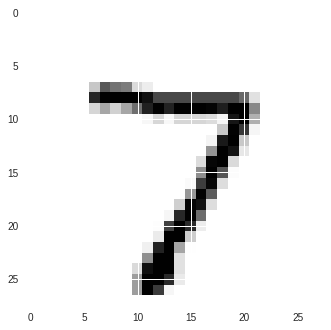

In [49]:
import matplotlib.pyplot as plt
# convert it to 28X28 format to represent it in image
img_set = np.zeros((test.shape[0],28,28))
img_set= test_X.reshape((-1,28,28))
plt.imshow(img_set[0,:,:])

In [50]:
test_y = test_y.reshape(-1,1)
test_y.shape

(10000, 1)

In [51]:
p1.score(test_y,label)

score of the model:
total =  10000
correct =  7006
multiple classification =  0
wrong =  2994
accurcy =  70.06


Vary the learning rate and number of itterations to analize the best score ..

# Training perceptron using iris data

In [0]:
from sklearn import datasets
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target

p2 = perceptron(alpha=0.001,iteration=120)

In [38]:
p2.train(X,y)

training complete, new weight = 
 [[ 0.03975068 -0.11752674  0.22996188 -0.02023275 -0.02492032]
 [ 0.23324344 -0.00467019 -0.08103285  0.02122344 -0.1167844 ]
 [ 0.40202337 -0.20605297 -0.39760706  0.20311932  0.75071223]]


In [40]:
label=p2.predict(X)
p2.score(y.reshape(-1,1),label)

score of the model:
total =  150
correct =  99
multiple classification =  0
wrong =  51
accurcy =  66.0


###**Note** :  As you can see that the predictions are not upto the mark for iris data. But if optimized it will definitly perform. But one limitation of perceptron is that the dataset has to be linearly seperable. as seen in this graph below###

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAk4AAAG+CAYAAABlI4txAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzsnXeYG/Wd/99T1bd51+uOewFjY4wJ%0AuIApRw8dAgZSID25cLmQe0h+d0dIIAXSyKUcCbnjCKHkCHB0iCEx4JiODTbuvdtr72qb6sz8/pgd%0AaSSNtCNpZvTV7uf1PDw2sqT5aiTN961PeX84TdM0EARBEARBEIPC13oBBEEQBEEQ9QIJJ4IgCIIg%0ACJuQcCIIgiAIgrAJCSeCIAiCIAibkHAiCIIgCIKwCQkngiAIgiAIm4il/vHw4R6v1kEQBEEQBMEE%0AbW2Rov9GESeCIAiCIAibkHAiCIIgCIKwCQkngiAIgiAIm5BwIgiCIAiCsAkJJ4IgCIIgCJuQcCII%0AgiAIgrAJCSeCIAiCIAibkHAiCIIgCIKwCQkngiAIgiAIm5BwIgiCIAiCsAkJJ4IgCIIgCJuQcCII%0AgiAIgrAJCSeCIAiCIAibkHAiCIIgCIKwCQkngiAIgiAIm5BwIgiCIAiCsAkJJ4IgCIIgCJuQcCII%0AgiAIgrAJCSeCIAiCIAibkHAiiAq5887v4KKLzsayZVfg2msvx7JlV+Dee38FRVEy91m3bi1uvvnL%0AuOaay3D11Zfg5pu/hA8/XFPwXF/60o341KeuLev4n/jEpXjvvXfw0Udr8c///NWqX4/BunVrsWXL%0AZgDAn//8KH73u9849tzFuPfeX+GSS87Ds88+5fqxymHNmtW48sqPAwD+8z9/iSeffKzk/d98cxUO%0AHDhQ9nFOP/1j2L9/X0VrNPPee+/gE5+4tOrnIQiiOGKtF0AQ9cyVV16DT3/6swCAvr5e/NM/fQXt%0A7e249NIrsXnzRnzzmzfj1lv/DaedthQA8PrrK3DLLV/Db37zX5g8eQoAYNu2LQiFwohEGrF27QeY%0APXtOWWs49tjZ+OlPf+nYa3ruuacwZ84JmDp1Gq644hOOPW8pXn75Jfzbv30XJ510sifHq4QvfnFw%0Acfroow/hU5+6CaNGjfJgRQRB1AISTgThEKFQGOeffxHeeutNXHrplfif//kvXHLJ5RnRBACLF5+O%0AO++8G83NLZnbnn/+WZxxxtmQZRkvvPBsUeG0YcN63HHHbUin01i4cFHm9vfeewc/+tEdePTRJ/H7%0A39+Ljo7D2LJlE/7hH87DVVddi/vvvw8vvfQ8kskklixZin/8x69DEATs3bsH3//+7ejoOIxIpAHf%0A/Oa3sX79WrzwwrN4/fVX0dl5FH19fTh8+BBuvfXfcODAAdx11x3Yv38fRFHEsmWfxPnnX4T9+/fh%0Ai1/8DK6//jN4+ukn0N3djX/8x6/jrLPOweHDh3DHHbfhyJEOJJNJnHXWOfjCF76S87puv/1fcfDg%0AAfzgB9/Fpz51E5YuPRN33/0DbNmyCYIg4LzzLsT113964PydhC984St47rmn8eCD/wtBEDLPc+ed%0A30EkEsHmzZuwe/cuzJgxE7ff/gP4/X5ceeXHceGFF+Oll57Hz372a/A8hx//+IfYtWsnAODmm7+B%0AU0/Vz+n999+Hp556Ao2NjVi8+PSc5x87dhw+/enPYsOG9bjrrjvR39+P1tZWfPvbt+HZZ5/Cu+++%0AhZ07t+PLX/4alixZil//+h688cYqpNMpXHzxZfjkJ28EAKxatRI///ndEEURF154seX7/etf34NE%0AIoGvf/1fAABdXV248sqL8OSTL2DHjm346U/vQjweA8/zuPnmW7BgwcdyHm9eb/7/b9++DT/5yQ/R%0A0dEBWZbw7W/fhpkzj7VcB0EQuVCqjiAcJJ1OQ5IkAMDq1e9lNmMzJ510MpqbmwEAiqJgxYpXsHTp%0AmViyZClWrVqJVCpl+dw/+ckPcNVV1+CRRx7H7Nlzi6Z2Vq1aibvv/gWuvnoZXnzxObzyyl/wu989%0AgEcffRL79u3JpJvuuuv7OPvsc/Hoo0/ik5+8Ed/73r/j0kuvxKxZx+HLX/4arrnm+pznveuuOzFv%0A3nw8/PDjuPvue3DPPT/OrKGrqws8z+GBBx7F1772jUx6709/ehhz587Dgw/+Lx544FHs27cXHR0d%0AOc972213oK1tJP793+/AxRdfhnvv/RUikQgefvhx/PrX9+GJJx7DmjWrM/fXNA0PP/x4jmgyePXV%0Av+GOO36Exx9/Fn19fXjqqScy/3bo0CE8/PDjGDVqFO688zuYNm06Hnnkcfz4x/fge9/7d0SjXdi+%0AfRseffQh3HffA7jvvj9kUpb5fOc738bnPvclPPLI4zjttKX42c/uwuc+96XM6zjrrHPw0EMPYPv2%0A7XjggUfwhz/8CX/728tYufI1KIqCH/7we/jGN27FH//4GDiOz0nvGixdehZWrnwt8/8rV76K+fMX%0AIBwO46677sSyZTfgoYf+jOuu+xR+/OMfWK7TClVV8a1v3YLzzrsAjzzyOG655Vu49dZvIJ1O234O%0AghjOkHAiCIfo7DyKZ599CqeffiYAoKenGy0tI0o+5q23VmHWrGMRCoXh9/sxb958rFz5asH9EokE%0A1q//CGeddQ4A4IwzzoLfH7B8zmOPnY2mpiYAwMqVr+HCCy9GOByGKIq46KJLsWLFX5FIJPD+++/g%0A7LPPBQAsWXI6fvvb+4uuM51O45133sRll10FABg1ajTmzTsJ7777NgBdAF5wgR45mTFjJg4e1Ot8%0Ampub8dZbb2DNmtWQJAm33/59tLa2ljwnq1atzBynoaERp59+Bt5++43Mvy9cuKToYxcvPh2NjU3g%0AeR5LlpyOtWs/yPzbokWLAQCxWGygFmgZAGDcuPGYO/cE/P3vr2PNmvdwwgknoqVlBARBwLnnnl9w%0AjF27dqKrqysjii+//GrcccddBfdbufJVXH75lZBlGYFAAOeddyFWrHgFe/bsRjKZxMknnwIAuOCC%0Aiyxfy7HHzoamadi8eRMA4NVX/4ozz/wHAMB///dDmb/PnTsP+/btLXpO8tm5cwe6uo7iwgsvAQDM%0AmXMCmpqac84VQRDFoVQdQVTBY489gpdeeh4A4Pf78fGPX4IzzzwbANDY2ITDhw9h3LjxRR//3HPP%0A4I03VuK885YC0AVIT083li49K+d+PT3dAIBQKAQA4DgO4XDY8jkbGhoyf+/t7cHDDz+YibwoioKm%0Apmb09HRDVdXMc3Ach2AwWHSd0WgXNE3LOWYkEkFnZycAQBAEBAK6kON5HqqqAgCuvnoZFEXFT3/6%0AQ3R0HMbll1+NG2/8PDiOK3qsrq5ORCLZ1xCJNKCj47Dl6yv12iORhsx50/+/EYBei6ZpGr74xRsz%0A/xaLxXDiiQsQi/XnvcbCY0WjXTn3EUURolh4Ke3p6cUvfvFT3HvvrwAAqVQKs2Ydh+7uaOZ9LHYM%0Ag6VLz8TKla9i3Ljx+OCDNbjttjsAAC+99Dwee+xR9Pf3QVVVaJpW9Dny6e3tQTwex3XXXZm5ra+v%0AD9Fo1PZzEMRwhoQTQVSBuTg8n3nz5mPFilcwb978nNufffYpTJkyFWPGjMP777+L5557JZPeS6fT%0AuPzyC9HZ2ZlJ5wG6SAH0DS4cDkNV1RxRUIzW1jYsXnxaQZF3MpkEx3GIRqNoamqCpmnYu3cPxo4d%0AZ/k8RhSnu7s7I066u6NoaWmxvL+BKIq44YZP44YbPo1du3billu+hjlz5mLBglOKPqa5uQXd3V2Z%0AAutoNDpo5M4gGu3K/L27O2opspqamiEIAu677w8FYvGJJx5Db29v5v+7ujoLHt/Y2ITubl148jyP%0AdDqNw4cPYfToMTn3a21txbXX3oBFi3IjZDt2bEdfX1/JYxgsXXoW7rnnJ5g0aTJOOOFEBIMhHD58%0ACHfddSd++9v7MW3aDOzevQvXXnt5wWPNAhbIiu/W1jaEQiE89NCfix6XIIjiUKqOIFziU5+6CS++%0A+Dyef/6ZzG0rVvwV//mfv0QwGMLLL7+E+fNPyogmQBcaJ598CpYvfzHnuXw+P6ZOnY5XX/0rAGD5%0A8peQTCYtj6tpyEQgFi8+HS+88Bzi8TgA4Mkn/4znn38GsixjwYJT8NxzTwPQ2+hvueVmcBwHURTR%0A29uT85zGuv7v/x4HAOzduwerV78/aBfcXXfdmUmzjR07DiNGjABQPNoE6Kk4I0LW1dWFV1/9q2Wt%0AmBVvvrkKPT09UBQFr722AnPmzCu4jyiKOPXURXjySV04xONxfP/7t+PgwQOYPft4fPjhanR2dkJR%0AFLz44vMFjx8/fgJGjhyJFSteAQA888yTuOuuOzPPbZy7JUtOxzPPPAlFUaBpGu6//z688cbfMW7c%0AeAiCgPfeewcA8OyzTxeNwM2ePQdHjx7Bc889nYlkdnV1wu8PYMKEiUin05lz1d/fn/PYESNaMzVa%0Ae/fuwQcf6DYYo0aNRltbO/761+WZc3zbbd9GLBazdY4JYrhDwokgXGLy5Cn42c9+hRdffA5XXXUJ%0ArrvuSjz77FO4555fY8KEY/D8889gyZKlBY877bQz8MILzxbcfsstt+KPf/wfXHPN5Vi/fh0mTpxU%0AcB+OAzhOg6omoShJLF68CAsXLsKNN16HZcuuwMqVr2Zqa2699V/x97+/hquuugS/+91v8J3v3JE5%0A/m9+8x/4j//4ad7xv4X3338Xy5ZdgW9/+xbceuu/or29dNv9pZdegd/+9tdYtuwKXH/9VTjuuDmD%0Aiq3Pfe5L6OnpxrJlV+CrX/0crrvuUzj22NklH2Mwf/4C/L//901cfvkFiEQiuOgi6461W275Flav%0Afg/Lll2BG2+8DmPGjEV7+yhMmzYDl1xyBW666XrcdNMNmDNnbsFjOY7Dd7/7QzzwwH/hmmsuw1/+%0A8iJuueVbAPQI0Xe+82088siDuPzyq9HePho33HA1li27Ajt37sCcOSdAFEX8y7/8P/zgB9/Ddddd%0ACZ7nEAhYp0k5jsNppy3FO++8hUWLTgMATJ06HaeeugjXXns5vvjFG7Fo0RIcd9zx+OpXP5/z2Isv%0AvgwHDuzDNdfoBfdLl56Zec7bb/8+/vznP2XO8UknnZxJtRIEURpOK5EcP3y4p9g/EQTBEILAAdDA%0AcYCiqEins515mqblRDQ4joce9eHAcXzJeqN6Ir/9niAIolLa2iJF/41qnAiijuE4QBR5RCJ+dHf3%0AF7lPrjDSNHXgT7Og4gb+zmf+PlQEFUEQhJOQcCKIOsWwMeI4DYPVDVmRK4w0aJoGTVPAcRz0OLQh%0AnnRBRWKKIAiCUnUEUXdkBZP+J89zCIeD6O7WO7XyU3XVYhWZkmUJyaQypFJ9BEEQBqVSdVQcThB1%0AAs/rokkvAPfuuPmRKY4DGhqCUNXUQBF6AoqShKqmoapK2b5CBEEQ9QSl6giCcXi+tFjStNx/c19U%0A6anBwlSfkolOUaqPIIihCgkngmAUjsuKpnLgeR6CwENR1MHv7DDWdVPFxNTQ6uojCGJ4QMKJIBij%0AUsHEcRwCAR8kSciIlXRaQSqVRjqdHvizcJhsueRHuOysy/TonDSe8dehapFAEMTQg4QTQTBEfuG3%0AHThOF0kNDSEkEkl0dvYjlUqB4zhIkj5HTZYlhEIBCIJgKaZqXZNEFgkEQdQLJJwIggEGq2Mqhs8n%0Awe+XAQDd3X150RwNyWQKyWRuh50hpiRJgN/vgyiKUFU1I6QMUaWq3oup8iwSKDpFEIT3kHAiiBpS%0AqWCSJBGBgG9g2G8MDQ1B21EjQxyZR5OJopARU6FQAJIkQtNQIKZYqpuSZQnBoA/RaC+JKYIgPIOE%0AE0HUgEoFkyAICAZ9AID+/niRmqXyRUM6rSCdVjAwC3hgjTwkScyINEkKZeqmjHoqp+qmysVI2/G8%0APmrGEI2FqT5z7RSl+giCqB4STgThIZV3yulCRRQFxGIJJJNpdxZoQlVVJBJJJBLJzG26+aWIxsaG%0AgYhPAKLITt0UWSQQBOE2JJwIwiMqK/zm4PfLkGUR8XgKfX3xwR/kIpqmIZFIgeOAaLQ3c3v91U2R%0ARQJBEJVBwokgXKYSwQQAfr8Mn09CMplGd3d/zTvfSmFVNyUIwkCqz7puyviTlbopIDfVRxYJBEFY%0AQcKJIFxAtwLgoShK2YJJlvWaonRaQU9Pf02iNE6gKAoUxbpuShT1yFQkkq2bctpvqhLM4qi0RQKl%0A+ghiuELCiSAchucBSeIRCMjo7Y0N/oABRFFAIKAXfvf2xmoSiXGbbN1U9rZ8vyn266YKU33BoB+x%0AWBIUnSKIoQ8JJ4JwiNxOOc325ikIPAIBH3ieRyyWQCpVfuG34ebtla5wUhiU9pvS031WdVO1JF9M%0ARSJB9PX1U90UQQwDSDgRRJUYYonny31cdkRKPJ5EIpEa/EFF0Qfv6n8ODbJ1U9nwlLluSpZliKKA%0AtraWuqmbIjd0gqh/SDgRRBVUV/gtI5FIIhqtbadcJdSqUN1cNyXLKYRCAUSjvTWtmxos0leeGzrV%0ATREE65BwIogKGEwwFRuEa4xISaWUghEpRGWUrpsSCuqmci0SnKibKj/SRxYJBFG/kHAiiDKw7/ht%0ApM50zCNS3Cj89rrGiXWK1U0ZXlPF6qb0PxWoKsupPh4kpgiidpBwIggbVD4ihR8YkcKVGJFCeEU6%0ArYujwropfVZfMFjMb0pPEdaCUm7oA/egVB9BeAgJJ4IoQaWCyZijFg4HPBuRYqDPb3OXoRThMuqm%0AgOxomXy/qXBYBM+z6TdlTvUFAn6IooDe3hil+gjCJUg4EYQF1XTK6SNSJGiahmi0z50FFpDbVafX%0AyripaoZeF5+ZcuumOE73cqq13xTPG9EmqpsiCLcg4UQQeVTaKefzyfD7jREpfWhsDDm/uCIUK0Yn%0AnKNY3ZQsi2hqashEp+qzboosEgjCLiScCGKASgWTLOuFxopS3yNSiMpIp1Vomobu7mx0sVZ1U3Yj%0AjWSRQBCVQ8KJGPZUWsdkHpHS1xevWfEwwR7F66Z0MZWtm+ILzDtZq5uiVB9B5ELCiRi2VCqYeF7v%0AlBtsRAptKoQZvW5KzXGIt+M3ZRSkszKnDyCLBGJ4Q8KJGHZU0ykXCMiQJNHWiBQvN7rcjcyL4w2d%0Arrpqqea0D+Y3ZUSn7NZNud8UkD2O6VVYWiQIggCO46AooFQfMaQg4UQMGwRB31TK7ZQDsiNSksnk%0AgOO38+sj6henPw+G3xRQ3G9KFMXMfQ0x5ZVwsiJfTPl8IgRBQE9PH6X6iCEFCSdiWCAIQHNzCF1d%0AvWU9TpYlBAL6iJSenr6yCr+HdlRmaNsRsIiduilZlsBxHHw+2TRaRhkQYV6TL4qs6qaQSfORmCLq%0ABRJOxJDG3ClXzgVZkoSBESlaFSNSvBcXPM8hEPAhEgnmzWRLU7efa9ROQObXTUUiISiKXhMlSWJN%0A66b0Hw2Fz5//PdQ0deBPskgg6gMSTsSQxKqOyc4mIQg8AgEfeJ5Df3+irkak+HwSRFFEIqGnE0WR%0AhyiKCIWy7fC53Vtpx2fmEWxgCGYzoigMFKIbdVMCVFUrEFNO+U2VK3TIIoGoF0g4EUOKyjvl9EiN%0AKAqIxZIFxbqV4FWqThdMekRBr7/SoChGeqZwjIg+cNgPSdKLd81RqXK8hWjP0mEpHVtqLXrESUHx%0Auik/RFEEx6Hiz0Q+1Ua0yCKBYBESTsSQwBiPUuqaqQuZ3OJZjkOmNiSRSKKvL+7Bap1BFAUEg75M%0A1CCRKJ16yY4RMYspbqCDS7ScyWZsnvmRN1aEApFPeWnDcv2myqmb4jjOlfRwJRYJhY8jiMoh4UTU%0ANeXNlMu9iPt8Evx+GalUOhOpcRZ3apyyPlLcgI+UglDIn3cve8dV1cJ2+Ky3kAifT0I4HADPC6aN%0As37Sl8MNJ7RBMb8pI9VXXt2Udwp7MIuESCSE3t4YKNVHVAsJJ6JuKXdEipE6E0URgYAPiqKipyfm%0A2gwxp+fHlesjVSlW3kLGeTNSfYLAo7W1OWfjrOWAWyKLG6df0zTbdVPGfXmeB6CB5/mazOkDsmJK%0A/+74BqwRKNVHVAcJJ6LuqHSmHKAhFAoAAPr743VV+K37SGUHCOdvjvkizem6G6Ow3Ng4ZVlEZ2fP%0AQHRKyKT6dKNGBamUklOIPrTFFEu2DN6uxbpuSq+lC4WCkGUZfr8/r25K/2x4OaLI/H0YvG6KLBKI%0A0pBwIuqGakak6J1y+ogUtyI11lR3wdULudkdIGyk72Kx7MYpioKpbiqYE4UYivYI9VIc7hWKokJR%0AkvD5fEgkEojHk+B5PhOd8vtlhMPBiuqmKkUXPsVPDFkkEOVAwolgHqdGpBhFz16hX3Qre6wg8AgG%0A9bole9Exo57KG0qlIY0oRDxeGIUge4Thg1nEqaqKZFItqKUzxJQkue03VZmjenkWCRSdGi6QcCKY%0AxU6nXDGyI1JSmdSWJInMX9RybRESSCZr4fjsPEYUwk17BMK7WXX2KB3lqaRuqlK/KScjcWSRQJBw%0AIpijGsFkjEhJp8sfkeIG5byGQEAesEVIlW2L4HQhuhc4aY9AsEelYqVU3ZSV35QhsEvVTbktKMu1%0ASKBUX31DwolgikoLv82eRqVGpHh5ndIvnoMfMDsPL43u7n6GIgbeU449gqoqA+lYf2YDJdjBSVFg%0AHbE0i2yruqlsyq9WkbhiFgl6atKH7u4+ckOvQ0g4EUxQaR2TeUSK4WlUDLtCxivsij028e5cFrNH%0ACAT8Ayk+IwqRWx/jlT0CS+kxltYCVO8cXopiIjtbN5X9XBhpvWAwUPNOT47jIAgcBEG3a6BUX/1B%0AwomoKdWMSPH7fZAk50akOE2x9FnWwJJHLBZ3yFCSneJwr46fTitQVRXd3b2Z2/UIxHC3R2CDWoi4%0AYnVTwaAfgYAPgsBbdno6PadvMAonGAye6iOLBHYg4UTUBJ9Pz8mVW/ibPyIlGrVfC1Trzd5NA8ta%0AvzZWGO72CCzYEbCIPpZIr3s0EAQ+87mopG6qGuyKSrM4Km2RQKk+LyHhRHiKUfgtSeULp+pHpHid%0AqssebzADS8I9hpc9AjtmnCylDa0EpVE3Vaw5wecrXTdV3XoqPzfU1Vd7SDgRnlBNp5xhAqmq1Y1I%0A8Toqo2mAKPLw+0OeG1jShbI0ZI/gPixFv+wKlXLqprL1dErZKWCnRSWJKW8h4US4jlWnnKZpA7Os%0ASj1OL54GnByR4s3FQhB4yLIexai38S7DlUrtEXieJYHAzlpYi35VuhZ7flO5KWDz58Pqh555vItb%0A2LdIIDf0ciHhRLhGNYXfeiGngHjcORPIapy87WI2sEynVZMnjbtomn5sLxkOF1g79giyLIHnebS0%0ANObUxtTGHoElscKSiHN+LcX8pgarm0qn0+A4QFFq19WXxRBUKtramnH4cCeobmpwSDgRjmNHMOlp%0As9w7cBwHv1+GLIuIx8s3gaw1uoGljEQiib6+OPx+2cPUoNdddQztiB6Tb4/g88kIBHzo64tZpnNy%0A66bctUdgS6ywJOK8qbeyWzclCDwURYUo8o7VTVVDbvSfUn2DQcKJcIzyIky50R8viqfdisrkGlhW%0AUrRODAWs0znD1x6BJRHHcZxnVgP5WEUtGxvDUBQVqqo6VjdVDTzPFdRflk718RAE2fV1sQoJJ6Jq%0ADLE0SMlSDsa1QJb1wm+9Vdjt4mlnozL1bWBJeIH39ghsRXlYgSURByDTdGCOTAHV1U1Vu55yCtuH%0AOySciKqodEQKz3OZobteiQ6nuursGljaKYB3CvJxqh3lbspu2iOwJBBYiqJVUxzuBsWEymB1U4GA%0AHw0N2W5Pcyq4mlpKlqwj6gESTkRFVCqYjBEpRo6/tzfm/OKKUl3EyU0DS2J4M9TsEdjbiNlaTznn%0Axwu/qXLfr+EedSLhRJRFpZ1yuujQR6TE40nEYgqCQb87iyxCNVEZn0+G319+DdbQLQ6nCFcWd6IZ%0Aldgj6HPQeLK/yIOlSBxQvR1BOX5TimKk+IrXTfE8W8KSdUg4EbaoVDABRuG3nDMiRR9wyT6G+WYl%0ABpa1ug75fBIikaDpgulGXQRbA5OHC4PZIwBAU1MEPC/kRB+8tkdgLeLE3nqcT2VW4zfF8/yQGDnk%0AFSSciJJUI5iyI1KUgm6zXBM2byjnmILAZyJilRtYeicujI7BhobQgMO6PpMrWxeR9ZMxp3qooL3+%0AMdsjNDSE0NHRBY5DJjJVC3sENiM87CzIy/XYqZuSZTETsbJXNzW8fzSRcCIsqaRTzsA8IqVY4Ter%0AqR6zgWUsVp35plevked5+P0yBIFHb28sc6FUFCUvzWMUIAsDadNQTs0MianKYEkkZFvGa22PwFox%0ANjvvEVB7IZdfNxUOBwFoSCbTprqpgClyqWDbtu3o6OjAxIkTEQiEa7Z2FiDhRBRQTeF3eVEa75VT%0AqdeUb2DJOhwH+P0+yLKYScWVOufZmpnsbUZ3oyiKlmLK2EhJTA0N7NojqKqWee8rsUdgTaiwJ+TY%0Ai4ApimqRBs5GLjduXI8HH/wDtm3bhpEj2zFt2gxMn67/N3XqDDQ3N9fwFXgLCSciQzXWAuVGabwY%0Af2J1TCuxljWwLEwpsko2DZpGd3c/RJGHLJsN6eydXFXVkEikcjoE8wuQI5GsmMp26nBMRgyHM5WK%0AFXfsEUio1BN6g0Hh+TFHLhctOg2LFp2GVCqF3bv3YMuWLdi0aSNWrVqJrVu34Cc/+QWOPXZ2DVbv%0APSScCASD0oDYKe/CYh6RkkjU34gUtw0s3ajjKrZmJ9OCpQqQDTElyxJ8PgnBYDon1cdia7z7sCIS%0AnFtHtfYIrEWcWFqPFwN+y0V3Vre3KFEUMWXKNEybNhPnn3+RyytjExJOwxij8Nvnk6AoSllDJ3Pb%0A8/vr4tecMR/ProElS+hRPT8EgUcslvB8rlX+fLbGxjCSyRQURc3zksm2xg9vMTX0KMceQVHUgR9W%0AvqrNGZ2ApYiTGx111VL++Rne4WYSTsOQ/E65ciIjTo9I8fKXoP6aOUQigboysAwEfKbBx14ahpZG%0A01AyMlVMTLGwkToJK9GMWqyjWHQyEPAhGPTD55PyiozJHoGltRiUO3KFDDCJYUOxTjk7aR6jEwsA%0AenvjjkQRsjVH7l9E9AiZDI7uLWO0AAAgAElEQVQDolF3hgjnU22qLnd4cL1E9Ur7DOV36+S3xhPV%0AwEbKUNM0KIreqBCN9gLILTKuhT0CS7AonMgAszxIOA0TShd+F/cbyk1rOZsiMgSbm99Xs4Flb28f%0AwuEQE9GBUhgiVdPs114ZaUgvsXu4YmLKMOaTZQmhUH5UgsRUubAS+bKi9vYI7MCicCqnxokg4TTk%0AsdMpZxUZ8WYum3sRp2LWCCxHmI3uREEQKhCp3l70qr3uW7kc16+YYvhDVSPsigMv7BFYEyqsrQeg%0AWXXlQsJpiFKO43d+qi53REqfa2t0wyDSSQPLainn9ZnPeb11JzqFtZjKpnhkWUIwGBhI8eit8Dyv%0AOyB7WS9jDQsbIRupOqC66JfT9gisReJY7apjTcyxDAmnIUZlI1L0iFOpESnu4ZxyYs/AcvCRK0ax%0AfT15SHlJsRSPkdqRJBGNjeGceplcvyn3YWVjZmUdOs6KuGrsEQCNqe8Vi111RHmQcBoiGEXflURw%0AOI6HLAtQlOIjUtzAKRPMejSwFATdjwmAI+fc+xE2tR3ym0qlM6m9zs5uAMhEJKyKj70WU8MdL0Sc%0AfXsEHhwHRCIhJro6WYvulF8YPrzTdAAJp7qnmplygsAP1NTwSKcVz6M01W72lRhYelGQnn8sMxzH%0AIRhkI5U41DAEUszk2GCnk2uoiCm2NuTapA2t7BH0qGQEiqIyYY/A1vtEheGVQMKpjnFmRIr+a00U%0AK1BeVVNZ1KI6A0vvLBDycbeOydsIEKtDmvPJFh9nbzMK0I2OS71GSikoPmZob6s72Eob6tGp/v7s%0Ah6CW9ggsCieW1lMPkHCqQyoVTOahsOYRKbIsohbh13I3Xyc6/byNOOm1Y2bTUK9SicO966UURvFx%0AfieXeaRMti0+t5vP6r2jc10IS5ux1VpqaY/A0rkBqKOuEkg41RGVFX7rGIXfViNSahc9sB8lyR3x%0A4o2BZbUIgh7F8/lkx0xDi1EvESBWKSWmRLG0mALYKPZlbUNmhXK62LyyR1BVb+pI7UDml+VDwqkO%0AqEYwybJ+0VcUBT09McsvrBvDaO1gZ7M3G1g6MeLF6CB0M1VnjJyQJD002NPT79qxCPcwxBRQWkwB%0AulO2pmFIGjZWAmvioJrve6X2CKlU2vIcsGZHQDVO5UPCiWGq6ZQzj0gxG0CWOpbXlBJsxQwsqz+m%0AI09TFL2OSUIikUI0Gkdzc8TdA9aM2nbV1QorMdXQEALH8RAEPicikb+Jui2mWKsrYgU3InF27BEa%0AGqztEVizI6ABv+VDwolBqumU4/lsp5xd9+nszLja442BpfOvtVhkzLsLJDvv4XBDVTVoWjpnALMg%0AZGumwmHr9I7zYoolA0x20j9eCUq79giCwGduI3uE+oSEE0PwPAeO0z/A5Rd+5xZO9/XZL5yuxZwz%0A/bgaeJM69MLA0invKAPD0oHjOEcjY+XidY0T1VSVRlEUKEp+eqdQTJnd0r2KTHkBS9GvWgoDK3uE%0A5uaGAXHFkT1CnULCiREEAWhsDKC3N152bYDR5p5MpioqnHZaTJRLPRpYmoVqLJbMuTCa8bKLL3d9%0A3h5vOMNxgJ2vrLWYyqZ3srUyWl4Bur3CY5bECkW/imNO32Vvq509As9zUBR7z1mreljWIOFUY8yF%0A3+X+ijcLjp6evioK/GqT5uF5HrIseupY7sQX39zhN/gsv9r5RhFewQGo7LNr1MrE49n0jnXhsZZX%0AK2Mlptj5nLEk4ljb6Nm0R2CpkJ99SDjVCKtOObubuiTphd/lOGaXwuu0i2FgKQh8RjTVA9k6JtWh%0ADj/34DiOuV/ahD2sCo/NdTHBoFlMZY079bby2q07F3ZEHMBiMba9+3plj8DS+akHSDh5TKlOucGE%0Ak1FPw/PcQOF37QoKK6HQwFIbMN/0jkpEYtapvPw6Ji9TdcZnx+jsAzgL3yFyxK5HDDFlLjzOFVN+%0ASJIIjuPA8/ygLfFuw1rEiSVrhGq76py3R+Btr0e/xrAVwasFJJw8wk6nXLFNnee5gUnwQsl6Gpax%0AMrAURaEGYXT7aUknnMq9RNM0NDSEoCgKotFeJBJJS98hRVEKursqORZrKZDhRr6YCgT8kGX9s5qt%0Ak9Ev8fnvt9tCgqUoBou+SSzZI5RrgEnfexJOnmB/RErupp4dkSIhkUgiGnVvCK+xETr9hXbewLI6%0A7Eaccp3Wq3Eqd7/GyYiIAVnPK+M8lzJxzJ/Vll9DUw090Sii27YCiorA+HEY0T6qqudjGVaiK3qR%0AumbREp+/gYrgOBREIr2oMawF9e+bVBnl2CNEIiEkkykm7BHqARJOLlKu47d5Uzc27lQq7UmnmdMp%0AJTsGlixGLURRQDDoh6qqRZ3Wy8HN+jHz7MF4PJnpwhn416KPKz5eRLLs6NH/S9m+mB7avg38e+9j%0AjE8GAPTu3IndkyZh/IknVvxaicqx3kBzxZQk5UYjqhVTrEWcWKq3qiVW9gitrc3o64uB5/mi9gi7%0Adu1CQ0MjfD5fDVfPDiScXKDSESmapkEUBfh88kABcvUbdxlHd+QC442BZeUUE2vV1DHVAqOj0hwR%0AM5ziKyErprK3GSk+Q0wJggBFMQqRecvPpqqqSH74QUY0AUDYJyO1Yzt6pkxBpLGx4jWyCxsbczli%0ApVg0wnjP9ZFBIYvUTj1GpthJ1bEkKA04jkMymcr5PpvtEURRwPe//z189NFHmDBhAqZMmY7p02di%0A+vSZmDZtGoLBUA1XXxtIODlINTPlRFGALEvgOKCvz/uN24nvsuEnZdfAkoWIU37Uxp06JudeoyAI%0ACAZ90LTCjkqno4bGhpkvpvQohQhJkjBypN/kMZPGwf0H0JRKAz4h57maZRn79uwZosJpaKCn+VI5%0A34H81E4kkhVT5rqpfDHFkkBgKVXH0nkxsGOP8LOf/QcSiQR27dqBjRu3YPPmjXjppeexfftWzJs3%0AH3fffU8tll4zSDg5QPUjUmQIgoBUKg2OQ02iHdWImEoNLGvhPq1p2fcpt46p35ULmlPmoubBwf39%0AxUbpuF9Plb2YchAEDr29/ZmNVZYltI8eia5wCGFZ1ovQFRWKoiCRTELw+11bVy1hLNvsKFapHY7j%0AMgLaLKbMqV1W6r4AtsQKS+fFwK6w9Pl8mDZtBmbOnJO5LZ1Oo6+v183lMQkJpyqxX/idS+GIlPjA%0A5lObt6QSEaPXA1XrJ+V9Vx3PC2hoCEJVNY/ToZVhdCQag4PZgbM07jvg98Pf3w9RMDZXGV3hAGbN%0APwGKomZqpuov5VMcFjZDrwSCpg0mpmTwPI/W1qa8Ork0FMX7H4VsCSd21gJUP+BXFEU0NjY5u6g6%0AgIRThVQqmICsz05hx1YtB7XaP3a2Hsj+IGHLI3o86oXnOciyBEHg0dcXr7pzzC6VvkajUJ2VjsRc%0Aiq9lzMLF2PHmGxAPHoSgaUi2NKNl/gL098czG2s4HATPD57yIeqDfDE1cmQLOjq6Mh2cPl/2Pc/v%0A4HQ7ws5SRLD+hRMBkHAqm2rqmIyUVjptvRHWcnCqnUG/9eZrZGCuY0qnlUzUwwv0i1J5byrPcwgG%0A/WUXqtdqLl4+kiThmMVLoCjKQMODfpmxm/IZLm3yTmN3Zp436GM8kknV8j0XRbOY4nPq5IyZbM6u%0AhQ1xwJpQYW099QIJJ5tUW/htJ6VVy2LpwaI/VgaW9UC2/kqvYzLmPrFKIOB2obp3CIJQ8t+tUj7m%0AYmSrzq5aumEXh42uumpm5jlNMQFfKs0ninqdXCiUbYd3QkyxJA5YWgsAMr+sEHZ3EEaoRjDljkhJ%0ADhrlqG2XmfWxvTCwdCNKIor6PL/87jOvr1l2o4iyrJ9nvcC+0kL1+h8obFWMbLTJS5KUMXAEAEVR%0ABrxn5JqKKdpLqqOYmDLSfPliKncm2+BiioUorAFrwkkfR8POeuoFEk4lqLRTztwBVc6IlFqn6szY%0AMbB05rjObvaGj5QgCEXqr2pZR1aI+Tw7MbDZK7z8rFq3yes/SgIBf2ZOmz70trJBp9XCwl7IkkCo%0AFvN7aWD2FpJlCcFgYMCoNZ33vudeq1gSK8Nh/MtwgISTwwQCMmRZrmhESq1TdTzPe25g6WRdjh0f%0AKe/FqbVQM9eLOXWeaym8vUZV9To1WVbQ2dkNINcNOzvoVCtI8w3djYKNaKNbm7FVB2dxMaUU3JcF%0AWPKUAqrvqhuukHByCK9HpDiNMXRXlkO2DSwdOjKqveDnprnYOvdWYsbsHxWN9tVmYVXDVuQOsHbD%0Atp4aPzTF1FCKONnFSkwBWaNWo56xvX2E4/MYK4G1CA9r66kXSDiVwM7nyagBcmq2WS3QC6j1eiCv%0AhUc1URLDRRuwn+aqZVTP3CTg9meF59kSNbXCamq8IaYkSUI4HIQoClBVrWBTtf898O5cD/b5VVUV%0Ab775Bg4c2A+/348lS07zfCQGC5tx1oiTg98v49ChowUjhMyRKXO6z01YODdmyi0OJ3RIOFWIWzVA%0AxoXRiw+zeSOPxxMQRaFGX6LyNh6O4xAM6unE4i7a7MBxHEIhf4m6K/eOSxfFQgwxFY+bxZRgskYI%0AQhRFqGqueWM6rVieT13HuHue3377TXz00TqkUkkIgoRJkyZj6dIzCl7Xfff9Fo2NDQiHI0in03jw%0AwQdw3nkXYMKEY1xdnxmWIl/m74DVCCFDSBnDjg0xlVuAnnbs9ejF2Oz8uC6nOJyFEVmsQMKpTNyu%0AAfLCi8fKwNLoYPGack0wy52HV3g8b+uABIGHKAoZd3g38fLCNtTqqRRFgaIoiMcTmduM74Qo6j5T%0AVmLKEMFufl/Xrv0Q27Ztwfjx4zK3HT3agb//fSUWLlyUue2VV5ajtbU1M8FeFEVMmTIFr7/+KpYt%0Au8G9BRbARq0VMPi11OjSyxVTgklM6e+7U2KKtR8zrAm5eoGEk02MkK/usZNybRPMbn5utP2zZ2BZ%0Abrt+Ol1tHZM3tTnGRVfTNCQSudENoj7QN0sFQKGYMm+qmqYhFNKLkt1I93z00Tq0tbXl3NbU1Ijt%0A27fmCKeDBw8iFAoXfDd6e72dJcZqxMkuxvsei1m/78VEdLGIZOF6KnoprsCakKsXSDgNgqbpnXLZ%0AESnuDIPNHs+dqMFgBpa1C8OWFjK57frxqmdduR0pMaJ5HKe7fotiaRNIor6w2lRbWhqRTqchirnp%0AnnxrhEpRFOvH5j+nIIiw+sGl3+4l7EScnFpLKTFlHZFULGvlWOuqK6fGieM4cFwF/jxDEBJOg9DY%0AGGJ0Vpg97BpY2hm54gbFhEyuF5b7tgjVYh7rYo7mCQIPvhIzMOZhr6uuVuhRxVwDR3PtTG4hcqos%0A80YACAZDlj9sAoHcou+TTjoJy5cvR3t7e+a2ZDKJtrY29Pb24IUXnkdvby8EgcfUqdNx6qkLq3jV%0AxWEr4uTeWopFJI33Plsrp2bec/1awMjJARlgVgoJp0Ho6XE3wpSPU5GfcovXvR64azoy8jdgcx1T%0AuV5Ygx7NhciaMdal1uNohlrdUb1g9Xmyqp0xhJThNyQI9saKnHHGWXjkkYcwceKEzEa8c+dOnH/+%0Ax3PuN2PGDOzevRerV78PSdLThk1NTbjwwotx332/xZQpkxCJ6GJr587t6OnpwTnnnOvsyQBb6R+v%0A12KIqfxaOUNMiaKApqaGzLxMc91ULc4ZS+9VPUHCaRBU1VtBUe3GXnnxem0iCObNPjc61sf8LyHD%0ADiF/rEs+3n1+vHsPSaTlYmfzGcy8MX9Gm7GxNjQ04IYbPoUVK/6Krq5uSJKEK6+8Bo2NjTnPz3Ec%0ATjnlFMybdyKOHj2KSCQCn8+Hl19ejvHjx+ZEPpubm7B9+1YoijLoTMF6hgVhYBZTsiwhGu2BpmWF%0AtNkSI98F3e21l3t+qKtOh4QTY1SzIVXTcVarjdBwLA+HA5m6ILfGuxhU++U3pxEHs0Pw6pqtqir6%0A+vrA85V9pTVNw+E9e5Ds70PL+AkIBoMOr5DIx9oJ25jRJsHnkxEOB8HzHNJpBVdddVXm/qVq/Xie%0AR2tra+b/u7o6EQ4Xvp+iKCAajaKlpcXR18WCWDFgKW0IZM+NbomRG5nKWmIIRc1anR4jxNJ7VU+Q%0AcBoErwVFJREnI1XEonN2KYyp6ILAo78/YXumX7VUc36MIvtEImUzjeh+FGj3B2uQ+OADNKWT6BEl%0AaNNnYNaSxQOficF/vfb19uDwihUYmUjAL0ro+HAtjs6YhnHHz3V13UQh1jPauEx0Il9MmWumiomE%0AcDiCZDIGWZZzbk+lUmhoaHD7JdUYlgrVSwuVrCVG9jY7zvfViCkywKwMEk6MoWn2BwubDSzraUAs%0AkBUgiqIWFNayiCQJCAT8ZTcKuC28923ZgtC772KUKEEOBNGqaUhs2YS9LU0YOX0GRNFIBRhFqqmc%0AC66mAR1vvYUJigqIEgCgVZbRvXEzOkeNQXNeGzzhPZqmIZnM/Y6YxZTf70MkEgLP82hoCCGZTGXe%0AX0VRccYZZ+K3v/0Npk6dkvlR1tPTg3HjjoEoOr8FsBTFYGktQPkRsFLO98XElJ7uU2z5M5VXHE5p%0AOgMSTsyhASitnKwMLB05sgeu5fldfpIket51Vs7r5HkOwaAfPO9NGrFc+jduRJsogeP0zwXHAWpS%0AQ9eHa9EwYRI0rbQHUSKRxNG+XsiyPPCLV7/YNsgy9u7cMYhwogspUJt0kJWYGjGiCbFYHDzPD6SS%0AQ+A4DqlUGp/73Ofx9NNPIxqNgud5HHPMRJx55lmurI2l9BhLawGcEXLFxFR2nIwhplBQgE5ml85A%0AwokxSqXqck04nTewdNO1XBD0i3m+AGG5yDgQKLQXYA0unRoQRMLAr05d/HAW67XyojGcgwWBhyxL%0AEAQeiqIgrajw++VMG30hDO1GNYeNdBDHAclkbv0Tz+uRqREjRuCzn/1sZjpAfhGysxsqG+cDYC/i%0A5BaGmDIPuOZ5HrmWGLnvvR5xHvrnxg1IOA2C978krYXEYAaWDh3dcdfywd3KvTfeHEwgGi7les1Y%0AdXYUbhqLiqKA4DHjwW/chHgiCclktqmObIOdDUzTNPQ1NSMW7Qagnxde4NGdTqN15kw0NTWY6mnS%0AmVQfy4J3+FL4fquq7jFl/t7lb6jm6EQqlcpsrJXWzbAU5WFJOHm9FlVVkUgUF1OBgB8cx6GtrcVl%0AIT30IOHEGPkbrV0DS2eO7ezz+XwS/P7S/ka1uaYZBdu5B891KWe3ZswYciwIAkafMA/rNm/DhGQM%0AoiAgpSjYKgg45pRTbT9f+8dOwc5XV6A5GoVfEHEkpYE/7jhERB86Ojot62mMz2g4HKSLLSPYFSyD%0AbajZVE9uEbL99nh2Ik4swYKIM7/3oiigsTGCzs7uHDHV0CCC43QhfeDAQbz77ruYPHkKRo0aU9O1%0AswQJJ8YwhFO5BpZOHrta9KJ1P1RVRU9PrOSGWotRL/nREnNUjGWX8qOHDuLAKy9DPngAKVGCMmkK%0AZp17LmZecQX2bdyIaG83+IYGTJ86HYIgIJVK2dpI/X4/Jp1zLrqOHEG0vw/to8fkFA1b1dPo3V0B%0AADBFLSrdaIlaYyWmzHUzxTq6rN5j1iJOrAh6FoSTGWM91kJa/7HU1dWFF154DuvXr0c8Hse0aTMx%0AY8ZMzJgxCzNmzMTYseOGpbcTCSfm4MDzHMLhgOebeLXpl2zROpuF1FaYo2LRaJ/jz++UMFRVBYf/%0A/BhmKQrSGqAlU0ivX4ePUikcf8klGDdrFgIB38BFsLJ6rKYRI4ARI2zdV7/gaujt7c/cZrXRqqp5%0Ao03ZGoRab7Czbzgb6bGqmzE6uvKNG81FyCwJBPbWUutVZCl1bowUb3v7aHz3u98HABw92onNm7dg%0A06YNWL78BfzqVz/HF7/4VZxzzvleLpsJSDgNgpcfdMPAEgCiUW8nmutU5jlUbE6brSPWJOKkQRQF%0AhEJ+qKo2aFSslhhO8BtWrsQx8RhSpo5LkRcgbdyAZPL8Ao+eWmC90ZqnyocgiqJefJ5XU1HvsLAh%0AehHpMd7jeNz6PQ6Hg5nIlCgKSKWUmgpmtqJfbA34LVdUjhjRira2UVi4cLGLq6oPSDgxgNnAsqen%0ALzNPymsqGfSbW8fk7Vw/O2iaho0rX0dq8yZABcRpU3DyhefD75cHdf2uNTlO8IeOoN3CpiKQSiEe%0A180NvRShdo+VNfWzskWQEAhUNwCXDYZ3TU/+exyJ6EOJ02klRzCrqpIjlg0fMTdhL+LExloAMr+s%0ABhJONaSYgWWtQv/lDPo1r72aiI3bm/3qJx7HlM2b4RcEPa3w3rt48+hRzL3qak9EUyXpT6NGzDyz%0ALzTxGHS//x4a8iJL3U1NmBDR3Z/7+/vRffQogg1NTESgimFli2AegGs1sy2VSjFbrM8KLG3Mqqoi%0AHk8UEcx6k4EkiQOfBTejj+yIWpbeH6Bc80vCDAmnGuCWgWX1DC5i9NSRH4LgzNrdbGuPdh5F44YN%0ACPr9ECUBmqpBS6to2bQJh/fvR1OrF67Y9tOfsVg/Dq1ZDaG/D8lwA8bPOxGSpLt5j5s2He8fcwym%0A7NqFwMBt+1NJNJylmxhu/usriOzbiwZo2J9WocyYifHz5+c8f39/H1KpdMFwWBYoNWbE75cRiQQz%0AZo7mESMEexQTCFaCOdeU1Rx9zI1MVb4WllJ17Aknu+upRUkFy5Bw8hC7BpZuGlGWotTx8uuY+vqc%0ANIR05wvZsXs3jgn4IAoC0iZfmnafD1t3bvdIONmjv7sTh/78Z0xQVL2ORFXx0doPMfO6G+Dz+cBx%0AHOZ94hpsW70aiR3bAElG2/z5aBs9BtvfeRtj9+5FcKA+bgyvoH/TRuwNhzF62jT09/Vhz/LliBw6%0ACEnTsKWhAY2LFqNt/Pgav+riWHXy8TyXKT4PBPyQZREcx6GpqcER/6FKYWU/YWVjK+faZS2mxDzj%0ARqHAR8xuKpclscLSWgD21lMJ7777NubPX+D5cUk42cCJqEg5BpZejD4pdlyr8SfZGizn65jKSQ/a%0AxRB5k46dgT3PPYdRYu56DyXjaJ1wjLMHLcJgnx1jBt6255/B+GQaxnYg8DxmJVPY/uYqzDhtKQD9%0AQjdl3jxg3ryc51B37YIkCPqwnoFjBSUJB3dsB6ZNw57lyzG1Owr4dXuLllQKO15ejsZl1zGd0stH%0AVc1iKpZJ68VicYf8hyqHhf2HnU2wuvRYOq1HmWKx7G2GkJIkCcFgAIIgZO5Xqi6OJXHAYlddeSUW%0AbAhzMw888N8YM2Ys2tpGguO4gbFT7q+ThJPLVGZgaW3Q6Db5m7woCggEfNC0+hkibIi8ZDINQfKj%0AY/JkjNi+HZKgu2qnVRWHJk7CSePG1XSMinkGXl9fDL3bd0Id+OIbcBwH7uChQZ+LU80bBpdze39/%0AHyKHDmZEk8EEjsOedeswMU+E2YWlDcDKf0iSJFPLfGFhMjvp8aGHG9HywlRuNjJlVReXtUZg57PK%0AWlcdz3NIpeyth+M4ZiKaBpqmobm5Gb/61c8xe/YchMNh+Hx+BAIBLF58uqvHJuHkEtUYWNZunIUu%0A2IwWeEEQGKvBKo4g6MXq+SLvhCuvwoa//Q3Kls2ABvCTJ2H+hRd4ti6r2gC9W05CPJ7CR6+/jsR7%0A7yLx9lvYpAHSmNGYcszE7OODwcGPMWo0tF27cm5LKwq40WOQTKYgWVyseZ6HmkwU3G4f5yOFTqG3%0AzBcvTDYGHOfW0qSq6OSrfQEySwLBi/ORHRGTWxdnvM+6mApCEHg0NYWRTGYFs3mWn5ewFP0C2FtP%0AuaTTabS1jYTP58O+fXsRi8XQ29sDgCPhVG/oLtQ+SJJQsYFlrQrxNA0QRR6RSBCJRAp9fXHPjl3p%0Ahd98vq3sBXiex7FnngmceWbmNkHgPdtkVFVFNBpFKqUiGAxkoo/d3f3YtW4dGlauRKMkITpuPHy7%0AdiG+dy92SBImjhmLg6kUWk44YdBjTPjYKdhyuAMT+nsR9vkQTSRwZFQ7Js09AZqmYUskgpa8AtvD%0AiSRGTJte5atjVDlZULqTT6+lMdI/5qhUrTbZ8qm9eDPwWsQdPXoUH364BpoGzJw5C6NGjcr8W1tb%0AC3p7+yEI4oDbfdBy9qIX0XSWXMyB+hdOkiThK1+5Gbt27QSgIRQKo7m5xbLcxGlIONnAbgTI7LsT%0AjVYuOmohnIzBtgA892PSj1X+hd+I3CQSqbLOt1cvbcvbb6H3tdcwMt6HXp8fmHM8Zp13YeYi3bv2%0AQ7QPdMg1jhqFLlVF+uAB7Nm3F+lp09GwYAHaxo4b9DiSJGHWZZeh88A+7DtyBFJLK2aMHo10Wt/4%0AGxctxo6Xl2MCz4PneRxKJBCbMxftLS2uvn7WKZ7+kSw22ZRJTOVufmxFe2qPlxvyBx+sxtatWzFm%0AzGhwHIe3334TbW1tOOWUhQNrAZLJNDQtm5YvNnvR3MXnhpjSP0vsfFDKfZ9YS9XFYjE88cRjWLHi%0AFXR0HIaiKDj++Ln4ylf+KUc8uwEJJwcwG1jqhd/VfTm8TNUZKS4AiMWSkGWxBkXp5W0+RkG1F4OP%0AK2Xv1q3wvfgiJvl9EIMhpNMK+t9+Dx9AwHH/cA4AgEvkpsqaxozB4WAQ2qFDEPr60PPWW9jR34+J%0A8060dcz2CcdAnDwJ/f25z9s2YQIar7seu9ethZbUI02jhrlosqJY+qfUJstKGttp8RaPx/Haa6+i%0At7cHgiBg5syZmD59pnMHcIBUKoUtWzZj3Ljsj4v29pHYt28/uru70dDQYCkOrDo27bzP1Q+yZivC%0AU68GmEZgYc+eXXjzzVX4xS9+A59PL4t54onHcO+9v8Rtt90BVVVdiz6RcKoCt4qnvYg4cRyHYNAH%0AUcymuASBB8dJrh7XGnsRJ3NBdTWz8Ip1DzpJ9IP3cVwoCFXTPxOKosInCFDWfQQMCCetvR1aNJp5%0Ar6P9/ejbuAEzRo7ESI4DYjH0rFqFHYBN8VTcM0qWZUyyKcCILNa2CHxOuzzHcWhtbarxgGPnUnXp%0AdBqPPvoIJk4cj9ZWfWK/i/YAACAASURBVHbhunVr0dPTY6v126uI0+bNm9Fi8QNg9OhRWLduLU49%0AdaHt5ypmfyFJIkRRt79oaBDBcahYTLGWGqt3A8yenh40NzdnRBMATJ06DWvXfuD6sUk4VYD7BpaV%0AzYyzS84oD1MdU62K0u0cNxCobBae1xifDVlTkUrrnkI+n0mkmQqyJy45DR/t2oVpfX2QRRH79+xG%0AkyyjaeKkzH0iooiDH34AMCZ6atfAUHvyp8mPHNmCzs7uTGFy/vDbrPeQeyNGnIw4vfHGKowdOxo8%0AL2Rua21txYYNG3DiiScxk7IJh0PYtSuBYF4DRTKZRCTSWPXn0xh0q19vdG+EfNEsivoWmk3xpYp6%0AiekRnurW5CTlCTk23nMzDQ2N4HkeL774HCZOnAye5/HWW2+guVkX026KVBJOZWDXwLJa3NqUjDqm%0AdNo6pVhbd9hikRJ9zXoa1JnaK7fObyAgQ5YlxONJpNpGI75hM2RByAkEaGPHmu4fwPGf/gx2rnkf%0A6Y4j6EokMD0YhJAXDRP6+51fLOEg3MDgYqXo8Fu/35cZcOyUK7ZbdHdHEYmELf5FQywWKxAq+XgV%0AWZkw4Ri8/fZbaGlpzrn9wIGDWLhwCdxIjeWLZiBfTFl7iaXThjUCO8qJtQiYXYw9aurUaTjzzLNx%0A//2/R29vL5LJBM4442x89rNfBKB//9yChJMNNC1/mG1pA8vqj+dsKslsjVA6pehupKsYViaY9tdc%0A0RHh5OvUL5i54m76woV4d/MmTN23Fz5ZQlpVsUGWMPm883MeK4oipgykP7hQGNzaDwueX20ZYWsd%0A3kaBavNZYZFi0Z7iA46lTMRCEAQoSjpvk60kBe1cqk6WZSiKYrHxaPDn+YFZrsTDYvkzzjgLr722%0AApqmZoTAwoWLIQiCZ8LASkwJAp/xmQqFdDHFcRzC4SCSyVSN0rlZGAkaVoRRu7Rhw3qMGzcB9933%0AQObfDh06iP3792Ly5KmuroGEkw38fgmiKHhWiKxvgNV/ssu1RmAhVaevWYYkiRXbORTDqEVw6nUa%0AaTmO49DXl1tzJQgCFnzmRuxYtxbRwweQkAM4/uSPZWbPWTHx5JOxccsmzEgkM+//HiWNllNOqX6x%0ABBNkbRGytxUOOOYLPKYURYWmaVBV1fKXtJNiZeHCRXjssT9h0qRsyri/vx/t7aNt/qDzzhqhpaUF%0Al1xyGXp6eqAoCpqamrKrqGG3o+4llium2tqakUgkIQh8RkwZ6VyzDYYXYqrc+iZW0rMAEI1GsX79%0AOjz0kC6YLrvsKihKGmPGjMWf/vQwjjlmIiZPnlpE/DsDCScbxOMppFLe1dU4MYak0lb92qBHL8xR%0AvWi0z7Fn7+nuxqY/PwZhx3b9aFOn4YTrrgXHV14Ib6fmiuM4TJp9PBoaTkFv7+CiW5ZlzFh2PXa8%0A9RZwpANaIID2E+ejqbW17PXxPIdQyF9lFGNo0Xn0CNa8/Cg4NYkpp16McRMm13pJAAYfcBwOB/DM%0AM89gx46dUJQ0ZFnGscfOwXHHHefKeoLBEM4553z8/e+vIx6PgecFjBkzBkuW2DMVrIVgiUQiFutg%0AKxXFcRzi8UTOdcCczi2sjcsKKqdfB2vnphwEgUc8Hs+Mi/rLX55HV1cXkskE2ttHYeHCxQDgagMQ%0Ap5U4e4cP97h24HqC4wAX06UFiKIAv19Gb29s8DvnYR7xEoslyo6QNTWF0dXVW/ZxqyEUCkAUeSiK%0Aiv7+hKMmcZqm4c17foZ50e7sryYOWDuyDSd+4ctlP585LReLJWxdfBoaQraEU7VIkpBJs/h8MuLx%0ABDhO93ky/IjMaYJqzrMg8GhpacThw50OvoLyMCI0nZ3dg973w5UvQFlxO84eeQgcB7x9JIK907+E%0ARZd+wfL+qVQKH7x0P/wdq8FrCmKNMzH97BsRjjQU3Le9fQQOHjxS9espxl//+jKSyThCoVBm9MXB%0Agwdx9tn/gPHjJyCVSkHTNPj9Phw9GnVtHXYZOXIEDh8+UvNCaEkS0dAQwpEjtT8ngP45OXRo8PNi%0AFlNGV1/+yKBqGw1EUUBjYwRHjnTZuj/H8eCr+KHpBgcOHEBHx2HMnn28K8/f1lYoxg0o4mSDWl8A%0A7CAIPAIBPW1Ubau+V79GjNEukiQgkUjluDo7xa5NGzH5yFFwphQZx3EYf2A/9mzfjnGmdETptWbT%0AcuXXXHkze1AvUhUAaOjp6UMymco4X5ujGIGADw0NevGvueurnF+29fCdMEin0+h+7ee4bNRhGHVZ%0AJ7f2YuWGe9Fx6BK0jiw0y3v/yZ/jTP87ENv0X62a9gb+8vg+LPjkjwrSFm6nMfbt24fx48cNCG/9%0AxI8Y0YoVK17FFVdcmYlMiaKI1tbmAvdzryMLLBmCsrIOAzvrKV4bp4sov98HSRIH0r6VzV8s/xrP%0ATqrOqHHavXsHli9/CYCG2bPn4Je//DkEQcBnPvM5W7V41UDCiUHK6W7LrQlK5viQVHZsby585lSi%0AqqZcG0XQ29GBUWLex1wDmiQZWw4fAmwIp2qtENyuHTN7cimKajkqZzA/otyai1RFF2NW2bhuNRb4%0ANyP/4r+wLYr/ff0pLL388wD0c7Rlw4c4euQwjom9BzGUO3D55PAObPzwLcyY8zEvlw9Vtf4RpChK%0Apig5kRARiYQQjfbmpX6G74BjltJR1X7/jdo4wP78RUNUWVGv5pdAtjPxf//3EVxzzfWYPXsONE3D%0AV7/6T7j11n/Gxo3rMXfuPFe7xEk4MYjdN9znk+H3Sw7XBBnHdudLZaS6dEuE/oEUg+zaB3zCnLnY%0A9uILmCLmhpl3aBqOGSTEm7VCSHs+hsYuRl2Y4Tfj98u2H2vdDSRAlq0uxinUa71UONKIaErCOORu%0AIvE0IAX01Nu+nZuw6/m7Mc+/DVxHDEHhKPp9kxCMZIuNmwICYkf3Fzy/258Lvz9QcFs6nc6p6zFE%0AQqlohf6e+iGKQsGstnp7T+3AlnByfi1W8xeNTr6sz5RQ0GiQTit1bX5p7BWy7ENvb29mtJTP5wPH%0A8QgGQzn3cwMSTgwyWITCXMfkdKefW9cZcyoxvwPNTSKRCNKLFuPw66+jbSBddzCVhHj+uUX9aMxr%0Adc4KwdkvsTEqR9O0zGdAFPML8co/pl4bV2wYbm7XF8fx8Ptlz4akVsoxk6fhL/wCHIdVObc/f2Qy%0AFnz6Mmiahl3P/wQXtO0EIKDJF8SGrYfQfHQ71NDcTJHp9k4NI4+f6/n6Fyw4Ga+//irGjRsHnueR%0ATCaxb99+XHPNMluPLz3g2HhPnRlwzJZYYSdV59V5Saf1SJNV16ZZTBldmsYPw1LX49r6+xVifB9P%0AO+0MvPba37Bz53Y0NDRi8+aN8Pl8aG1tc30NJJwYpNgH1djQqx05UsmxK4XjAL9fT3UVSyVqmh46%0Adovjzz0Pe6ZMxfo1qwFwGHnSfBx7/HHo7s6N0tlZayU40SVpYLaYMEbl5B7H+fNo1fUlyxIaG8MD%0Ac72qq5fygnnX/wgPPfyvmBJ7CwE+iQ38XIy/5Fb4fD5s27QOJ/i2ANCFZ0DmofqaEE8chdbZgYYR%0AI9EdU7A5fDpOHm+vJs5JJk6chMbGJrzxxiooShoNDY249trrcqwtyhUJVu+p4TFlHnCcX5DMskDO%0Ax83IebnUMsJjNcw6HA5BFAVL4Zz9k+0o5DnnnIf29lH4299exp49uzF9+kx8/OOXZrrt3ISEk01q%0AOWLCXMfk9sgRJ1+nMfx4cNNQ980Ux02dinFTdVM0vTMp99/rIS1nPp9O2jWUi1EvBQBdXXrnbfF6%0AqVwxVSta28fg7H/6L3R0HEYikcTpY8ZkRKaSTkPkc9/v+ZNbsGGfjLc7pmB8w0yIE07EgpPsteO7%0AQXNzM84//4IS96hOJJidrjPPmNdQIEn5g28Lx4uwFHFiaaguS+dF07Lvd2+vPpUgK5yzUci77roL%0Aa9aswaxZszB58nTMmjUb48dPcNWRuxyi0S709ERxwgkn4vTTz0BfX69nkTESTozjpWO5TvUiptzh%0Ax7UUpU47lB/Zvx+HXl0B7tBBwOcDN20GTrzo/Kpen7su6s5QrF6qePFqbWprrML4U2Yej/dWTMA5%0A4X05tx8VRuGMm36WqZmwgqV0kNMMPuC4cLyIoijMnA+W3huWUl2Avh7zdcRKOF977Q1YsOBj2LRp%0AI1at+jvuv//36OzsxPTpMzB79hzcdNMXShr6us0f//g/2LZtK7Zu3YLFi0/D739/L9ra2nHttde7%0AfmwSToyiaRoaGkJQVRU9PTHXus4Kj1v5l9zc3ZWfRhrkqB5fWLRMysvJtFwsFsORJx7HVEEAZB+g%0AAan1H2GtLGD60jMrek6n1+glVoXKxV2yU6bN11thyPM8Rpz+j3j5bz/BopZDEHkOb3ZEoM3/UknR%0ApMNGOsgrkVBsvIj+vuppPkHg0dranNdQ4N6A42KwFOXhODBVjG3n3AQCARx//Fwcf/xcXHWV3sDT%0A3R3Fxo0bsGfP7pqKwWQyiXfffQe///0f8PWvfwWCIOBrX/sGbrrpBhJOwxGzX5A+csTbzbLSehyz%0AvYBVO3zpY5Z/vGowfiVxHByN4u1+911MzHOrlQQB2vr1UE9bWtZz5aYO7a3Rqcidqqo4snsXtJ4e%0AaLIPLZMmOfbLsrRLtg+RiJ4OSia9rZeadOx8JKfej9fffBlqOoljLzrbhmhiidoJOGO8SDyezBgr%0ARqM9Ob5DtRhwzJZwYmctQOXraWhoxIIFH8OCBd5acuSTSCTQ2NiIgwcPZF7Hvn17Bx1A7RQknGzi%0AvhdPtjA5Hk8OhFJrUZxXXqpOkgQEAv6qOvy86towp7wAoL+/OsNNTdOw7b13kdqxHQCPg0c7MMni%0AdUiJJNLpFDhu8NqA6ow2q0dRFOxftQqj0kkIvABN03Boz25ETj4ZobDZSdeZurTy/KXcrZeSZRkn%0ALjl/8DsyCDtpKV3AWfsO5XZ3CYK7Bcl6lMexp6uKoSKcWEGWJSxYcAoefvhBdHZ24uWXX8LKla9h%0A6tTpANzfU0g4MUBuHZNemGxM0/YauwKR5zkEg35XO/ycguMwUNyaHRzc1BSu+nnXPfM0Ju7YAd+A%0AwaZ/3z582NeL42fMzLlfoqUFPp9v0IHFRtSu8gaA6sVMx9atGKOkwfG6yOM4Du2iiIObNyE0b372%0ASC7+kBisXspwTlYUNfPe1kMX0HCglIDLb5XnuKyY0lO3wcxoILNIrvzHAweADeXEmlAp1wCTtRot%0ASZJx2mlLsWrV6+jt7cHy5S/hYx87FZdeegUA99dLwqmGiKLuxaOqWkEdU60KpjVNG3Q4YrVO2lbH%0AdOuDbr+zrzyOHDyIlm1b4ZN9mdvGjB6NvWtWIxqLoTGgmxbuTSXRsmQxSgkasy9XzTv6uqOW7wUX%0AHXwenJtY1UsFAn4Eg/4iXkTVbrr2YC3SU2vKEQiaZj91m+98bqfmkyWxwtJagNraIzjB/v378PDD%0AD+Kcc87DBRd83PO0OgmnGqDPaPNDEHjEYsWKqN1v0beilGCrh5Z9g8E60Ywi+Epfw5EdOzDJJJoA%0A/fmOP/Y4rJ00Ga0CB83nw8gTTsSY8WMtL/TZz0HpqN2+rVsR37EdmgaEpk7FqIkTLe/niNgWi9Qy%0A1bB7phiKokBVVUSj+lDqwTZdY8Axy5/bSmFHwFWHdeqWyxSfB4P+gk6+YnVwLJ0TFoUTS+spl2Aw%0AhGAwgN/85hcYN24CTjllEU44YR4aG5sg5o/YcgESTh6SX8fU11c8WlM7t9ZCweZ2O7zVa927fTsO%0Avf8eIIqYuGgxmkeMsPVcubP7EiXSY9VdNMIjR6I7mUCDSTypqopdnZ0Yf8nxGD+xtFGinpaTkUgk%0A0deXLHq/La+/jtbNG9Em6aZu3bt3Ydtxx2Hyye4UZwYmTEDP++8jImUvDYlUGvz48VU9bzqdxgdv%0AvIxkfzdmn3oewpHik8fzUVUVa954GT2Hd2Pa/LMxetwEAIUisfx6KWMERTUdX2xEeljBjQ1ZVbXM%0ASCEDQeAzab5i7ytL4oC1CE9554atNB2g+5p9+cs3AwDefvsN/PGPD+DnP78bN974eVx22ZWZQcBu%0AQcLJJtV+/4yUkd1oTe1Sddnj2hchzh0TAFY//RRaVq7EsZKkF2C/sQpHLr8cU086ueTzlJOWq3aY%0A8ZhJk7BmRBtmDaS2ju7di8TOHeiRJEQefhjvjRuLY6/6xEAURAA/UDOkp2f9UBQVPT19JS+mPd3d%0ACGzYgJA/K84aJAm9a9chPmeuKxPAG1pacHTWLBzcthVifz/SkgR+wgSMnDS54ufcteUj7H3mdpzR%0AvBMBicOq//o9YnM/j3lLLx/0sYcP7MMHf/g6zomsRXNAw3t/+k/8bdRVWLrsmwAGf/8Gr5cK5XV8%0A1efsNpZEghcYnXyl3lfj78mkXPMBx/q1hp33p94/L6lUCnv27EZHx2HE43EsXLgY6XQaHR2HAbh/%0Arkk4uUy5ZpAGtYo4Gcc1F6x76VLdcfAgQq+/jvYB23yO4zBFELH2+eehnniS5a8IIyJW3jk2Imul%0Av2DxeBy9vb1obm4ucMyddfXV2PrycvSt/wjJ7dsQaRmBEyZOhMDzaNi2HSv+7duYNn4COL8fysSJ%0AOPaiC+H3+xGLxZFKDb4xH9m5A2P9voLbRwo8Du/aifHTZxR5TTqVfn5axowBxoyBoijgeb7o89h5%0Afk3TsOfFH+PiUbsB6O/d4vZuvLHm1zgyezFGtI4s+fh1T/4I17SvNY6I+a19GHn0AXz49sk4afHZ%0A5bysDNaDcEvNbvOmXmooUMsNOf99bW5uyPxdkqS8AcfeDq1mTaiwJuTsYkSSPvhgNZ577mn09HRD%0AlmUsXXoWfvrTX2bGrbjtbk7CySX0+hUfBEEoUcdUHDtF2m6gh8D1D51Xxptmkbh3zfuYYVFPM6a7%0AG3t37sB4U+TDPLet3IjYYBE9VVXxwf89icCGDQgnk1gfDkNeeCqmn7oImqZh/55dSCeSmHHuedig%0AqpjDZd8rJZ1GYusWjFYUjJ0yDT5ZBrd/H9Y99RSmnXeh7TUGmpvRm0ohnHc+ulNphFsKU5dORykH%0Au/jYufDu3bMbM7Ae+eH+j43sw9OrnsXCj3+m6GNVVUWkczWQZ80yvkHFOxv+P3vvHR5Hfa79f2Zm%0Ae1XvzbJly73bGIMxGBuIwfQSIKSQAgkJCeGXhBMSEk6Sc0jynnOSnJQ3OSmknISE3g/dBmPj3mXZ%0AkuWiLq26dle7OzO/P2Z3pZVW0q60Ky/n1X1dXInGU75Tdr73PM/93M/bMEHiFA0jK77GEylrE28q%0A6WhSAal0PQRhsEIvvgbH/oST5FQiTvGOJZUq6kJzotlsZvnylVx88XrsdjuyLBMI+JOeogthmjgl%0AAZMxgwxhqlN1IaKn00koikJfn2f8jZIAvdWGT5ExSpGPplsUSXc4w38nOyJW9frrzKquxqDTgU5H%0AtqLQ/s5WjgoCnl27KHR1YAUOWi302ezMGrJtT0sLTqAdMBgNiKLW3kCsqWVgYACjcWQUKRpyi4qp%0AcjiYNaTVuaqqdGRnUWqxcPbIYSSTmfzy8oS+LLSXUCDmcY4FSdIRbQ5SVBBiGLNCdPKmCsl9OcbT%0AbkRzzDcnQC81caTOxJw6mq/RrslolXw6nW7UBsexVvLFO5bzgVQay0SRnZ3DyZMn+OMffxeMJprx%0A+XysX7+BmTNnjb+DSWKaOMWIWJ6zwaqzRJSVT11V3VCi5/H4sNkSr52JFbNXX8C+N99g8ZAXm6qq%0AtJaUMDMzE0nSLBxUdaSFQzwYLxWqnDiOYVjEJUunY//v/8DG0lIIkor5AZl3a2twZWaRGbQgQJG1%0AaI3DjqIo4WOZAnJcxAlgxuarqdu2FaGpEQQBtbAIY1oarif/QZ7BgF+Wqd23h5wNl+PMzIr/QgyB%0ALMvU7/oAfVMTOjmA127HumgJmQUFE95nfkEB7+oWM49DEcu3tzqZv/m6MbcVRZHe7JUoyguI4uC9%0AquowkrfxmgmPaaKIppcyGHQ4nQ4kSYyilwqJzz8ceqne3l7q68+Rn19AWlrahPaRWhGn2MYSjSRH%0ANjg24XBoU+WgWefIBsfRoCgK/f39OBzWlCErH2biJMvau/V3v/sNTU0NLF26nEAgQF9fHx0dLnw+%0ALbI4bYD5IUBoMofEVZ1NpmdcrNC+nI0EAoNETxCE8xaaDRnilX7yUxx86insTY0ERAlPeTmLb78j%0AWIocbx+8CSKKBqmtr5fi3pF+RhemZ/C20cCCgQEKzWZ06WnsbW+jYmYFiqwgBVOfPWlpFDoccQ3D%0AZDIxe9MV4b+7uzpxP/88WUHyZdDpKFPhzPbtOLdcG9e+h6Nh9y4KW1sR9XrNfsAfoGXnDtxXXjWp%0AVgYV13yDp5/5LiuNx7HrFXb1FGJccy8Op3PcbVfd+jB/+0M3iwIfUGj2srsnH9+Cj7N6/tIJjyeR%0AkGUVVdWE/iGM5ZCdLL1UrC7Z1dXHqak5iaqqZGXlsGrVKgRB4PXX/4fe3h6cTifHjh3FbDZz1VWb%0A434XaOunxqQ8GYIQSaa0iO94DY6H2yIcOXKYhoYGdDpNtG6z2Vm6dPl5T33Fa36ZSlV1oWtnMpn4%0A6le/QXFxyZjrJQvTxGkSmHhT2/Ex0Z5xsUCSRMxmra1Hf380/6DzI0oPhflzi0vI/fJX6O/vR5K0%0A3leJTsuNq3EqLISzZyKWef1+dFHK6EVBoGzlCvJWrqT+6FEwmbGfq0eorQ2vU+/347xsw6TH3XHy%0AJEVRIlYWlwu32016+uD44nl+ZFlGamzUSNMQ5Or1NJw8gWXxkgmPOa+ojNz7fkdN1SE8/T0sWLw6%0ALOIcDza7nY1f/BXnTteyu/kccxatmrJ+VBPFRPVSkytXH98l+/3336O9vY3MoLVHX183zz33NAUF%0AReh0EgXByKLVasXn8/Huu1tZF2ePRUidiFOi04bjNTi22SxhqcOxY1X09fVQWJiPoqiYTAa6u3s5%0AdOggiyfxW0oEUs0aYSIwmUy88MKzrF69BofDgcVixWAwkJmZNa1xSmVE+vBMTMc0FpIRahzqI+Xx%0A+KI2EE4mYRsL0ewBnE5HuCIx8UL1sVOhM668gsOPP05Ffz8mnY5uv5+OyrmIrnbwRN7vswIsvHQ9%0AkmSgdIXmr1RvMFLdUM9AQyO6gnxW3fUxjKYEuNuOcnNUSUQUxQl/YSuKghSQoxpdCv7ofmPxWDoI%0AgkDFvMUTGhtAcdlMistmTnj7ZCGW8x/d1FEfNXoRanCcSL2U3+/nzJnTlJQMfqGbzWY8Hg9Hjhxi%0A3rx5EesbDAaam1vjPk4qpYGmIm04tMFxCDqdRG1tLenpacGqVBFBALvdRktLa7iy73whle5RvAjN%0AiTabjTfffJ0TJ44D2m/M5XLx2GP/RmFhUdLHMU2c4oCqgtGo6Zi09FZ/0h7ARIvDk9V6JHEYjDgN%0ArZZLZlpurOvrcKax5Av3cWr/PvwdndhnlLJi1myaT9dx9Im/UeEPYNDrOIuK8cqrUBQRWdYmxlO7%0Ad+Hcu5eVej0UFSEIUPvqq8y+9oZJk+Gcyrk0HztG3rCokzsrm8Ihvk6CIGC1mpDlQQ+bsZpG6/V6%0A/GlOGIhsfOzx+TDlj6Zxis3SYRojoZk6Rote6CP8pXp7tSiF05lOQUHhqBPueCShvv4c9ijR0oyM%0ADE6ePDnKVtoOu7u72bbtHfr7+xBFkbS0dDZs2Jj0ku/J4nwRhEBADhLlwfeW2WwMfvipOJ32Yenb%0A8X+fiUR8bXHOlxFzdITGcsMNt7Bhwya6u7ux2WzIsnYNc3PzpmQc08QpDjgcWopgKrrWJ+qBnaiP%0A1FQjRBQHq+X8dHcnPpI39HjjQZIkKlasjFiWP6Oc3K99nYZjRwgMDFA0fxEmkyn8IpJlmcChg/jd%0Abo7W1CD29YHBgJCbQ/3c+RQPawAcL6w2Gz1r1nBu9x6yFRmfouByOilcd0l4nRBJHhjwI8vyKJVC%0A2ot96AvUtmQJTe+9R55OazDt9vtpy8tnRmFheB29Xoq4djqddN6+XiVJ85gK2WdEgyAQk2dWU/1p%0Azux9FQSB8pWbyclP/lfrcGjRi4Gw99COHdtpbm4iJyeH06fPsGfPLm644UYsFkuU0vmxCWxmZlYw%0AlZsesdzr9eJ0puH3+9EPiTbKsozNphU3vPji85SVlZKZmQFo0auXX36Ba64ZKe7X0kCp+Y6ZSphM%0AlojS+FBqVpJ0uFxdYT2nXh9ZyTfcYyoZ7+sPc8QphI4OF1u3vk1jYwMPPPA1amtPkpubNyXtVmCa%0AOMUFt3tgyr4KJltVNxn9VYi0TeWPSxDAajWjKAq9ve64c/B+v5+avbuR3V6Kli4hLT1jnC0mdn1D%0AFYjm5SuiNjju7+9D6uyi7dBBKkUJRBFBlvE0NLDv9dcnTZwA8itmI5fPpK2xgZbWZkRRwGgyhV/S%0ARqOe3l5PuPoHNAI6PD3kdA5tU+FHX1hI70c203TyBPj8mPLyIkgTTI1+pa2lGVkOkJtfNOmoayzj%0APfD2k2Qf/zWbs3yoqsqhZ5/mwNx7WLL++skdfBI4fbqOjg5XWHfkcDhQVZUnn3yaG264IRiVMmC3%0AW8K/VVEUgvfTP+L343A4MBiMBAKBiMmlqamJO++8i5deegGz2URaWho9PT10d/dy3XXXc+DAfvLy%0AciM+4vR6PR6Ph97e3hFRrFQJTpzv6r5ly5bx5puvk5mZidGoXfeGhkYuvngdMLzBsTc45lgaHI+8%0At/Ei9Jx8mPGLX/yE8vJZHDiwF1mWOXz4EH/+8+N861uPTveqSzUEAvKUvRgmk6qbrI/UZNuRxIMQ%0AwRNFEa83UisQK5pPn6bxr//NHL8fnShydts7NK5bx7zLRjdIjPf66vUSZrMJWR7basJstlDX3MTa%0AYT5DRkFA39SUsEhip6uNnX/4Ckt875Gu87DtmYXkX/0tLth4E3197qj3Lnp6SAqaAWpl1+npTgoL%0Ac4M6m6lNIXS06h1iqAAAIABJREFUNdHw3h8p4zQ6UaVKKSJ9+a3kl1Qk7Zj9fb2Yjj7OolztmgiC%0AwOKsAbYd+QPuVVfEIERPTqqypqaGrKxIewlBEHC7+/B4vPh8g1E2URRwOjUCo1We2qJWe23efA1v%0AvPEaXV2dKIqC1Wrjqquuxmg0csMNN1FbW0tjYwNlZeXMnj0HQRDo7u7CHLLZGAKr1Up7e1uU9F+q%0ARDPObwpZr9ezadOVHD9eFaxWzGHjxk0RUb3hGF8LN/q9jdfQMtb1tSrrqTdiHg8tLS18//s/4ujR%0Aw+j1em644WZeffWl6YjTNOLH0Ml9IlGbQUyNdiWUltMiN/KEJmhVVWl87jkWKAoENRelegPntm6j%0Afd4CsvLGynmPT2CGOsC73ZEViJ1trTTv3IHQ2YXqcJC9ajVZBQWI2VnIrW3owgRJpUevJ9NqCxOn%0A3t5egKi6k1iw/Tdf5hP218Pkr4zDvPLsl2lbfBFGk51Y71209iOhr95oKT5FkfH7ZVRVTSixVlVo%0AePdxLkqrh6DpZR7N7PzgcbLyv4Nen5xX1dFdb7Mpu4cRzuYZnWzd9y7LL7oi+oZBRPvAkGWZ6t1v%0AInTVEpDM5C7YQE7+5JokDzniiElPUdQgKR4If3gM1Utp1V6av9Stt946qr/UzJkzmTkzUoBfVFTM%0AyZPVpKWlBdNGKpIk0dvbR0FBZDQSzn+kZ3Ac55/AiaLIvHnzEUWBzMx02to64t7H6Fo43ZB7K8XV%0AuPrDnk71+XxkZmZy8OB++vv7cbvdNDScmzLSBNPEKS5MtZt3rCkzURSDURthxOQ+seMm9zy1RrdG%0AFEUNEzyr1cREUmfd3V2kt7XCsK/iYoOB6gP7yLryI1G3i6V6cKzKyc62VtqfeIJZodLXvj7qn/wH%0A6o03UnjJZXS3tSN194AiI9hsZMwoo8Vio7ezk6Y33sDuagegMSuLvA2X48wc2UJlNLhcLsr7tyPY%0AIpdfkdPIc8/9F5fe+pXgkondxOEphKFfvSaTCZtNe1ELgoDJZAybAk4GDWdrmaM/S6ifXQhLHB0c%0AOrqbOUvWTGr/o8GalkX3OZUMS+S16hwQsKXFbyiqKAp7n/4x66zVGPUaATy5bQdnFn2G0rkrYt5P%0AWVkZJ09Wk5ERmXI2m81RJ4jhhGW4XgoI+gkNRi9GCpRHthqpqJjNnj276O/vD5PX7u5uMjOzRzFy%0ATY1igVQhcJB4Ehetkm/sxtWB8H1OxnimGpIksWnTR3j66b/j9/v4/e9/w+HDB9m06aopG8M0cUph%0AxJIyM5s1ewGv1xdVczOx4yankiKUlovWv2+iZE2SdASibKiqKkzwCySS2PVHjdw179w5SJqCKNLp%0AqPngAyq2XMvBQweZ19uLJIqIokArKukXXUTjKy8zKxCAYAoox+2m5pWXcdxxZxzXXMYsjExpigIg%0AD4xcfZIY+tUbEmJr/lo2RFHEajVz/HgVP/rRj2hpaUFRFBwOJ5///BfG9Kw5c+YMnZ0dLFmylIDP%0Ah1FSGE6c9JKA7E9e+x9B9vLi0X5uKe9EEXRI5jSMZgu7vHO4cP6yuPdXc2gHF5oHSRNARYbCjsPP%0Ao1bGbn44a1YFjY0NNDY2kp+fT39/Py5XB5dfvinuMYUQCMgEAnKEv1SITA3VSw3X1Oh0Ovr6+vD5%0AfIBKenoG/f39UfuCpQphSSVyMBVjid64OkSm9GGiLMuBYOpNjbnBcSpV1YH27tmwYSPFxcVUVR0D%0A4Oqrr6W0tGzKxjBNnFIYgwRm5I9usL1LIAHtXYYfN/ERJ6PRgMk0lu5qYmJtu91OdXExtLUN7klV%0A2d/hQi+rtDTUkxvF1yNaE+WQDYJON35jZqG7O/ryri50Oh2LPvkpara/h9rUhGCzUnrxWrq6+sh3%0Au2GY+WOhx0NjXR2F5eVR9xmCJIlYLCZstlJ2GZexku0R/76r3cG8m2+ZIv8aLV3n8XiRZZnPfe4e%0A/umfHmb9+kvQ6XS8/fZbPPTQ13n99TfQ6/XBSTvS5HHbtq3IcoAlS5ZSXD6b6oPZrDR1RhznaKeZ%0AGRdekJRzOHnwfQqO/gez5qWzrdZNrsGNJ9DGKcc6lt3x7QlNGIH2GqzGkVV+Dn8DXq83ql5oNKxb%0At56uri6qqo5RUFDEZZdtHHVME5mch2pl3G5tmRZdHJxsGxtdpKenUV5ejqoqKIoavO8eDh06yJIl%0AkQ7uqeIc/v8acYqGQaIcmYZ3Om1IkkRamn1KGhwnGp2dHTz99D9IS0vDbndisVhoaWnG43FTUlKK%0AxZIAv7xxME2cUh6RL8rQ5AnJtEVIXJ88LXpjQpbHrpabDFmbfdutHP7bE2Q3N6ILyBw6e4b87Bzm%0AHjtK24H9HJg5k8U33oTP56N2zx7UQIBZq1eSNqQ0e6gNQk9PDIL69DToj+JiHtynXq9n7vpLgcF7%0A1t68D6PBENZihWAQBALesY8Ziix6PAP4fAFmXv9d/vbX+7g24zgmHWxvS6dx7he5sXIBfX3u8cef%0AQHR1deFytTN37tzgF+8AK1eu5o9//BOCIPDUU0/y5z//BZ9vgMWLl/Cd73yX99/fzp/+9Dh6vZ7e%0A3l6++MX7eac5nW8+vh2DIFOWZeL2S2ZjWnIdx6uP89Of/gc+n1b19ulPf5bLLtuAy+Xi0Ucfpb6+%0AHr/fx0033cxtt90e87h7jrzM6jQZMJK3vJxuj0aUu4VZZOfFZkcwnMgoBgeKR43orQfgEewxu6UP%0ARVpaGmvWXBj3dhOFFl30h6PXdXVn0el0KIoSjFCFLCB0qKqM2WwaoZdKBb6SSlGSVCJxIYf6vj43%0Afn9gWCWfFnUMBAI8+OCDFBQUMmdOJbNnzycnJ/e8X9NQIKGjo4OXXnoek8mEw+Gko8NFV5dWxJCW%0AlsZDDz1CZeXcpI5lmjilMIbqcIaaQoYmz+Qdd/Ivnsi0nHdcL5140oOSFBkpSk/PYNW999LV2cnJ%0Ad7dx+dy5iMFKkHwg0zfAkbffxNrQwGxAQKD57Gl611xA/tz5mEwGVFWlv38AVVVG7D8aii66GNdb%0Ab5I7JGrVrsjkX7SW1tOnCHR3I9kc5M6cGY5sFc+ZTXNtDXnD9u+SZUrmRrcpCPUT1CKLg8alsxeu%0AoqRiGy+/8ld8/V0svPF65heXcT5MKdPS0pg7dx5f/OLnufnmW1m+fAUFBQVkZeWwa9cefv7zn/P7%0A3/+R7OxsfvzjH/Kzn/2UBx98kMsvv5zS0jI++9nPsm/fPl59ayu//K+/4jpzhP9+8jmePpPBtz5+%0AEXff/Um+9KUvs3TpMs6dO8tvf/tfXHbZBn73u99SWFjIj370f2hoaOCOO27j0ks3kJubG9O49f7I%0A6JbTrL0ODb1dcZ3/0EmxfPlG9j33DiuyB8mrx6/gyb0g5Q0jo2HWrIpg7zottRyq32hubuaKK64c%0AoZcKCZe11NH5jVykCllJJeIEkeMZrZJv8+YtHDlyiJdeeoEf/vAxBEGgsnIulZXzuPji9VRUzD5f%0Aw8fnG2DLluv5xCc+HV62detbAFitNp544i888sj3kjqGaeIUB6b62Q+RicFoSOJ6tY1/3Ilvn+x2%0ANKMhLT2dDI8HUVGBQaKmU1W8299jfklZcIlKoSTQvGMHzK0MGs7FJ6h3ZmTA+ks5d/gwYl8vitWG%0AZXYFrr17KPR4MUgSflnm1IkqSjddidls0AzvFiyg7cABsoNC2zZ/AN3ixUEx5+BEI4oCFosJURTo%0A6/NGrTg0mUxcdv0n471MCUMoSigIAv/xHz/lb3/7K//4xxP867/+gLKyGXzmM5/l6NEjbNhwOdnZ%0A2QBs2XId3/zmN7j33i/g8/nxeDz093vYunUrGzduZM6cCsS5s0kvnsN9992HwaAnIyOdV199hYyM%0ADEpLy/jOdx4F4MEH/z90Oj0ej5fCwkIyMjJpamqMmTj5rMXA6RHLPdaJV8BZrDYc677Me3uewthX%0AhyxZCOSvZuElN054n+NBlmW2bdtGS0srGRmZLFmyNGH9ugwGAzNmlFNff5a8YIWqy+UiPT0Dk8lC%0AT08fMNig2+m0YzBoab5keBDFilQiK9pYzvcoBjHetVEUlSVLlgbTsAKiqKelpYXjx49y/HgVR48e%0AOi/EKTQfnj17hpqaE4BWYWcwGOjv7+fcubOsXr1mSnpZThOnlIYWtdHSXInu1TYWJpaqG0zLyaOK%0AqofC4/HQeKqW9Nw88gsLRqQ3JgI1iudIe18veUP0SqIkIEkSBYpKzd79lC+NXwQM4MzKwnnppeG/%0Az+zZQ9mAHyEYWdBLEjP8ARoOHCD9Us3ZO7e8HHdeHk3BBsCZ5TOxWCN/6CEfLq/XH1GGHAumuvIz%0ABJvNxqc//Rk+/enP0NHh4uWXX+KRR77FkiVLqak5ya5du4LjU4KmnIMIBAK0t7vIysqiq6tHM/Q0%0Amujo6MBkMvLYY4/xy1/+ki9/+UsYjUbuvfcLXHLJeo4dO8ovfvFLGhsbEEUJl6s9rt9I8YUf5d2X%0AjnBRdkd4MnmrNYeKGz8aXmdgYIDe3h4yMjJjJiO5RTPILXow5nFMBj09PTz11D8oKSnCaDTS0tLI%0An/98iNtuu2NCqcFoWL58BUVFRRw7dgxVVViwYBElJaUR64QMHbW+kv0EAvIIvVQiPIhiRSqRFU1z%0AmCKDIX4DTEEQyMvLIy8vj/XrJ9+ofLIoLZ3Bjh3b+eUvf0ZJSSl+v489e3ZTXFzC8ePHcDrTkj6G%0AaeKUggh5B+l0En6/H7c78ZVSYyHeyXeo11F/v4cD//M/BI4d1eL6ZTOYv/nqES/xQ6+8DNvfozgg%0A066qnJpbyZrPfGbSYxeKi5BPnEAaQqACgOKwI4gE0yUCsiyjqCqibnRDurjhckW9boKrPWK5xWLB%0AsnDhiPUkScJqNdLp6qB6dzXmjCxyCkd65aQaWltbaWpqDFfQZWRkcuedd/HWW2/icrm46qqPcN99%0AXxpzHxkZGfT0aIJ7RVFpb9eiGj09fYiini996Ss88MCD7Nr1AV/96gNs2rSRRx55hLvu+jhbtlyL%0ALCtcfXV064nRkFtYiuHGf+e17U9hGGhlwJxP5W0343CmabYCL/4GR8tWssRujlKAWHkd89dunthF%0AShJeffVlSkqKg/5tmqmlyWTmnXfeZtOmsT2o4kFubl5MfcCGPufD9VIw1INIH/aX0rzBAmHT1cla%0AW4TGkSpkJZWiX5B644kVoQ+Xysq53HffV3j22SfZu3c3iqKwefM1zJkzF5fLNSX96qaJU4phqOu3%0ALMfvop0IRKs4Gw3D03J7//F3Zh48iDkYdVH272d3fT0X3vfFsIap9uABcrZuJV2vB71ICcCpU+x7%0A6h8s3HJDXGM9c/Ag3iOHoa8PnE6sS5ZyOr8A27mzOAWRDgECS5chNzWg83g0wiRr4t1zko6SubGL%0ACN1uN6qqTU5RMYr9gWoYm5xpPfoM6HQS+198GVP1CQqMJnp9AxxLT2PW1VsSFj1ILLTIZGtrCw89%0A9HX+7d9+QmWlptWqqjpGS0sL3/veD/jBD77HHXd8jPT0dN59dxtnzpzmzjvvCpe5A1x44YV885sP%0A8clP3o3T6eTZZ5/lwgsvJBAI8OUvf5HvfOefycrKoqysHJ1OR3d3Ly6Xi3nz5mIwGHjxxRcYGPAi%0ACCoWiylqFV80pGdms3LLPSOW73/jr1zkexFrjgjoqKCVulO/5VRGIeVzBy0WzpdetqamhkOHDtDc%0A3ER7exuCAJWVlUiSDkmSaG8fNFs8e/Y01dXH8ftl9Hod8+YtoDBphHzsSTmaB1G0svnJNsBNJXKQ%0ASmOJF+dbED4UO3Zsp6iomL6+Xmpra7jgggux2exYLJqg3Wq1kZERux/eZDBNnOJAMp/9QRHwYEsP%0Ak+n8TJaxRJwiXcr7g5UafZgO7Mc8JIojCgIVjY2cqaqibN48AHoOHKBoWOsBSRTheDVsiX2c544e%0AxbbzfR598QU2zqrgxvkLaNu2lfSrrsK65gL+8be/8tvH/8CKFSt47Af/StWLL5LR6UJUBTocTgo2%0AXT6q2+y9936O++//MpWVc+nv66X5ve1YXe2IqDQ7nWSuuoDX3nkLl6uDe+/9PACmGTPo37sHa3Cf%0AiqLS1tpClyBw5uBB7MVlIwiQXi9hNBrw+2WO7txDdk0tJqNWNWk3GLH1uTmz/T0qLr0sxquSuIrI%0AWLFgwUK+9rVv8OMf/5C+vj4URSEzM4NHH/0eS5cu42Mf+zj33XcvA14PdpuFr3/j2wCsXXsR3/3u%0AIzQ1NfH97/8Ld955F5///OdQFJWKigoefPBr6HQ6rrlmC/fffx8AgiDyla88gMlk4p577uH+++/H%0Abrdz7bXXc+211/HII4/w+9//gRkzZqDTWSJ68Q0ae44PXcN2rBmRHw8zHDKnqt6EuUO9qaY+JdTd%0A3c2BA3spKipCEFSMRiOKonDs2DEWLlwEDBZQnDlzmqqqI2Rn54S3P3BgL6Iokp+fn/CxTcQKY3jZ%0A/GADXP0oDapDLvZjpWVTZ8JPJeKUSmOJF6EU/5kzp3nhhWexWq10dXUiyzKNjY187Wv/xMaNV0b1%0AF0s0BHWMq9jW1pvUg38YkWhXd0kSMZuNCIKAxzMQUdZrNOoRRTHCh2MqYDDo0Ol0uN0jhd1aWs6E%0AJIkjXMrP1tZi+s3/xRmc+Ieieu1aFgVTB/t/91vm1dUN26/IcZOBhQ89PO74QpNC9ZN/p7yrm+er%0AjvFi9XF+fZ0WrTpVUEjl5s189rN3c91113H11VvCwutOVweyHCAnLw+TSR9TGrTmpRcpG2YXcAYo%0Au+6GERV4DUePEjh5An2/m+ZzZ3Cmp1NaVIzBoKduwEfWJZdgtTsQBBGTSY8gCHi9PhRF4eQrr1Dc%0A0jri+GdEgVl33DnuOAFsNjNer49AQA6ShsRGLUMGmABOp52+Pve40YCWc3X07PsLCx096HUC1Z16%0AvKVXUr74okmNxWDQYTSa6O3tG3UdSZLCJdeh53poB3qfL3o048h/fYp12a4Ry9/2rWDxzd8K/200%0AGjCbjXR1Td278p133sZo1J4dl8sVrASVOHPmDLNnz6G/v5/CwiKWLVvBa6+9SmbmyIbXXV09bNgw%0Aei/HiSI7OwOXqzPhIvDBe6gPl8+PpZeyWs0IgjDl1hzRYLdbkWU56vt0qiFJIhkZTtraOsdfGe1D%0ARRQTKGdIEDweDy5XOzk5ucF7rqLXGxJKmLKzR2+HNR1xOk8QBDCZQt48vohy0BCS5eA9HkaLOEU2%0ADx7p5pyVn88pnR7nsOWdPh9pZYNiUtO8ufSfOIF1SNRJVRWYOSu+gXq0F9GGmbP4j/e309DTQ6HD%0Agc4/QFeXi6qqKm6//WNs2XI1zzzzPL/+9a9obW3j5MkTXHXVVdxxxx089NDXOXjwAOXlM5kzpxKX%0Ay8V3vvNdtmzZzKOPfg+T3siXfvgYn7jwQp47eIAej4f7N1zO+tmV/PsP/wWvLPPww9+mvr6eRx99%0AhLa2Nux2B3duuZZL5i2gvrODz/32v+jxevAHZG4+XccnH/gqBoOOgQF/pHv6KKepTuIRqK06SHvt%0AXgxpBSxas3HKS+JVFboOPM3KjD5CruCV6QGqz7xC74yF2B3Dn5bEQpa1aEa0XnwGgwGrNVo0w4/H%0AUQFEEqcBv4KSPT+p440FsiwjCFrkMjMzk9bWVvx+rfKytraWWbNms2yZ1t5luBA/hEQT6hCSZb4a%0ArWx+LL2UKIqTbj2VKKRSlEfrUxfPWFIncheaD+vqTvH++++ye/cHPPjgQ3iCEow5c6JbuiQDqdf2%0A+P8BGAx6HA7N3bSnpz8qaYLzVyE1nLDp9RIOhxVJEunpcUfoE4bCYrHgX7Gc/sDg+QQUhVOlJRRX%0AzAkvq1y9hpqFC2kMvry7/T72ZqSz6NZb4htoMJ9tNRhYVzaD/zl5AkknIebk8NRTz3DJJeux2SJd%0AZN9//z1+8pOfcvvtd/Lkk0/S1tbG88+/xDe/+TAvvvj8iEMEAj56vB4EQeAvd3+GL1++kf+7bSuS%0AKKAOsQ/4wQ++x6ZNV/LMM8/zqU/dza/+8DskSeRnr73K2tmzefqBr/Lwddfzy//+C4oSoL/fOyJt%0AZC4vj7h2oPU+oyj+8nhFUXjz998m9737+Yj7cS6o+z7bf343rvaWuPc1GbS3NlMiNY5YPjs9QEP1%0A7ikdSwiaU7aX7u5e2ts7aW/vxO3WPgQsFhNZWemsuukrvNVRiE8BQRTocCu80r+EhRfFkUtOEvLz%0AC8LaMICcnByKi4txOtP5+Mc/xaVD0rp6ffRogV6fHBnAVDqHy7KC1+ujt7efjo5uWltddHX14vP5%0AEUURk8lAbm4mGRlO7HYrJpPxvHhppUobGkgtEhcvQqnZv/zlcQwGIwMD3mAbIPjlL3/KmTOnp2ws%0A0xGnODEZMqPTSZjNRlRVjcn1+3xFnEIY6iUUa/PgJddeT1VmNgNHD0MggFA+k1Wbrog4D0EQWHXH%0AnbQ01FN9/Di23DzWLlqI1Wqmtzf20HreBRdw6tlnmKEoXDNvHj/c+g4XX7iWGUuW8cq//R8efPDr%0AI7aZP38BaWnpqKrKvn17ueyyDeh0OvLzC1i79qIRX2NpmVnIisLVQe3InNw8Wnp6aA34saSnMdDZ%0AycDAAHv37uGxx34EwCWXrCdfATz9/DDoZC0AK2aW4wsEqK9vJC9vpL6kYFYFta2t9FRVkSXp6A74%0A6c7Pp2Jt/Cmtve88x0Zew+bUrrvNKHJ9Xh0vvvJz1nzs0bj3N1Ho9HoCyshnWFFBmEAKoL2lgc7q%0Ad9H5ulDMWRQv24TB7JjUGKNWf+mtLLv7l+z94H8QPO04Fy7iumVrw6Ll0VJ8U4G5c+dSW3sS0Gwg%0AVFWlubmZNWvWjtDQzZ07lyNHjpCTkx1e1tjYxKpVq5M2vvM5L4f0Unq9Lqib8gb1UrpJ6KUmh1Qi%0AK6k0lngRmkOamhp5+OHvUlt7EoPBQFFRMQaDYUrnymniNAUIuWjrdBJu99g90IYiEQ7eE4GqqkiS%0AiN1uidtLSBAE5l18MVx88bjr5hYWhfvITeQ8nZmZWO66i6YD+8juKMH97jYGFiygrq4Oj8fLypUr%0A2b9/X+Q2zsHUUE9PT8Tf2dk5tLRERmREUUQURTpFEZOqIgkCsqKgLlyMfvu74f0oioLNZgufS/b8%0AuXTv3EHV6TP8YdtWOvv7UdH6fI0VKp954VrcS5bS0ViPPTOLvLR0enp6MBgMMfU5CxH7QP0e7EZx%0AxEvS3HVs3H0kEukZmVSJZRRSH7H8WIeJ0jgn7/bmc8j7H2eZcwB0IApN1LxXg7Tk42RkJ1boHCJF%0Ac1YONtXt7e0fkeILffxoAv/EGjyGvqaHkyFBELj66i1UVVXR3NyIKEpcf/0NyPLIZ6u4uBQQqK6u%0AIhAIoNMZWLly9ZSUbJ9faAQh5C+lvXO11P7QNiNmswmnc2y91ESgqirV1cfp6+vDZrPgdKaTn1+Q%0AoHObOOIhTuf7w304QmMpKSnlnXfepK7uFF1dmsu/2+3Gak1+j7oQpolTkhGpC4pXHDj1Xwah6j4g%0A4c2Dx0K8P1JJ0kLximLEsGoNqqpy7ala3nrrTURRYvPmzeMKBW02G273YITL5WqPup4gCORcex2N%0AJ6ppbWkFQaBo/nwIEien04kgCHR3d4WjWZ5AAOvKFTz0w8d48LobuGD5Mnw5+dz4qbvGPTeLxYJl%0A1mxcDfWcfncbzn4P3QI0ZWZRcPHFmEwjxfeD0KrqFDF6KkYWJpeiiUw7xFbBV7DmNj7Y+QRl4jlM%0AEtQOZGBZtHmc8xiJjur3WJ4uE35tCSKz0wPsqt5ORvZNdHd3s/P1p0jLzmfVuisRBCGhqe5oE7DV%0AasZoNEQYPGp+RPFV8Q2Fy+Xi3XffYWBAO47RaOaSSy4lfUhvRUEQmDdvHvOClarp6WmjCn6Li0so%0ALi6JexwfZoxFECL1UlqKdiy91ND/YsUHH+zAbrfjcNgxm420tDTR1dXN3DjsT5IBUfzwR5xuvPFW%0A/v73/8bv9/H8809z/PgxbrjhZtLTRxZBJAvTxClJiCzXH7257ViYSsYfmZYbwGIxTukPLNYUqCAI%0AmEya51GoeiyEq6++hvvu+wKiKPDTn/7neEdk4cJFvPXWm9x44020trby/vvbWbXqgqhrm0wmShct%0ARt/YOOKeGAwGVq++gBdeeIGPfewu9uzZzWOP/Qt/+tNf8Pp8rP3kpygrK+EXv/gFer0+gqyNBp/P%0AR//72yk2GMESjDS5+zm7/T3KY6iGylp0JXXvvUGZfTD95AuoePMml6IZ2ppGVUFR5HFTuFZ7OrMu%0A/xwN5+oY8Hoom1kZ9OqJL9XlbzyE6mwYPL4ggiTi6xzgqZ/spLDxGW4oGaCtTuDJp7NY8OnfUjF3%0AcXwnGAdUVSUQkJGkAN3dmuZIm4D1wWiGEUnS+raNV8Wnqio1NSdpamriwIF9rFixIvycqarKa6+9%0Awi23fDSlIgDDkUppoHh1ReP5S5nNJnQ6zV8qZNQ5mr9UU1NTsPovlIoWsNlsNDW1EAhUjGqBMhX4%0AMIvDQ5g1q4L77/8qR48eYWDAy2c/+wWysrKmdAzTxCnBEEURi8UYly5oNEyVOHywxYePgQF/8OWc%0AnAMHAgEOv/oy6qk6VL0e69KlVF6wJqZtQz37/H6Zvr6RVX3FxSXhnmjjfWGrKnz0o7exc+dOrr9+%0ACzNnzmLjxivC7tXx4uGHv823v/0wTz/9JA6Hg3/+5+9jNlu4666Pc9ddd5CVlcUnPvEpLrlkPQ88%0AcD9PPPHkmKm31hPV5EcR8Jrb2vF6veNGa+YsWs2eps9Td+S/mW1opHHATkP6Ray57gsTOr/JQhAE%0AikrKJ7UPry4N5NODC0QRBJGDZzpZ1f0kq0u1tFmxFe6Z08B//uYzVPzbrkkdM15oE/DAKFV8+qhV%0AfB6Ph2eeeRq73YooSmRnZ7F7926WLl2KXq/ZDjgcDmpqaqioqIh63FQgLf/bRNDD/aVg8F6OpZfq%0A6HBhsw3JGNy0AAAgAElEQVSWsoeui8ViprOzI8JTa6oRz3XRIrapR5wURTMhHvqRO9VpxWkfpzgh%0Aitp/0WA2a/YCIQKSCKSl2ejqGt2nZjIYarrp8QxE/KCScVxVVdn+s5+ytKkJXfAidgcCNF50EUuu%0A2TLqMSVJxGIxoaoqbvfApMmkqqrIskxamp3eXjeCINDf18e/PfodZLebT16zBUNZOflzYmtkqUXB%0A9IiihNc7EFX0b7OZ6e/3juuqHMK5AwfIj1Il0ul2Y75mS1hPNRyaa7b2VQxozS/P1JGRlROh55oo%0Aag69j6dmK7pAP7q8eRSvuhaTaWq0BfWnjiPteIy5GdpvSxRFqrotvLy3gW/M3DNi/TfrJLLu3xNu%0ATpsMaL95fTjiFAsEQcBg0IUjU2+88TqyLCOKEh0dLmRZQVUV6uvrw4aWgUAAg8HE6tXRI6K5uZm0%0AtIz0nZpKiKJIZmbsHkHJREaGk74+96gVy4nCUL1U6H6ePHmC1tZW9HoDiqJgNBrweAZobW1l2bIV%0AMWkVkwWbzYKqqlHtZKJBFKdWdJ1KmPZxSjIMBi0s7/cHplQXNFEMjYr1908uKhYP6o4eoeLcOXRD%0AxK5OnY7GnTsZ2HQFEEkGIr2uBsJkYLjpZDxorK6m7+BBDL09PNfWwt937+F3f/wzZ15+iUOHDnH3%0AxesodLvxHD5Ivd9H0YIFY+5P+/rU4/NpkYPREO8j4SgtofNENelGY8TyPruD7FFI01BIkojVaiIt%0AzUZeXtaQ9IJ/wvf7+K7XKD3zJ/Lt2otU72/g9Sf3M/fm72EcNs5koKi8knr1a2w7/BJ6bxuyNY/S%0ADbdiPPrlqOuLQtAfLMmI996qamQVX2NjMzk52SiKgt3uoLW1JRxR1OkkFEWlpaWFj3zk6lH3mQqT%0AWypFnGBqetVF00tlZGRTVXWc/Px8DAZ9kFxJpKenkZmZPmHtWyIgigKBwFQ1i08ctEr0vrChrcFg%0ACLcGE0VxStzCh2KaOE0CoUgIEJO9wEQQStcl6h1gNhswGPQJjYrFit6zZyiM0nMt2+2mva2V3NzB%0APkMhMurzBejp6U/I+bc11CO9v50Zkg70BkpKSzlSdZwbr7sGEwJrKyq4LCjeNEsSHbU1qPPnR52U%0AQj4x2tfb2JGkicCZnsG5OXNo2L8fp06HxWqlWVFIGyXiMAgVg0EfdHYfoL/fHdbdGAw6rFYToiiO%0AMHwcT/egqiqBE6+SnxVpK3FxejPv736dhReNPqknEkUz51I0U7tHmmu3iYpNn2PXa9tZVRj5+zvq%0AzefmKapk6unuouHkQeyZeRSWzY6ZyPj9fk6dqiUQ0LQ1WtTCwMDAQLgC0+VyMXv2bMrKike9b6nx%0AsTZ1Hk7j4XymLhVFZfHiZVRVHcXr9WK3W5EkA8uWLQta0gzqpUL3cqrsLeLVOKUCIQetYOLf//0x%0AcnLyMBgM9Pf3k5OTg15vQJIkSkvLWL06NslHIjBNnCYAQRAwm43o9VJEJCQ5CFUuTe4lEK0X3phH%0ADeaME/nyMefl0+f3YRum3XGZTFRkauK+UDRMa5cwOTKqKEpEnr6nqooSafCRlwSRf7p8I/va21le%0AVjZie53XSyAQGGEiaDQa0OtHitPHRnz3saerE09tLbreXs51dtLrsDPzhptIHyPtFNLRBAJyBNkc%0A1Gpofw9tXxFrNZjP58MmR1Ydqiro9SL0jTS4jAderxePx0NaWtqEXtQr127gHzuvp+PU81xe6qPd%0ALfD06QwW3P3zSY0rNggcePMJ7PVvsCodOlsVDh8oYtamz2OJoTz6ySf/jtlsRlGU4P+qDAx4MZm0%0A/9/b28f8+QspLS2jra0znOIbft9Au//nK5IBqRVxOt+aL4vFwvLlK4HBNOpwr7DxtG/J8Jc639dl%0AojAY9CxbtoLOzk4++GAHDocTn2+AtrZWTpw4zrp1l7J69ZopizxNE6c4odfrsNm0SEh3d3/SjzdZ%0AAhNJRLwxf9UkOtIFULF0GdvffJMVnZ3hCdId8ONbvjKc99e8owYmFQ3rbG2ldedOdO3tKJIEZaWU%0AX7QOBkbpSyeKBBQlrLsKwW+1RJAmnU7CZDIQCMj093viujbxXs/mN95ghs8HmZnaf8DprVvJuv32%0AEe7HIZ8wSRLDX65jHSd6+wop3M8t9EU8NLIhigJ9UhYQSZ78AQXVPjENkc/n49DLvyKzez820cNR%0AsRjr0luZMW9F3Pu6+av/SVPDN/iPJ/4TR14p13/lc1PyAq07foCZXW9iz9Ce5wyrxFpLIzu2P8GC%0ATZ8ae9u6OgwGPbNnz6aq6hiCIJKRkU5LSwu5ufncc88XIojk8BQfaFFvg0ErmrDbreh041fx9fT0%0AsGvXTrxBR/z09EzWrLlw0tGFVJqUU4XEjXVNhn+gDPeXcjh0wfX8EWRqMtc4le5RPHA4nNx4462c%0APXuaQCDAPffcF/63kyereeutN6Z0PNPEKU7IskJvryepTrNDMZnKusmJ1RMT6RoKQRBYft8XOfrC%0A81BXh6DXo1+0kAuuvAqr1YSqEmwaO/Fr6/P5aH/jdcpVIKi7Uc6do3bbVnTZOSidXYihMm9JQlBU%0A0ufOo172U+rzh2sJexQFy7z54XGbTJpI0u0eSPq9d7W2ktnbGx5/CEWoNJ44QfEQL5hQpWHIJ8xs%0AnpjWSJZlZHmwp1uoQ702KRux261kLL+JjhP/RbZFRVUVVFXlvY48KjdcMaFjHn71N1yq/wApRwB0%0AVNDEgT2/oCvvR6RlZI67/XDkFxbxsQf+dUJjmSg85/aTadXhGzYBmrtPjLvt6dN1ZGZmBj2Z5uP1%0Aeuno6KCsbAaZmVkxEZlQ2xG7XaWjQ6sIHSuS4fUO8NZbr1NUVIQgpAHg8/nZuvVt1q+/bKxDfaiQ%0AKgQhXsPJ4XopURTDHzSav5QUbN4dSaaSMZ5UsiKQZRlJkjh79gzHjh2hsbEBUZRwOBwcP15FZ2cH%0AMHUp62niFCeSoWMaCxMps4w3LRf9uMmxQjCbzSy/5VYg0juqv98b9I4afx9j3YOTO3dQWt9AYFi0%0AIVDfQPbn7uHgnt3M6e3DIEmglziqqJRcvgmz3U7Nrp0Ire2oBj2ORYvJK50RFn8nQhOmKGpMz0/A%0A7yMa/ZFEETnY329opWEyiHyk47KGovkXUYeek7XvoJM9CJkVrPzERzFZbOEXeaypy0AggKNzX5A0%0ADWJRppff/v67FNv8CKofX/YyLtjymVF7rqUCoj6yMfx4Zs2axc6d75OTo5Wnm0wmCgoKaGpqmpRe%0AY7RIhsGgp7q6ipISrUWFoqgoioLJJNLe3haTzcVYSBWyoiE19FbaNZn49oqiMDDgi+jeMOgvpYuq%0Alxrrd/hhNcAMRdkrK+dTWTmPX//6FxQVFdPT001jYwOXXKKR/qnSZE0TpxRHPMQpkfqgZPtiDPeO%0A0o45ebKm9PYhKQoMIxImtxtVVVh892eo2b0LpaUVS14WlctXhRuezr5oXXh9nU7CYjEiy+qEDUyH%0AQruesa2bnV9ArdHAcIVMk89P3uw54Wvn8fiilFsPd/NO3ASiKAqlc1fCXE27kZ7uCOq8AqPoNPz4%0AfNFTC3UnjnL6zFnKTE6yHYOT9Wt7TnFTxgfkWLTKQV/PLv7+62qu+MJPEnIOiYa1bCVtR3eTNoRv%0AqKqK2zln9I2CKC4uYceO7fh8vnBblYEBLwaDgZyc3JjHMF5aamgko7m5FZPJEG6EKwgCkiThcNiR%0AJHA4rOe9F18ikDqpusRHQcbylxpPLxW/AWZqwWAwsHnzFs6dO8PZs2fIyMjkpptupaSkDGDKKuum%0AiVOKI1YykWgPqWRFnDRCojmqR4+GTe6g9pnldO/bh3NYhKIrPZ0Sh9YapXLNhdq6dgtutzeCYA4V%0A/sfTVzCREEUR59qLOfv22xTptPLbZp8fw4VryMnJHOPaTZ1pauhYiiJHPG9DPYosFjNOpy4itdDT%0A08eeJ77PIvEYc/Lbaa+v54ScyYULSul2+0mTm8mwDvrcGHQCa9VtVB/ew5yF8Wufko2y2Qs41vYR%0Amk69wqw0mXa3Qo1azpyNt8a0/Q033Myf//w4Xq+XjIwMsrNzue66K+McRezkODs7i6amRmw2WwQx%0A6urqQa83EgjIY0y+Y1dfplbEKTUwVdckVr1UKMrv8/nH1UulSkUdEBZ979z5PiaTiXXr1p/X8UwT%0Apzgx9e+FsfuBJc9DKrY+ZLFiUMAsjeqoHk9UZjQUzZrNvpkzKa+txRokT/WBAGlXXjnKi2Bw2VAL%0AhGQI/+M5t5zSUtJuv52m41WoskLZ0sU4HPa43eiT/+UdeVLRBMxDW1fUbPtvrsmuQRAMuE0l5HGK%0AfLmdg3VWXG6BxRkCumFVlzOcCgfqDqUkcQKBheuupWX2BRw8VYUzM5fFBbH1hTtxopqdO98PG3S2%0AtrZSWFgY91fzaPc4EAiwa9dOenv7EEWB8vJZVFTM4cSJaoxGYzj92d3dTWFhIaB1Oxjc71jVl4MV%0AmOONY6qRSgTufI1lNL1UdrbW7zAReqmpROgatrQ0s2vXDrq6OsnMzMJms2M2mygqKsFisUzZeKaJ%0AU4pDiyCMnHElScRsTkxaLp7jTgTDBcxjH3NyxxIEgWW33Erd4UM01taCwUDeylVk5oxscxAiaolM%0AcY4G7Ycf38kZDAYqViyP8LNKLcQ2IQxNLSgNewlkBjTBvcWGoWgB/V1tnG3Lp3DzfZz9n6+QL/RE%0A7Ppcr0jmwnmTGkOyoD2vKharjdkLV8a8XSAQYOfO95kxoyy8bMaMMnbufJ+ZM2eNqJyMF6qq8vzz%0Az5KXl0d6uiYCP3mymp6eHq666mr27NlNR4dW3VpcXMKcOZVR9zGy+nKwF5/JFFnFB1MX7RwLqULg%0AILVIXMgMtq9vsFfmcL3Uvn17eeyxx5g7dx6zZ8+hsnIBpaUzJv08Thaha1hePpO9e3fxyisvotPp%0ACAQCnD5dx9e//k3Wr98wbUcwDQ3DozCRbtrRNC7JOe5EENIJaX40seiEEhPlEgSB8kWLYdH4DV61%0AZpzSeTEEHQuhkHoyydz5gTarqapK6JQsjiwyLPOZv+xC3jy0Gbfnb9iMAqjglxXeUy9k07ILYxbA%0A9/X1odPpJiV0jgcTmRcPHNhPfv5IG4f8/Dz279/HihWxk7BoqbrDhw+RmZkR0VA2IyODM2dOsWTJ%0AklFbt4yHsXrxmUxGdDqJnJyMuA1WE4vUEIZDahGnaPqm4XqpoqIyvvSlr1BdXcWePbv54x8fx+Vy%0AMWdOJfPmzeeWW+6Y8oa6qqqi0+no7+9j6dJlrF17MQCNjQ3o9XrS0zPCxG5a4zQNgLCtPAxPyyXG%0ATXuMIzNREjNRndBU6nMEAf7+6HeR330P0TtAd2ERlz76z+QXJMdpOp5ziyacj+c4U9h5IG54MhYQ%0AkBvRDWmb0+lVEEtW4vX6WHPL13jtxWx09dsRkQnkreDqz34Vm80aobnx+fwjrmdDXTWuD/5Elq8O%0Ar6Kn07GI+Vfdi+k89gYbjs7OTvbv38vJkycoKRmZ0tPaR2ipWLe7nwMHDiCKIosXLxm1x1m0CEtH%0AR0fU1IUoSvT09CSkb2EIg/5CoNdL9Pa640rxJRqpRlY+TGORJInKyrlUVs7luutuRhR19PR0c/x4%0AFcePH2NgYPSMQbIgCALHjh3htddepbu7izvu+DiHDx/k2LEj6PV6rr76WubNG7s1VsLHNN3kN35I%0A0tRN8KGISIg8DRczJwsmk6Yz8Xp946wZCYNBj9lsCPZuG8VwchRYLEYCASWpjTlDWqs/3ncfa3bt%0AJl2nQwVUReFZSeLmF18OVzglEsOb70ZDqL+coqi43d4JfaUbjXpEUQxfe+1rPznPS1qaHY9nIKJU%0Aejz4fD72P/1j5sgHKbKpHO8y0JJ9Gcuu+uS4qWFRFMJpotDErGmqfHR393L88Xu5IGew2a6qqrzh%0AXsrKmx4csS+3242rrYWsnLxJNV21Ws3BqKB73HUPHNhPVdUxCgsLkGWZXbs+YMGChTgcg81E6+rO%0A8NGP3kFV1VGqq49TECTyDQ2NLFy4iLlzR6YsdToJp9OOy9UVXrZz5w4URY6IOGn7aeDqq7ckxd7B%0AYjEhSRK9vSNTykNTfHq9boRRZzxWFuMh2vU4Xxjrmkw14r0ugiAhiqkRW3n00W9RUFCIwWCgquoo%0ATmcaq1atobm5iZ07t/ONb2j/nkhMN/n9kEIQQmFwLXKT7E7fQzE00hULBvv2TdxXKNkRp5DWyuXq%0AxL7zA62BbvC7QRBFNvr8vPjzn3HDV76ahKOPHcELVUWer0q+iWAi98tgMLD6tn+iueEsO+prKV63%0AmKL0jJi21dqRDHraGI2GcIXQyT1vsLbAi04yoKpK0KNIJd9ziL6+PmzBxsiqqnLw9T+T3radfGMf%0AjT47PXnrWXjpLdSfPonr1H70tmwqV1ySUF2H3+/n6NEjlJZqUSZRFCkuLuHw4UMsW7YcnU6ivr6R%0AZcuWI8sy1dXHKS4uDm9fUlLMkSOHqKiYPYIMRYskLF26jBdeeC4iquXzeUlLS0uaJ9ZYEY2xUnwT%0AreKbyDimGh/WsSTbjiZetLW18vDD30UURe6882YeeODrZGdrutU9e3ZNmSF1CNPEKUURitxoX2Xy%0AlJImiH1SjNRcTa5vX7J+rNrXrkTN7t2421ycG/CSHwgEnbkH9RA2vY7AqbqEHx9Gv56DZqVTkX5N%0AHeQVlpBXGFv12VhQVRWPZwBPtws5EEAJgCAKiIKIJIlkmnwYLQacTjt+f4D97zzLCt+bWLMlwEg2%0APrp6X+GFn73PpZlNLEoDd7fM9qPPUL7lYTKyxvZTivV5ra4+TlZWpBt6SUkJeXl51NTUsmDBQm67%0A7XYMBgO7du0MR5qGIisri+PHj7FgwaJxj2c0Glm//jL27NmN1+tGEAQyM7NZv/6SmMY7FRjLqHNo%0Aii/kKxVriu/DSlaSDVH88Ho42e0OXnzxObZsuZ677/4cVquNQCBAZ2cHfr8Pq9U2peOZJk4phsHI%0ADfT1ecLtPqYe42ucplZzFTtaGxroOFWLKSOTyuVLcXd3cvj3f6DM6yNHkjD09XFoYIBZVmuEjrTb%0A78c4e/aUjHFof7n+/vgsBsbCVOrEEm1ZMRlkzFrBufefpzhNRFVUFGSQoWYgj8U6IwMDPm1Sbj9I%0ApsMSEZU619zG5brDFKbNBMBilNiY28Kb7/yBjJu+Pu6xY5kYrVYrAwMDWIc1/lUUhSVLlrBq1aBY%0AW6cz4PG4R0S8ZFlGp4s9WpSVlcWVV14V8/qTxWRJQrxVfIlO8SUDmiA7NQo7UonExYvbbruD7dvf%0Axe/3c+mllwNw5sxpfvWr/2TRoiXY7aOn1ZKBaeKUIhAEgoLqyMiNJInnJWQ61gScrPJ9Tdg88XNV%0AVZWDzzxNTk0NFRYzflVh966d+CSJhX5ZE6cBBTYb7+Vm09jVQ0FwIpMVhddMJj76uXsSci7RoZ1b%0ArPYM/xvQcPYU7af2Y7BnM2fpRUmreikqncXeo5ej632dfLukPQvtRmzLP4qiqHi9WprI29+LVzeA%0AKIqIooAkifg9vWSkS+h0OlRVI1OqqmLqrkrY+MrKZrBjx3YyMiLTkk1NzaxfvyFi2aJFi3j66X+M%0AEI93dnayYcOmEfv+ME+I42EiKb5Uuh4f1rFoc05qfBQBLFq0hFmzKtDr9eHMhNVq4447Ps6CBQun%0AfDzTxGkCSPRX/VBB9fDIzfnKNY92XLPZgMGQmN5tUY7KZH6stfv3UV5Xh8NmRRAFVD/M7u7hnWPH%0AYGHkj+uWKzfzl6pjpLe2IAz46J8xg2u+82hShOEQ0owJ2O2WpPWXCx6JVHjhqarK7ud/SaV7G/Od%0AIn2dMjsOP0fFlodIy0hOOfPyj3yKszUXcPLULlTJRNmWK3CmpUes40ubgyI3AEqwK4+MLyATEM3h%0AlhS6oFu73mTD4Yi/D180CILApk1X8tZbbwSfBQlZDrBu3SUjNEs6nY6VK1ezZ88unE4nqqrS09PL%0ABResTSndyXBMVXRl/BSfFpVLS7PHleJLBlKLOIlxjSXVnjWLRfvIDY0rKytryq0RQpgmTucRQwXV%0Ao0Vupjb1Mjo0gzStJUNiHcoHMdlzVc6ewWk1I8sKgQHtRSkIAsb+vqjrX3zddSzYsiXuysGJQKeT%0A0OmmXuSfzJffWPer+sB7rApsJc2pRflsRomNOU28/c4fWHqDVuXW3dnBybd+h6mrCkU0MJC9gqVX%0AfnwEkYgHJbPmUTJrNLNMqFx3M289U8cKcy1pZglXf4BT5hXkCfXYg5O+LMsEZIW+tEX4/aE+fGZE%0AURwhXo4HWVnZ3HLLR+ns7ESWA2RlZY+67owZ5ZSVzeDUqVOIokBZ2YxR72WqGD6er3EMT/FphRaG%0AcHr2fKb4JtvkN5H4sDb4TUVME6fzAM3nyDAiLRcN5zviFDJiFEUh7nYfEzgqE4mWhAioZDREbSqr%0AZmfjl2X0QzQjLT4fWUuXJf3ahnrzqaqK15s8w9IQUoVo++r3k2YeWZVm6j4OaNqeqqe+w5U55xBy%0AtAH7/C/w5rPdXHDTA0kbl9FoZMWtD3Oqaj9e11ksJTP4yHWLqNr5Ks3Vz1BuaKFtwEyDbSVLr/0E%0AHo8Xj9axIqp4GbR0UkjEHEtkIz09fdx1QsebOXNmLGuSGoaPqTGOUOQrlJ4NIVlVfGOPJfFNficK%0AQRD+Fxnpnl9ME6cpxtC0XDL6oSUKIb2R3W4NpuWSH5WJd9IfqgtzuwcwzppN59Eq0oaUW8uKQubG%0AK6hTZQwnTmLx++i2O7Fdfgm5RZG+Hx2trbTu3w8BP5aZsyieM2fCxCpkAqpFmbxIkjhlrrapAFWM%0ALmJWRS0VWrVnKxc5zyAIg+TKoBPJ79hJb29vUsWegiAwc94yYFl42bw1V+FfcTlNDedwpmWwOi1t%0A5NijiJcdDls4vWc2a549gUCk0ePQyUqvlxIegQjpIHW689sWQxQFRFGMeRyCAH5/Mj7EohO4iVTx%0ABQKBSd2v1ErVxTeWVEvVpRKmidMEMJHfQSgqoqqjp+VSBaEoiSAI9PT0T1kJazzRtVAZ/1BdWFHF%0AbE6sWYNr1wfk+P30CCI95eUsuPJKJEnC5/Ph8bgpsDsQRTGCqJ07chjl9dcpD5Ku/hMnOFJzgoVX%0Ab4n7PIY2Cw71l5Ok/42kafC58Hq9yHIgXBacPucSzu5+l5IhBtUBWcGbtQQAX08zdtPICTbP6KbF%0A1TblVTIAer2ekrLyuLZRVZVAIBBujisImkbJYNBjMhmx27XrESJRiqIQCMgJnUxTJVUXb8QpWWOO%0A9XpMRRXfh5k4TWN0TBOnJGNo+5GJ+hyFCEWyH/rBEnltrBaLKeV8P8br4TZ77UX4Vq6irbmJzLR0%0AZjgc4X8zGAzDxN9aalBRFHrffZdZQyJVVr2enBMnaak/R25RMbFgvLH9b/yA6+vtY+9TPyaj5yB6%0AIUC1uYL8dZ+hZNY8jrXcTtPJ55lp7qBtwMg5y0qWbPkEAOklC2nY9QSFzkhCWefNoryg6DycSWKg%0AqiMjG6IoYjDo0Ou1akpJ0ibjQCAQ7hUmy5OJvKRKiiw1CNxk3pWJNupMJbKSSmP5/9l70zA3zvNK%0A9NQGoLD13k2yue9kcxF3Uhu1S5Qs2ZLlxJHsOLEn9uS5sWfuZBI7Nzfj7Sq27Els584ksR2vsRPb%0AkWxJkRXJlmRttESJi0iK+9Lc2d3sHftSVfPjwwdUAYWlgKpCgarzPHpEgt3AhyqgvrfOe95zWh1u%0A4WQh6Nh5o205yoxY+ZnXG5G3e6OvxjjVmuHm8XjQP3deTa/JMGTMuz0yDfi1HjsdHg8GT52sqXCq%0Atja7rlfqY0jH6unGarZeTlGAvY99CXf43wbjp897HL957lF0f+R/YeV170F60x24cH4QbR092Kwa%0AxZ+/dBV27t2GjtTr8HtJ8XRhGsgsuc/SycaT77yF5IW9UFgBnctuxOz5Syx5LTWI3iaNZDKdb2Nx%0AHEkEoKn0LMvkiqhsrtVnjJVywn7olI3Z7Om+ci0+wnpXbvE55ZgARsXhV+FdnolwCycLwHEc/H6v%0AaWPnhQ3P/C+gdq1xxzFMAG0deiFJsqkTffRp/H4/JnUmuTKSBK6KI606X059/CRJwv6XnwSG3wZY%0AHoElN2Ld9XeZsu5aIMvE4JHoTsgFkx43RYHqz/UXU1dGhrEgfQBMQPv72zpHsGv3b7Bm2x3weDyY%0Av2iZ7u9f+7t/jrd2/gfk4f1QGA9C12zH6oGNda2lFux95ju4JvUyugKkeDmz61UcHXkIyzeXeiPV%0AinrrUEnKQpKy+OM//jhuv/0OPPjgB8DzPHieg8/nwzPPPI4nnngS3//+95HNSjmtlHFW6rHH/g3j%0A4+P4+Mc/Yfh39+7dgy9/+Uv42c8eM/y7zYTVN5nqFl8sRiYHyrX4WJaB1+vNFVPNNep0khlnq8Mt%0AnEyEui1nZuaYFZN1Vq21ERS/T+vXSNgYURQRm78A8oULGgH3aZ7HimvWlf3tSvlyv/3Jl3Gz8Dp8%0AOR3P+NHd2DV5Gatv+T2T34MWkiSD5zmEw4GcHoP8J8tasScppABajJPrqTFWKjI1iQ4hDUArBPfy%0ADLKx6kGiDMNgzfV3A7i7ptdrBEMXz2Jx9FV0tRd0VfPbgZETTyGz7uaG8tsa2aR37LgHv/zl03jg%0AgQc1epvHH/857rnnPchksuB5Hl6vBxxHvJ8oI5XNSrmNsPxN1YMPfqD+xVWAJEkYHBwEwxDrBJZl%0AHdWqs7t1Wa7F19nZBo+Hz9lZFLf4srYWMk5iv1odbuFUB/Q+e2a15exArZN9dmmrCq9XuIO3Y/pQ%0A/Xor7r0Px597FszpU2CzWWRnzET/bbfpegpVy5c7c+IQVmd3wecvbNJdfg7i4NOIx98Lv99v+nsh%0ATBdxvR4fn8yxFzx8Pg943g9FQX7ai2pryHsnB4BlYZiVmrtgEfY8Nws9uKJ5/MQEi9mbrjP9PTaC%0AkS4yHJ8AACAASURBVJP7cGN76XtY6B3HpQtnMHdBvS27xjbpW2+9Dd/4xtdw8eJF9PeTKc9z587h%0A+PFj+NznvoDnn38e3/rWN5FMJtDfPxuPPPLX6O7uxne+808YHb2CY8eO4e6778Ydd9yBT3/6Mxgd%0AvYJ0OoPbbrsNn/jEH+M73/k2RkZG8Bd/8Ze4ePEiHnnkixgdHUUoFMKf//mnsWzZcgwNDeHRR7+E%0Ay5cvg+d5PPzwh7Bjh7aYTaVS+MY3vo69e/dAkiQsXLgADz30MBiGwQ03XIt//Mdv4frrrwUAXHfd%0AVvziF0/hwoXz+OY3/xG9vb3gOA6f+9wX6j5OxuCMAoHeTE1NER+50hYfb/oUXyUYdw53UQ5u4dQg%0AyBiyeW05PZjFOBXn4FWb7LNDW6WHYFA0Pc6lGgRBwMB77s0XD3rWAbXmy42dPYRV4dLztUCcxulz%0Ap7BkubkRAUTLJANQ8ueL3tFSDyKWZSEIhWKKjM1LDbFSPM8jsPH3sX/X32FNdxoMw+DspIxzfe/D%0Ahpn9cAoymQzOHn8brw6/A57nEGjvxpoFxHxyLC0g3N4c92GAZNjdeON2PPfcs/joRz+GI0cO47HH%0AfobVq9dg9+438Td/8z/xzW/+E5YsWYIf/vAH+Ou/fgSPPPIlpNNpvPTSy/jRj36MGTNm4Otf/xo2%0Ab96ET37yU4hGo/irv/p/EYlMac7nV77yJdx+++24//7345VXXsYXvvB5/PjH/4qvfOXLWLduPb72%0AtY9gaOgyPvKRD+Oaa67RrPNnP/spRkaG8f3v/xCvvfYKvve972HPnr3Ytm0bAGBwcBDXXrutZGM+%0Afvw4Pv7xT2DDButasMVwEvOlPh5GWnxqOwuzWnyuAaZ5cAunOmFnq8uMwom2lRIJIyaMBWGxHfB6%0ABTAMg3Q6a4u7tt5xZRhG91gbyZcL9s7D+JCMzoC6+FJwKSmib2ZtE3q1QM0yMUzlcyTLMlKpgh8X%0AHZuvl5Wid88rNt2Cc70L8cKeZ8HJEjq3XYsNi1eY9h4bhaIoeP1fvoAPtu9BRkmgXchgODaBNw4n%0AsWn5bFzwrcWGGg0pzV8bcPHk29i0sA3fffwxrFsyE7K/B/v378fDD38I58+fw/LlKxCPE8b1fe+7%0AH/fee3de67Ry5UqEQmHIsoz29jY8//wLWLVqDa65Zh0eeeRL+RYf+U/A3r178eijX82xRDdi48ZN%0AyGazeOutN/GFL/x/AIAZM2Zi/foN2LNnD2bNmpVf629/uxMPPfQwzp8/h76+Gdi6dSsOH34nXziF%0Aw2GcPn0KM2ZoC2av12tr0QQ4pyVVyzrqm+Krv8XngMNyVcAtnOoAwzAIh/1IpTKYmrI+pLURN+hq%0AbSWrXtcIqG8U3RDsjCSpBrX/Vq2M4tLVm/HqrqXY4T+RL8JSGRkjXTdgTlupsWI9KGaZjKIRVsrr%0A9SAY9OeNUXv7ZqH37j/MrQuwYoKvXpw8vAfbuL3wCiy4jtmYmh6B35NAZHgEz6fuxzX3/JHu742O%0ADOHCO6+A4X1YsvG2su1VvbeYzZKbqGrRMWfefhGL5aNYslrEd36aRvr4r3A224dUKoUVK1ZgcPA0%0Ajh8/hs9+9q8giuT1g8EgpqenAJBiheLhhz+EZDKNv/mbr2J0dBQPPPAgPvax/4RkkkT8jIxcgSzL%0A6O3tBs/zkGUZwWAAQ0PDUBQFwWBhCCIUCmFiYkJTOE1OTmq8tfx+P6anI/m/q6c31VCv0S60UuGk%0Ah+pTfMZbfMbX0vzvrpPhFk51QFEUTE3FYRcTU88mxLIs/H5vQy0vqzc/tW8UjXNpb688xWYmqhWG%0A1GLAGEtH3tfGh76AF5/7Lrzjh6GwApTZW3DDez+KeDxV/QkqwAjLZPy5q7NS9AKcSqWRTqdzDB3Q%0AiFbKSkyfP4y+IHlNXhDAdxFGZJUnjSvX3A2v11vyOwdfehw953+O7Z0yJFnB7p8+BfHaT2LesrW6%0Ar0H3o7GxMbz66stIJsnNlCiKuPnmW3WLh0Q8hvboMfhyPlbv2bIIrxy6DAkj2LhhPViWRXt7OwYG%0ABvA7v/NBXHfd9RXfJ8/z+PCHfx8f/vDv49y5c/jTP/2/sWbNmtz6FIgiOXfnzl1Ee3s7WJbF0NBl%0AzJ49GyzLguNIUZbJZBGJRNDV1al5/s7OTkxNTWHVqtXYufNVRKOx/PtiGAZTU1NYvHgRLl4c0vye%0AJGWxZ89bSKfT4DgO3d29WLjQmMmoUTi1VVcvzGjxOaWYvFpwNdoZ2wI7P4TUD6RW+HwehEJi7iIY%0Ar1snZCXj5PUKCIf9OYuBWJNGdfWz8ehUGsexmJ6O6xZNkelpvPEf/4LX//27GL50oeTf/YEAtjzw%0ASVzzsX/Auj/8O2y668PguMYiMWRZgSzLUBTZ9KJJD5SVSiSSeW+qRCKVu3gzCAb96OpqR1tbCH6/%0ACI9HAMuSVifLsrkNmc3HzZD/M6DH3I7vkK9rLqaSpZ//i+k2dPf2lTw+emUIved/geVdOR0Xx2Jr%0AXxxTb/6g4noVRcGvf/0c+vp6MW/eXMybNxc9Pd149tlndH9+cmwYPf7Cuu7bthi7jl/BnhNDuGYF%0AyadbtWo1jh8/jmiUiIsPHz6Er3/9b0uei2GAL37xi3jzzV0AgP7+fnR1dWquGR6PB5s3b8Ezz/wS%0AAGm9fepTf4J0OoPNm7fg+9//IeLxJM6dO499+/bh1ltvQSgUAMsy8Pm8uP76G/D00/8OhmHQ3z8H%0Ar732CgYGViKdTiMUCuVsLzg8/fRTeX1gNBpFNptFONyG7u4edHR0IhqdxuDg6bLH0Rxc/YagkkSy%0A+CKRGMbHpzAyMobpaXK8PR4B7e1h9PZ2oqMjjGDQD6/X4xZOJsJlnFoC+ht8MQSB5GVJkmSS31Ft%0Ar2sE1Vpfdk7yFReGxfly5Yq542/vRPLlR3FLzzRYBjj4859g95I/wMY7H7JknZRlIgWTJS9RFizL%0AIhj051iFSL4IN0srBVjLSq3YcCNe2fdzvMd7Kv+8sbSM0Z7tWFxkeAoAFw6+gu2dEoo/9wvYs7h8%0A6SJm9Re7mpNN+vDhw+js1GqlGIZBIODHmTODmD9/gebf2jp7MXqWRX/OBWFubxh9nUEkkmm09cwE%0AAIiiD+973/340Y9+iB/84Hvw+wP4L//lv+q+zwcf/AC++MUv4Gtf+1soioLrr78eGzduwoED+/M/%0A85nP/D/4/Oc/i1/84nGEQmF89rNkyu3P/uzTePTRL+HBB38JQeDx6U9/Bl6vH7FYAoqigONY/OEf%0A/gFGR0fwkY98CABw1107sH37zWAYBn/yJ5/Ct771TTz55BO49973IhAgx3V4eKhkyEIU/RgdvYIF%0AC6xjnZzCrti9jkotPlEkzH5PT0f+59Jp/RafU9rsTgajVDizV65Eyv3Tux4cZ5+ztsdDNiaah1UM%0AlmVyAaMM4vGUaeyN3+9DNputKyZGDwWBevnomXA4gGjUHiNOqlWbmopp8uUSifLtNFmWsfvvP4Jb%0Au7Us074rHnR88J/R1dOr+3u0YIxE4obWSI0s7WCYiuHzeeH3+5BIJCsek2KotVKCwJXRSmnfTz2+%0AUl6vB6LoxeSk/nVKlmWcOvQW4sOncPbIHswVo2AEH7KztmLdrb+rOzm5/5WncN3Uv4AvyhY8MSqB%0Au+fv0dnVpXm8rS2EVCqFF154EQxTutZUKo3E5BUs7+HA8F50Ld2CjlxhNLj311iKE/Dw5LUkScGh%0A5EyEF1+HK1dG4PcHMG/e/KrXmUDAB0lCvkVoJWiRLAgceJ4DwzA5T6ks/H4fxsen8sXCvn17Ndop%0AitHRUWzbRqwLrGCae3o6MDY21XSzx2qfTztBhOYipqej+RYf/Y7SFt/JkyeRSCTQ3z8HguADyzY3%0ANLrZ6Okpn5fpMk4tgEotM6rDIdNeaZNf15w7D61AvRoTZt8kH31/RuwPBk8ew0rPIIpNH6/pTuH5%0A3b9G146Hy7yWsUKbFBZybo21/54Z4DgWwWAAgILJyUh+AxodvoxTL/8Q3unTyAphiMtux8DWUtdt%0Asyf4AOOsVCqVwpFffgMbAucR8PLYuCyL3ZF5WLrjv0Ks4KO1dNPt2P2Tf8fWPq132FnPCmwsKpro%0Ae1MUYGBgFV544VcaQTUADB7bjw8umkCP4ANYHlPnJnB5egNmLlqD+etuw+mj7WAmT4OBgmxoLuav%0A2ZJjBnoqvr+iVQCwp0ighS+t0ViWBc9zEASyyXZ0tOVy+CSIoqjbruL5+s1Ga4FTGCcnjf/TY6I3%0AxUdCqXns27cXP/7xjzA6OoqlS5dh5crVWLlyACtXrkJPmRvCdyvcwqlO2DVxRl6rdKMoxJBYHZVS%0A/5tUM2GVfI/UsPO4+nwkEy2TyVbMvlNDDAQRzZZe+DOSAs5bydiytranleLvWiCKPoiiF/F4Aslk%0AoRCPRaMYfPwzuKPvCpDrSF0+dhj7kzGsven+is9pla8UnVrT+36c3PVLXN9+CSxLfkb08Li+cwS7%0A3nwKK2/6YIX3L8J/3Z/g5Te+j4XceSRlHmeF5Vhy5ycrvsf29nZ0dfVgfHwcnblMvksXL2KuchY9%0A4cKm0yFymB7Zh+y8leB5HnNWbAKwqeJzOxmyLCOdlpFOZ+Dz+TA+PgmOIxl8q1YNYNeuN9Dd3Q0a%0Apj02NmZpmw5wTuHklHUAlddCv2933nk37rzzbkQiERw9egxHjhzG008/ia985RF0dnbhhz/8qdvC%0Ay8EtnFoA6o1BPYmWSCSRyVgnqm6E7fB6PfD56mXCrP1yqvPlANRcNAHArP45eJldjSU4qHn81bFe%0ArP1A5eiQaseyUYuBeqAoCg699RKyI8fh6ejDmu0PIJVKlRTih199Ajf3jEB9bmYGFRw5/kso299n%0A+ILaCCvFMER3xXEcpqej4HJtNTUr5Zk+BTZY6tHliZypura5S9dizpK/xdDly/B4vbpMkx5uuulm%0AnDx5EqdPnwTDMOj1M9ixvvROvduTxNj4KLp7Z9T0vLXAIfszABLHQq1FBgbW4NSpU5CkDDweD9at%0AW4eenm7IspKTAWRKtDlXD5xTOBlhv0KhELZsuRZbtxL3f0VREIvF3KJJBbdwagFQFsaICaM5r6vv%0AoF0JWvG3cSbM6tZUcb5cPfYHq9//l3jmiS9hXnI/fGwWp5ilmHnnJ3VH2ykqXbOaxTJls1ns/NHn%0AcYu4H+0BAemRLF79X79A393/AzPnLtL8LBsfAseWnhgxfQWSJGnYn4vnTkOSJMxdsKTmi205Vorn%0AOZx6Zxeky/vBAuBnrcGqLbcgk8lgejqSCzJmVc9DWCmF128TyUz5c6QGwzCYWdR2qwWLFy/G4sWL%0AAQDnThxEYugoRK/2MhtNcwgEzfQ3av4UWTlGw+fzYWBgQPPY+PgUOI5opEjygi/HOGbz4/TptL05%0AblaAFCvNXgUBCfitbzFEzmCfTUwrwC2cWgAcx+RbG1bFupRDrUUMwyDnpK4felsrrGrVVTICNTo2%0A3NnThxv+6OsYHR1FKpnE1v7+uu/GmsEyURx541nsCB+AT+CRzWbBALixbxIvvPZDzHzo89p1hmcj%0AMyFDKBJNJ3yz8kXT8MUzuPzKP2GpcAEso+DQGzPQsfUP0L+wPidxWZax57mfYCDxCsI+ImaNnzuA%0A1y+fxKb3fBTt7eGyrJRn7hZMnDuBTj9HSgpFwXRCAju74GJthoYvmUjiyM6nwEydg8yJ8M3dlH+/%0AsxcN4Mipl7DeWxAHS4qMce8czDMxr9AJRIDR7xBlpWj7nmGg8iXyIhQiGzX1JCo3AVa6DuewPAwD%0AW4ZcaoHR4+KyS5XhFk51wo7vproYURSSL2cnCm7AlaGeSGs8kNdcC4Rq+XLlHI9rAdFu1IbiTbrZ%0AWqZAQIQwdRIejik5Jr7pkyU/v/qG9+HX3/0NdvSey7+PwWkO4mqib1IUBUOvfAvXd14BFc53B8ex%0A67ffRu+cRyEIxgXBkekpdI/tRHuPBwLPQZIkCIyMriuv4czpm9HZ3VtWK7V22804kJ7GucEX0cVM%0AYlwJIz3reizfsD23XsDIBJ+iKDjy1otQhvYDYMDN3oBFq7fh7Av/iGtCVyAHyHONDp7CueR7MHfl%0AJrAsi/7rPoJ9+34Jb/QswAvwhJZg9tqtho+FGqOjYxgZGYKiyBAED5YuXQJJksFxzbycG/8OqQ+1%0AoiBv8kjBsiw8Hh6CICAUUps80mIqm28Jqp/TIXVTrlhxBmtGGCdnrOVqgFs4ORQejwBR9OSLETsd%0AtSmqsT8sy8Dv9zXkTm70NY3A7tZmraBGlmR83d7XFgQewaAfmUwWsSyne0cs8aX+Rj6fD2s//FX8%0A+sV/gWfqJCQhjPaNd2Hl6s0AgLOnj2GF9zKKLynXtE9i/8FdWLm+svO1Hi4PHsX6Lg48xyGdyUDJ%0ArXVeO4O3Th9CZ3dvRa3UulvuB3A/pqamMVMUATB1T/Dte+afsFl6BUEvmR6bOLsPz7/9Ih5cIwBK%0AoWjoDnC4dPZVKCs2Eh+nUBhLbvw9zfsiLFl92sQzZwYxNHQZHR3tkCQZY+cO4vgrP8W1C3yYZLoR%0AWLIdXTPn1/XcjYDjlIbelx5kWUYymdYMKVTKcUunM7niwBmVk7PYL+es5WqAWzg5DFQjBMC0YqRe%0AVLoDpzYIJK/MzGy5xhknI/lytFCz65rCcSxkOWM7y0TMGEUIAo9oNI5MJou+NXfh2G9exrKOwvmL%0Ap2Vk+q/TfY5gKIwt7/3Puv8mpdPgdd4Tz7GQM8ZjZrxeDxYuH8Dl5yTMDGo345GohPYlc3V/T08r%0AxXECFIVMoqpZKXWLr9IE35Xhy5g3vRPBTi7/6ezws5h3/g3Ek1vhL9Iw+aUJZDJEDG02zp49i97e%0AbsiyjMmLx9HDT6F3fj9GJ89i9Vwepw8/gUTbxytaLlgDe3RWxUJylmXyLT7y+RbAMEBbW1CV49aM%0AVAJnFSvGrBHcNl01uIWTg1AwiCzNRqOxK83+IqoDec1xJ9eiUcbJeL6cPb5RsiwjHk/C5yMBubIs%0AazZuKwtkeneeTqcxOTmdLxJnL1iC4xOfxEv7fobu7AVMI4zYjOux+a7fN/wa85cO4Ojebmz2T2ke%0APzDmxeKb9QsxPRAhqj9X3LThIJaiVz4KLicAl2UFx5XFWFckXq+EYlYKgKa9V81X6vKpg7ihq+hD%0AqQCLu1gMnh/GwCKtiDzBhutqTdbyPiSJFA2SJMOTnQTDs+A5DjGJMGELOoDDp/Zh/uraj7kZaFaL%0ATJYVzbnleQ5tbSGk0xkIggC/Xy08z+SKKXuE5064XlM0Ig53UQq3cHIAajGIpNNmdn4Pi20QaByJ%0AtTYI9Ql26y3orPaNUhtZEgdu8jj1uqGJ5wzD5C7uBSakUdAihOc5RCIxZLOlz7l0/XYo625ENBrB%0ALNGfF3obBcdxCG78MPa89R2s6YiBZRkcGBXArnkIPp+vpufwej0IBMR8BhcArNrxcbz52i/gGT8M%0AKArSHcswcPeDda1RjWJWKhqNwuv1oL29vYSV6p27GENvyJgRZPP34gzLIOadgXGmPx+FoyjAZCwD%0Apf9mS8S1NP8PAGRZAgcZAAsFAM9QkTUDJttYkHQ9cEqRQNeRSKTybvfa6BEf2tp4KIqS10lRzZQ1%0AazH9aeuCU87P1QK3cKoTZnwGtRqhZInQsegVYffYMS0q1Hqr6elGxd/VX9MIas2XsxvVxN9qrxuA%0AfBaoNsfvF8HnxNB0g89mJUN3yV4vYZmSyXS+CCkHhmEQCjU+Hj932Vqk5n8Ve/fvhCJlsXD79fDX%0A0DIqsEwspqaimuMiCAJW3/w7Da+tHEaHLuKdp/8O/KXX4UUCk9wMzLz9v2HV5pvzrNTyVWvx6t41%0AmM0fzX8FFQBnfKux9JaPYt/bv4IndhES7wM3ZwMWL98AwJoMvp6eXsTjcfj9fsQZP0JIY2ToEq6b%0AR87feDSDwJKlDb9Oq0KvQFAURSU8J5Uyx7H5Fp8oBsBxPCQpm2ekMplMwyxwK0/VuagMN6uuAdR5%0Acw7AuEYoFPIjHk/aqnnieQ7BoAhJkm17ba/XA5ZlaspGqzVfrhKCQRHJZNpkUWvBYqARkCgLmg3G%0A67aTisGypAhhWQ7RaMwxhWQ5qFmmclmMVkGSJPz2O3+KxZGXsbKrcJx2X/GBfc8/YsGK9fnHUqkU%0AjvzmxwhMHwfDscj0rMWW93wUDMMWaaVKzzktosmfgUY/F0ePHsGVKyOITo2DGTmAOwfCaBMFjEwn%0AcdG3Bos2lsbgWA2ahTYxMW3L642NjeHw4XeQSCTAsqTw37hxM/x+H0RRxOSk8XVQVkoQBHg8PBiG%0A0TBSmUzWUPHR3d2OiYlIlRtie9DT04Hx8amaruEMw4JlrY3FaQVUyqpzC6cGUE/hJAjE8E2SJMTj%0AqZq/iFZs8JUgih54PAIABlNTUVteEyBMCcuyFQshNVPXaEFn5nG12mKgMHpPCqrimBKWZXOhvCkk%0AEs6ZItRDocBjEYnETd9copEpnH7rOfDJK8iKPVi4cQeCIe2F8NSh3Zj65Wdwa++I5vFUVsav2Ltx%0A/Ue/kn/M4xEQDPpLCjx1mDHP11bcNpLBV4xkMonY8DEkIlPwdS9E94zZhn7fLNhZOGUyGfzmNy9o%0AcgElSUI0GsMtt9xiWrAu/b7RKT6e5yHLkqaYqnTdMFKsWI3e3k5cuTJR037jFk4EbsivA0By20hU%0ASj0tJbOo/mqgWqFslmiF2tpKR9OtRDXNkdnTfFR0Xw/GRoZw4tV/hSd6AWlPJ2ZufC9mL1xumWaq%0AIHImf6ej94JANnUqAOU4Fj4f0cw54W63GFqWyfzW78ToCC4/92Vs646A4RkoaQVvPrULs3f8Bdo6%0AC95b2UQEIlNaoPMswCWuACi0ERmGwdtvvQ5ZAeYtWpH/zJTP4OPg8/lrmuAD6melfD4fZq27EZFI%0ArKmxJXa2go4ePYy+vj7NYxzHIZVKIJ1O5zMoG4XeUAG5aRHyhSLLsvnPAG3xUdbRSYJst1VnLtzC%0AqQHUKizW5rbVxwRYLWJWZ+A1Vyukb0egzpczN9S4vueZGB3BmX/7b7itZwwQyfMcfGEXzqT/B+Yv%0Av8aktVWGopANw+fz5ITnKXAcm2/t+XxesCybD/Gkd8hWXECnJsZxZs9/gE+NI+OfiWVb74Eoipqf%0AUbNMxVomM3H+rSdxbU8U9HPEMAy29ESwc9eTWLvjY/mf61+2Hm8+GwCgnQRMSDy4nmX5acRTh/fi%0Ays4fYFlwEpIMHHm7C13bfh99/QtKXru4uAVqm+BjWSa/3lp8pdQgwvRmR67YN7iSTqd14414XkAi%0AEcu7jlsBUgRL+UJZLTz3+30QhCBkmQjPGYYBz3MtmMPn2hFUg1s4WQjC3nhN2eytZJycZBSpVyAW%0A58tZ/Xq14NjLP8Gt3aOax1Z3JvHC7sdsKZw4jkUwGACgYHIykheOS5IMSVIbQjL51p4o+nLtBnOt%0AEEYun8PE81/Bdd0xMBwDKbEXOx/bhaX3fxaBXMaV1SyTGp7YRUBH6+6NX9T8PRhqQ3DLR/Hi64/i%0AlrmEvYxlgN3xeVj+/o8gEBAxPj6Jsdf+Cet70qCO6Jv803jrjX9G7wN/VdN30npWygkbnX2DK93d%0APbh8+VJJflomk0F7e4etRaRaeB6LUeE5l7tx8SAcDpbk8BEm2M7YLJdtMhtu4WQBtKP7Zm325kaR%0AALUZRdKCza4vnrpArJQvZ+IrwuhxlWUFfOwCGJ0peyF+wZxlVYAo+iCKXsTjCY2rsh7o2LX6M2i2%0AFcLQm7/AdT1x0OPIsQxu6B7Fzjeewro7HraFZVIjI+hrEzJ8aTW1+fbfwcm5K/GjZ/8BfiUCsX8t%0A1j/8MXT0zMLk5DROHNiFVR1JANqMvqW+UZw/cwJzFxifYDOTlSIBuazmpsyutr4adjJOc+fOw+Dg%0AIARByDNPExPjmDNnLjiOa3qRIEkSZFmCogQxNjaZb6l7PEIuhy8AgNGIzo0Kz43AmPmli1rgFk4m%0Ag7I36XQG09PmsTdmt+oKZpsppNPlN0q7nbUpAgFf2Xw5M2H0uMqyDFlWkPb16P57xtdr0spKwXEc%0AQiE/ZFnB5OR03Qym2VYIQuwcUNQ5SSUTmDz8JE5LQ0hwHehedQd6ZvTXtV6jCC29BRcPHUO/qk46%0APwWE19yi+/OLl63C4mX/G4GACI/Hg2g0hlgsDgBQFEn388EwgCyZx34aZaUkSUYw6IeikM8CyzJg%0AWa5urVTjsI9xYhgG27ffhKNHj2JqagIMw2DJkuWYMWOGLa9fC9Q3m2o3ewp6funQQSGHrzbhudG1%0A1HqtaEbR3YpwCyeTYCTmox4oipI3v2sExlkce/2jeJ4Dz3NIJtNNbxuqoTayZBhg3tYH8NbTu7Cp%0AuzBFdGqSR3jDey15fb/fB5/Pi1gsoRGrmgFZVkoCVml7z+v1IBisPC2W9bQBmMj/PZmIQRk7gX6+%0AA6u5E1AUBQdf2g/c9N/RY8PU1/wV63Aq+1FcOPYc+OQo0t5uBFbchYXL1uj+PM9zCIUCyGSyOWd1%0ARfVcG3H4qaewpkdbJJ2Id2LpwuWWvYdKrBR1w6ZsosfjqUkrRZ7XXF8pCrtvrhiGwYoVK3QfdwK7%0AUm0d+sJzHh6Pfg4fdT2v57055ZhcTXALpwagKOTiJIpeCEJ19qbR12rkQkdH+Fm2FrPN4tet+2Vr%0AhjqjT5Lkqi0os1BtAylnMTCjfx6kO76AX7/xU3jjF5DxdqFt471YunabqesjXloBSJKEiYlpyy6A%0AiqJgZHgIPC+gq7s7L4IFyM5djgHJZLIILrsNI8e+jd4gQ8TokRGMxxR09fTm17u6K4nX9z2Dnh0f%0At2T9xVi0eiuwemvVn/P7Rfh8HkSjcd2IHq/XC2HNB3HgwE+xsjMFSVZwaDKAto2/Z8qNjBFksxJE%0AkVB7NDrHqFaKZc33lQKcszkTdqX54//1HA86xKF+Do+Hz0XHiGhr43PC80ze9VwvDaDxtbiMzP3M%0AnQAAIABJREFUUzW4hVMD8Hh4BALevKO2ldcNynTUAzrVl0xmDLMVdlC36ny5bDaLYNDugFJ9qI0s%0A9Q5B/4Kl6F/wV5a9Pm0dxWL6m7pZuHzmOI489jksYU4iLit4S16ItQ89iplz5ud/ppwVAs/zWHvd%0AHTjqYXHp6K/AJcdw/oIHy2cvwYKeNs3rCEmtX1IzQdqetRWkc5etQ3rBAA4c3g2W5bHo5vV1R9PU%0AC62PVEFcX46VIkyh8Qk+wDpWympcvnwZe/deQDYrIRAIYuXKgaat34xCUlEUpFIZje0Kx3H5Yoro%0A2wrC83Q6o5vDZ2QtDMO01DlvFlwDzAbg8/FQFNmWCQma7B6NJmr+HY7jEAiQqb54PFmXJiYQEJFO%0Apy3JplPny1EzUIZhEA77MTVl7eQVBfV8UTNcVhtZVoMg8AgG/chksojFEpbeyWcyGez86vtw34xz%0A4DhywVQU4F9O9+Guzz1XE6tSmJhLQ5IkvPPvf4ctnkPk7l+RocgKZFnGztQarL7njy17L7XCzLbn%0AlaELGD/2GoRsFBmxD3PW3gx/wLxxeIYBAgE/BIHP5Q0a+x6WM0014nautkMoB6q3opNlduPo0SO4%0AfPkSZs7sgyTJiMViiERiuOWWW5tSCNhlCKq2Q6Cu50BhICSdzuS9p6anazMyZlmPWzzBNcC0DOl0%0AFnay9bV+lhmm0D5sfITf/Gk+J+XLFWvHqrFMVoJhGAQCIgSBRzQat8X/5Z03X8S14fP5oomsA7i+%0A8xLefOkZbL3lPWV/l/gyBcCyjGZiLrDkJhzZfQCL22UwDGnfnYr4sOTWD6C9PWyqFYIRcByLUCjQ%0AsLieYujcCXAHf4R17QB4QJHP4e3nD2Pu7Z+EWENGXzXwPI9QyI90Olv3BlxJK1UrKwU4m5WSZRln%0Az57BzJkzQNfs8/mQyWRx9uwZzJ9f6rdlNewK+NXm8BGQHD5SRIVCAQgCafGFw4F8Fp8TjXFbCW7h%0A1ADsbOmTi1b1C5Q6v80M1katcUokEji56w0AwOItW0sMDmuBen16gcHNuhA3m2WigtB0Op3Xr5iF%0Ad15/DqkTz0PIxpAMLcCi7R9CV+9MAMDk6GWEvRIATvM7bT4WU8ODZZ+Tskx68S6zFizHJXwKr7/z%0AHITUKNLeHvSs3wFfuBuRSMxUK4RaIYpeiKKvKsuUTqdx5swZdHZ2oru7u+zPAUDk2G+wtr3wd4Zh%0AcE1XDG8feAnLtt7d0Hr9fhFerydXQJvbpi034WVUK0WLKRoEnkyS6szu7/Dk5GSOadEiFApiZGS4%0ASYVT80xJqZcbZdEDATF/TmmxTIXntL2XSqXz56zZhXArwC2cWgTVLkbq/LZoNGHanTx93cG338b0%0A449hSe7vx194HqH7H8DC9Rtqeh6r1tcoiPs2C45jkc1mmsIykXFkLteKMbdw2Pn0P6Pj6HexuV9E%0AIMQDuIAXf34Evg///wgEAlh97T3Y/c1v4IY52jvQg1d4LLn5ppLnK8cyFWPWguWYtaB06sxsK4Rq%0AYFk255ujNQrVw29/uxOnT59CW1sb4vE4WJbFvfe+Fz6fjmEXACExAhQRSwzDgE/Ur+WirJgkySUT%0AflahXlaKtonoRGIqldYwVXaxUn6/H5kMNXwtFCzZbBYeT6nDuB1wilgeIGshcogkAHKTw7IMBEGA%0AIPAIBER86EO/B1mWMTCwCsuWDWBgYBUWLlxsu5avVeAelRZBpek2s/PbipHJZDHxi59jgGHyi1gO%0ABkeefALpVavh8VTOhrJ6ffWCjOGnczoSH3g+UJP+wyx4vYRlSibTiETM1XTJsoy3nvp7hN/+B6zq%0AimPwFI8Y14HNy/qwvecKXnrtCWy682F09/Tgrb77sH/o51jTRz5n+4cZnO3YjnuWrS5ab3mWqf51%0ANmaFUAk+nxd+vw/xeDLPhpTDyZMnMDR0GXPnzgUAtLW1QZIk/OpXz+K++96n+zvEhmFU5/H20h+u%0AAbWyYnagFlZKluVcIDc5vsXCYqPRMfXC5/NBFP3IZrOaKJahoRHcfvsdpryGUTipcGJZBtms9oZB%0AlhWNHcK3v/09nD9/FocOHcKhQ4fx+OM/w/DwEJYuXYb7738Qt912ZzOW7li4hVOLQO9CoxZXT0/H%0ALfmiKoqCE2/vw+JsBuC0H5fFWQkn9+7Fyq36Y9/W5cs1DmpkqSgK4vGCoFW7afvzXjl09N4MbUAh%0As43D9HTUEo3X/hf/DddJL0HuTqPdx+IaUcZkYhQHznqxdn6HhhXZ8Uefx+6XNuHHe54AAwVd6+7A%0AXbc9WLTe6iyTWTBihUALKvVnn66XYRhMTUVqYjePHTtW0prjOA7T01NlfgMQ5l+LsXO/QFeg0OY8%0APsFhxnU3GHq/hBUj1FU1VqxZULNSBRYPSKWS4DgO7e3hsqyU+rpVKKTMZaWuu+4G7Nr1BiKRaSQS%0AKfh8PmzevEW3hWcHnFQ41WKAyXEc5s9fiPnzF+G++8h3PxKJ4OjRQwgGy4uk361wC6cG0KzvhZ3i%0AakVR4PX5kJEVeLUyGGQUBZxO2CbQWL6clTEvxUaWxSjetMuF5hY2h6yhz4GWtbFucpAf3gOxTcA0%0A6wVACsN2kUFyaArpbBvkzjman99403uAm0qF4FawTEZROaLEqylwAaK3Mbrecp81Wlzrberzlm/A%0AOTC4eG4XuMw0Mr4+dG68DW0dXTW/buH4kpBmp4O03L1Ip9Ml621UKwXUz0pxHIdrr70OXV3tmJqK%0ANHXgBHBe4VTPWkKhEDZtqu6F9m6EWzi1GDweAaJofqRLJSxesxqvhENYW7QRnfAHsHHtWs1jZuTL%0AWRHzUq/4Wy80l24Ofr9PE5VARc56jAHLsggG/YZYkEbAKDIYAGx4JuKRQfgF8p5ZKHhxfB423Hdv%0Axd+3m2UyiuKIEmIUSjLxaIabIPCqTVuquHnMmjULQ0OXSu6uA4Fgxc177vL1wPL1htdPtW0cxzny%0A+BYjHo/j4MH9SKeJyS/Pc1iz5hp0dHTkf6YRrZRZrJRTChYjMSdWwynH5GqCWzi1CDiOjMx7vYIl%0AkS7loCgKOI7H3Ic+hP0//Vf0j44BAC50dWHu7/xufpSfYcidqDn5cubGvJhpMaA3/ktiYnh4PB4E%0AAqWaHBqTYSerkGxfDlm+gFB7N2Icj9HIFaQzGRwUb8COh7+s0YIUwwkskxFozSHJehmGybddRZEU%0AuLIsl7VCWLduPZ566jxGRkbQ29uLRCKB4eFh7Nhxj+nrJT5dAaRS5mvbrADP89i/fy/a2zs03+u3%0A3noTt99+R8VixuwJPqAyK9WMXE09NHOqrhhGQn7dibra4BpgNgg7hg5o2wuArUUTgFwQJY9YLAlF%0AUXDx3FkAQP/cefkvGQ02TqUypkSlhEJ+xOPJhlmZZlkMFAI8+bxwnmhyMjWxH40iGpnGsbffwMU9%0AT+HOmVfQE2BxYUrCIWEjNr//T8FxnO7vqVmmSCTmmMnHclCzNtFodXNIjuM0ZpB6Vgjnzp3DyZPH%0AEQyGsWHDhrLHql4EAn54PPb5dDUKv9+HyckJ7N69F6GQlo1LpZJob+/A4sVLGnoNykrR81LLMAAp%0ApIBCdAz5f29vJ65cmWh60dLWFsxdD5vffu3ubsfERKQmVpNhWLBsc3RhToNrgNmiEAQOouhDNkvE%0A38GgaPu4vPqOjmEYzJ43P/9v1gYbN/ZGm2lkSaeNBEFALBZHKpXRZT/U4mazjt2Blx5D+Nx/4IbO%0ANEZmyHhpuBPhJTegf9t6bKsQStuKLBP1vaqVtanFCqG9PYQVK5aZYoWgRmmQsClPaxmoAFxRFFy4%0AcFF3ctbj8SIWizf8WvWzUgC9TnAcKaJJ6488bsUEX61wUnvMSWu5WuAWTg3CihDcQttLK/52gksv%0AhTpfzuwctUZy+ZptZEky0Pwl7tTFm0OhvUcCPBkGmkKqnlbnmeMHsWDoCczqZgEwmBnm8P5QFC8n%0ARzC3TNFUzwRaM1EaQVI/a2OlFYIaNOKlXJCw00CLaGrjMGfOPJw+PYi+vj7Nz42OjmLTpk1Vny8S%0AmcbJk6fQ3d2NOXPmVP15o1opQIEoikilSKuWygfKsVJ2XEedVKwYW4sz9henwy2cHAZ12ysW0975%0AW1GkVUPxRcYeC4T63qecy0RjGPtZJsBYBhqd3qNUPsuy+U2btp+K20jVjvX0ydexOqzNAGIYBuLk%0AEd3NotVYJnpsGokgqYZGrRDU4DgWwSBhbaoFCTsBhdYnqymiBUHArFmzMDIyjK4uYtkwOTmJjo52%0AhELhis+5a9frmJycQnd3NwYHT+Gddw5g+/ab4TcYSVOOlfL5yHQxXWcgwJRlpezylQJauXByUQvc%0Awskh0La9ynkemZ8bVw20iLE3X87Y+6Qsk6LITSmYyERXAJIk1b1ByrKMdFrOMxIMg3wbiYzcByqK%0AmwnKvG7RelqNZQJIbITH40E0GrNVG2TECkHt9VUw30yYovuzGtUE6ytXDqC3tw+Dg6cBKFi8eDFm%0AzpxV8TlPnTqJVCqF3t5eAEAoFEYwGMKbb76Bm266peE1+3xeKIqM8fEoFEVpYIIPMJuVckqx4pAG%0AxVUHt3ByAKj4O5Ego77l0JxWHXnNcNhfNl/O9Fc0wDhRI8tmtOWAwoYei5nbhlGU0pF7Km5W57yp%0AmY/Qom24/PZrmBnSbgyJjpUqIX9rsUyl2qD6z3MsGsXxV38G3/QJSIwXyqyNWHXdPYa/U6XnpeD1%0AJYrevCVCKpWGJMmO2UTLoZCLV7ko7e7urprfp8alS5dLGCkSudTYNaS4lUhhhlbKLFbKOdN9tdsi%0AOEkK4nS4hVODaKR9ZtTzyO5WnTpfLhKJ28hMVGecqhlZWg3aNjJjQ68V5cTNJG/Kj43X3ojXx89g%0AcvDfsaI9jZGohIOZhVh530dt95EyA36/CJ/PY4o2SJZlHHriy7il6yKYNvKBiY0NYs+vJrDuzg83%0A9NzU60tRFHg8Qo6RzWqGARLxOI6++jjYsaOQZAWp4ALM33wvvGVy8OxAM3LxgPqvYVTfxvN8Td5X%0A5vpKAUZYKacUy05Zx9UGt3BqAmhBwrLGAm/tvCNQ58uR4FX7NtpKBWKzxd8MwyAQECEIzR8p1xM3%0AD9z4AOIb7sS+o3vQPXMu7liyIufFxSGZTGviZZwKIrBvrPVZjBMHXseW0HkwTMFeIODlEB7ZiWTy%0AA2WDfGsB/UzwPK+J0FF/No4+/11sCl8G18MS8bJyGrt3/QQDd/1nlcjZPtBWopW5eP39s3DhwnkN%0A66QoCgKBgOHnKmYe64VdrJRTChanrONqg1s42YxCQZIxfMFSFCU/MWIV9PLlRNHuhHH9ArGZFgOA%0AdgTeqSPlmUwWgseLxWuuzbeMGIZFJpPNDx4Ui5udhILAPm5qIHRq4iKCxZlBAHr5KUxOjGNGFb1O%0AOVBtEP1M6GFk6CLmyoOQJI/mBmSOfBZDF89h7oJFuZsTKb+xm2mFoAbDMAiFiL7N6ly8hQsXYXR0%0AFMPDw+jp6UE0GkE8Hsf27Tcbeh4afmzFVKIVrBTP8/mCpdntL3oNqAVknW6rrha4hZNNINNoXkhS%0A/YG3VrfqGsmXMxPF33MnsEzBoB88zzU8Am8XfD4P/P7SDLRCZEzBu6j0DrsZNg6kbVRs42AWAn2L%0AMXFUQodfWzxdynZhQVftuh3Nc9YoWI+MD2OOv/RSG/YyOHvxDNo6iXjaCisENQoC8ILDutXYvHkL%0AIpEITp8+jYULF9dkR0BhZ5GnRiOslCj6IIo+RCIxcBxbkZWyA0ajX1yNU21wCyeLQafRBIEzoSCx%0A5gtXTWtlZeiuHhSFtDOB5rNMXi9hmZLJ1ojHqKZl0o+M4SEInOoOu3RKzEpQRsHKttHCFeuw68Ay%0A3Ow9Dj4XXzQak5GZd6uuuWMlqFuJtWiD+uYswbkzwIIO7eNnJ2TMWL0s/3d6vA8ePIjp6UksXLgI%0ACxYsqMsKoRikyBNsLfzHx8cRiUTQ39+PtUWZltXQjCKvHGplpagGKhKJI5PJ1KCVIn+2spByW3XW%0AwI1caRAMA5RLZfB4yJRNOp01JaOMxHgIiMXM0amo8+Xi8VTZO9pwOIBotD6WrB54vQJYlkUslmga%0Ay0RG9v1g2driPJyAciyTUainxHieB8uyRcxH1pQ2pdqdmny+rGUUMpkMDu98Cvz4ccisAO/8rVh6%0AzfWGnoMwCrV5dalx/M1nsSD6OtpEcq86ncjglH8Llm0tZOFNTU3h2WefQU9PD0RRxPj4OFiWxV13%0A3Z3fWOk5oQxItSJXXeRFo9b4rhUjkUhg587XwHEMvF4RkUgEc+bMwcqVAzX9frOsJ+oF0V8Fc8yT%0ADEHgy7BSpcfeal8pGnY9PR2t6edZ1uOyTjlUilxxC6cGoVc4sSwLv98LhmFMyVyjIHeeHkSjjRdO%0ARvLlwmE/otGkbVQ52VBF25kPilYb2VezTNGo+Rlz6vaeIBDHc60ex3h7r+BzlHREnlc1aIu8WF03%0AEedPHkLq8iEAgHfmAOYs1hYSzzzzS7S3t2k2rkQigY6OLqxbt073OcsVudlsFgzDwOv1WMrk6eHl%0Al3+DtrZ2zfsYGxvDqlWr855OemBZFuEwmfKzq8hrFLSQjkRKizxzMvjIn+stpPx+ERzH1syWc5zd%0Aelbnws2qsxHqaTQzxa2AOXch9eTL2WWDQLVMkpTF+Hg6ry2gDsEsy+SLKHrxMROtOLJvFstUCfrt%0APbUeRyugrVTktuIxLucbZBRzFg8Ai8uzLtFoFB0d7ZrHRFHEyMhw2d+hVgi0MGIYBh4Pn4vxYXJS%0AAcI6lDdONQ+SJCGRSKK9XXvB6OrqwuDg6bKFk1nH2C4U9Fcoq8lzgq8Uy7qtOivgFk4mwclRJBT1%0A5svZIWbUM7IsaAsKmwK9iyPj3/VrPopBGRArCxAz0ewCpHw0CS1yC8wHPT8eD2XyWuMYl4sgsfL1%0AjDyuB+rppWZL9YxTi+N8zIIsy2W/g3rFhdabqTUK6Xr1V+W1UlyDvlLkz3rXaYZhWuKYthrcwqlh%0AMAgESgN5rUC9BYwZRZ1VdZMRI0s95qM4/kKWFQ3zUY1Ro3ligKI7uXP6yD5c2fMEhPQ4UoHZWLT9%0AYfTOmF3nuzUHdrBMRqFX5FJWyu8nJpAAkE5nIMvEVsOu1m898HgEBIN+JJMp24YC2traIEkSOFXv%0Af2JiAkuWLKvwWwUEg/68nkV9HSo2TtWbrDTLCkEQBHi9pe2eSGQac+bM0zxGvZnS6ca8meyE3++D%0A1+s1TX9VYKUqZyPWy0oRB3M34NdsuBqnBkHMLAVb8qgYBmhrC2Jysjahn1n5coGAD+m02Xem1lgM%0A0LtrqvtgGGhae+pjQPUJ5fLETh54A/5dj2BFe6E4efVKF/of/Bq6emeYtuZaYbWWyQqoC5B0OqPR%0A41Q6N80CZUAEgc9NoNm3pkwmg2ee+SUURUIgEMTU1BRmz56NrVuvrfh7anPIWCxel3CfFrn0/DRi%0AhTA2NoY339yF7u4uCIIH4+PjCAT82LJlW/5nrPRmsgIsy+Q0bkAkErO1/UULKSPnhmT3CQiHA5ic%0AjOSivKpppRhwnLEJ06sZrjjcYvA28nbt7bUVTmZO9Pn9PmSz2Yo5ekagthiwGupYEkHgwbJc7q6e%0AhSTJiESiZYW+u77333FH8IDmMUVR8Bx3L7a9/1OWr12NVmslFtpc5acSyd11YUMgd9eULZRy03v2%0AbVBmFCBmYHx8HGNjo5g7d54ue6MGLf7NLkDUzId6SqzWtrgsyzh27CgSiQTmzZuPrq4uAFptUCRS%0An8jebggCj1Ao4JhhkXLnRl1MiaJPZT9BvnvVtVJu4aSGKw5/F0GdL2ckzqUSzNI4NcPIsjiWhDpT%0AZzJZsCyDjo62shNi3uQwENQ+H8Mw8CSGbFk70HwtUz1QO6xXanOR9p6cH6JgGEAdlsvzAciybKj1%0AWi/o58IJDEhnZyc6Ozsr/gyZ8iOaGCsMQyt5F9G2eGHqlRS62hxFFitWrNQ8p9MKkFpAA5Cnp51j%0AfKt3bujEq8/nhSCQSBvK8AKoSSvlashrh1s4tRgqmVFaOdHXaP+72UaWPM8hGNTPPyudECMbghSc%0ABYYZ0fysoihIiz22rLn1WKbiNpexjUZRSieRCsJmIX9DoGY9Gm2lqYNuzcrFsxq0/Wn354Kem0TO%0ADUVtheDz+XQGAqT88aQGnE4qQCqBtOaCUBTF1gDkekHsJwgDGY8nkUqlK2qlJicn4fcHchoowjYx%0AjLVxXlcT3MLJBNg1rq9+LfX3WC9fztzXrL/YaXZcClAw1IvF9NmEchNifVt+F6d2HsPS9jQUKFBk%0ABa+OdGDJAx+0dL2tyDKRSSM/0ukMJiYaF/rKsgyWZVXCZnpuCq1XMo1V/2SlHUG3ZkI7gRa1zdes%0AHPSsEOhNiCiSgQBFkfOTXdPTsaavuRY0qzBtBFS0rvaTKsdKZTJpPPTQB8GyLFatWo0VKwawatVa%0ALF263LCL/rsVrsbJBHCcfYVTKOTXmGrakS9HnbyNXkRkWYEsy00rmOhmTjQribruGk8d2o3xfU/C%0Am51ENjQHy2/7KOYsXGyaDUIxWo1lAsx1ej7w8hOQTjwLb2YMCe9MBNfcj2UbK4fClnPTLudbRFzh%0ASQYa0dk4vzBVT6DFYvFmL6cmUG+mTCYDRUFuWMM6KwQzoI2mcX6RRzVjgDHRuqLIuHTpMg4dOoQD%0ABw7i0KEDOHfuLBYtWoJPfOL/wvr1G61cdkvAFYdbDPsLp1ROy+TNUecpS/vTXq+Qj2WpBWqLgWaA%0AYRgEAiIEgUc0Grfk4ly8WRu1QSgG1awArTMxpxVT11eYqnHojV9h0cn/jd5g4ct0eorD1Ka/xKKV%0A62t+Ho5jNeeHbNak0GUYUpy2UmHqJP1VLWAYIBgMgOM4RCJRzWdZ60LP64RMG7dCuHDhAs6cGYQk%0AZSEIHqxevQahUPlNTw/UGV6WW8e1nOeJZsyonxR5awwAFmoJRiKRwNGjhzF79hz09JR3eH+3wBWH%0AX0VQFAWi6AHLMojFrPWNUr9mrRonPSNLO6EWJhNtgjWvU6r34PJZgsS1ufZR+1Zkmfx+MRf/Y95m%0Anjr5gqZoAoCFbRJeeuc5wEDhRFtIgNpNW4Ao+sDlAn49Hg9Yls2fIydulOqYl1bRXxWYsYzuYEB1%0AF3pjVgiDg6dx9uxZdHZ25J9/585XccMN2xEIBGpaM23NtYprOVCwc9CLeqkE8hGiBZP2uyaKItat%0A22DmMq9auIWTCbBL4+T1CuB5Dul01pS8ulpRy/szYmRpBej4O89ztibAU1AtDr3wsiyjmkIiYcHF%0ATtoMU2CZWkXLVElk3/Bzp/UZbjbbGPNNDGDFXDGdyD1Gp5A8VSfEmoFWiyAB6rdGKO9CrxU267XG%0AT58+jZ6ebsiyjKmpKXAchxkzZuDQoXewefOWqq9dEK1HW6g15wfDsAanKZWcCJzN/eeiEbiFUwtA%0AnS9nRUZbNVSyI3CC+NvrJSxTMll5/N1OyLKCVCqjGrXXd9LOZLJIJpMtwSZY3TJKhRYAuKR5TFGU%0A3OP1gW6MxforWsRShq90QozRbNbEU6ruZdQMtf9VqxTTBc2YOdYIRqwQABmTk5MYGxuDz+eDLMsY%0AHR2t6n+lnqa0kpk2E2o2Lxar/TqnZZncoskMuIWTw1GcLyeKXstz42pFsy0GyAXbD5ZlHX/HmLc4%0AkGQIAo9sloShchxbYoNA76qdsmnSTUaWFUs8gygW3PgQXn7iCG7oGQPLMshkZbw4NgerHzI+xUiZ%0AsWw2i8nJSNXCVG9CrHIsSdb040Az0Kr5XzkJhQk0a72ZylkhsCyLyckJtLWF855EHo+A48dPlH2u%0AApunnxjgRNB2vtGblkqtORf1wy2cHIpy+XJ2BO4Wo/g1ncEy0cDYFBKJ1thk6MWvtP1SynqIok8j%0Aam4G0wgUtBR2jOx39/XD99A38JudT4JPXIHcMRvr772vKntQDDPctKtrcbSBrKTQrb9wp0aLZmWg%0A2YFmtrlooTs1FUE2m4EkyWAYUvAODw9jwYIFSCRi6Onp0UxXkna+M+wcakFBaM/qZmlWQqFoclkm%0As+EWTg5DLflydrM7ao2T2mKgOSxT63kcqSfmKl38yrEexLNIbMizqL41B3IGgMYu2I0gGAph4MYH%0AwHGc4YJJu2bzmbFyWhzS3vPqGEBWb++Vtoyc3zPSrrk6m2clZs2ahaGhyxgeHsqFRzOYNasfkiRj%0AaiqCjo7OXHtcBMsykGUZyWQaLMvA6XUTOc7BPGtaOxQoituasxJu4WQCzLpuqPPlpqf1WRTC/tj9%0AZSgwTs30ZWrF6bPyLFN16LEeWq2HNZEkjay5EQxfOouh3/4I7YlTkMBjKjyAZbf9J/hrmI5qxpoL%0AWpzyBpCyLGk8i9Tnx+fzwO9vrZYRZXqdYhq6YsVKjIwMl8S7XL58GX19fUgmU/B6PfB4BMRiCciy%0ArGm/NmqFYBXqPc5alsltzVkF18fJBDAM8XKqF+p8ObW5pR48HrJxGvHtaBSyrCAQ8EEQuHzkhZ2J%0A9hzHIhgMAKDO6M64uFWCmmWy0mSxEElCPhdGbBD01kzZPLuNIbPZLA7/66dxXe9U/jFFUfBydBk2%0APPjnZX9PbWbpRP8rdaq9+vxQW4RIxHlr1kNBtM46bs0HDhzA2bOnMWPGTGSzWYyMjGDDhk2YM2d2%0A3mm92E+Kgha69BwZsUKwCrSdWG7N5eC25syFa4BpMRopnIzmyxGvIB6xmPWFk56RZWHMXoAg8Pn2%0AhLp9ZCaoXqWV7sqbxdgApcnpejYIet/4gmasOWzekbdewtrhH8AraL9Ip8ey4O78n+js6i75HSpM%0ATiaNGQA2E3TNVJNDRu0pYyjlzo+z2nXaaS77bFCMIJFI4MiRwxAEAStXDsDj8SAcJuas0WjtTuvF%0A359KVghmg2VZhMMBZLOSoTW7rTlr4BpgOhD15svZJQ4vZ2SpN2ZfPH1kxoWG4ziEQn4VNBugAAAg%0AAElEQVTLJ7nMRIFlgq26IDWKR7n1bBDU02GSJCEQEMGybFM1Y9nkdEnRBABhj4SRyJSmcKLO8DzP%0AO36aUg0aTaM2LWQYqAYCvOB5a9qv9cIMob0dEEUR69cT88ZCBmHccNi5ESsEMz2/Ciacxm4Q3dZc%0Ac+AWTibAaF3QSL6c1YWTUSPLWnU45EKTyW0ElQ8Y9Qtyio6iFjSTZaoEdW4bhVaHw+XPoSDwAJpj%0AgzBjyUac/s2TWNip/dCdTvVg6Zz5+b+rw4QnJxsPE7YDVOQrSVKJAFxRUHJ+Cu1XId/CV9+I2FEo%0AsiyTE9qb481kB9TtRDNvXMpZIRQ8v4qHAiRDN4t0OtHopJ/bmmse3MLJRpC7fpIvNz0dq1tUbkXd%0AZKbFQPGFhuo8PB4PAoHyfkVWulJbBSewTEYhSTJEkc9PJiqKomODQO6m7bJB6JkxC/t774B37Fn0%0At5Fi7ug4B2EVmbADzA0TtgsF9qP2mwDqQl+Y3mPy54dodqxtH9nlzWQmqkW9mAm96dfSoQBZ0x7X%0AuxlR5+MZm050XcCbDVfjZBL4CiUow5BAXhqU28gdIzV9LDd1Vw/URpZ2QH3HRkNYKZP2bpmYaxZo%0All8qlUY8rq9XUdsg8Dxv+UatxvnB45g8tQsyI2D2mpvR1dOHVDKJqdELaO+eAa8YaomCmqbWWyW0%0ALw7KVTOL5TbqWkDZDxJb1Bot0HrNIa0EZQ1pQaW+GSE3IiQ6xej1rhDQ6+qZrIYrDrcB5Qonr1eA%0Az+dBKpUxRdzMMAzCYT+mphovnJxgZElbL+QuToYgcCWCZqexC/ROsZWm/KguSBB4RCJxwyySdqPm%0AbdPhnHzzGbSPvIaZ3jiGIzLOe1di5R0fgyAIlryeGWiGaJ3jWM05MsoaqtuJ0Wj9bLidoK05lmVt%0AnwI1CrUW1Ov15HykZGQymZqtEFwXcHvhFk42gOO0LTR1vlw8njL1S93eHsTkZLSh51AbWTYD6o08%0AGo1riiM19U0vNmq/lWam2bciy6SO8jBrKspMGwQ9sCyL4bNH0HP02wgKcn4jl2QZe9htGLj5d014%0AF+YjEPDD4+GbztiUYw31vkPUT6qVNIWtMOlXDLVuLBKJlRS7aiuEaDQKWVbg8XjgtuaaA3eqzmYU%0A58s5CU5gmWi7iKTVlwZs6guaCw7NwSCZtrNz8kjNMrWKlgmwThdEdTi0eCyMcdfvok1BrRGOv/A6%0A5vOy5vc4loUwfti092EWyBQozcZrfmisfmQM/Q4VshEpotEY0mlnMbvlQGOAnNSaqwZ685JMFnRj%0A5ZzoeZ7Dv/3bT/Hd734Xy5Ytw/LlA1i1ajVWrVqLLh1bDhf2w2WcTALHAYJQyJeLx1OWsSJtbUFM%0AT0cNX5ydwDIRczeurnaRGsWMB2BeblgxWpFlonfkmUwWsVjCdoZOjzWsFpJbbLJ46D++iQ3CkZLn%0A3jcWwNIHv2jXW6mKVtzIeZ7PxaZIeTdtlmVKtGxOglY3Fm2JST+gYOmgtqGoBbFYHCdOHMO+ffvx%0AzjsHcOjQOwiFQtiwYTP+7M/+Aizrsk9WwmWcbEAg4KuYL2cuFJAed20XDqMWA1bA6yUsUzJpTvJ7%0AOcajkBvGaAqpes6J2rG8lVgmGhgbizVvI69kg1AIyVVU+hsGouhDKpXKfz64vgHELh9EwMtrnjfV%0AtsTut6OLgmt564zsAwW7j+KNXM+TrVqxaxcoY5NKtY7ZaaHQM/75UBTA7w9i7dpNWLt2EwDiMXXu%0A3FlcuHDeLZqaDJdxMgk+H29ben047Ec0mqy6kTuhLUenAFmWRTQat033odZ4FByAs5pNoBIJQ1mE%0AVmOZqJ1DNBp3/PQZ1XiIIvHCIRqPTP4cZTJZHHzhx5gTfQuz2zhMxCUcSs3Gih1/Ap8oNnXtrTiy%0AX6yxqeXzUSmSxGxmtxzqZWyaCcL4BitOr+rDdQF3ClxxuA1gWfKfHQiF/FUz7fTiUuxGIcaj+ZuL%0A2qFZr3VExbKtmIsHFFiE1moXqduJcQD6guZLF87j0sn98LX1YfaCZbY455cDwxABOJlObJ2R/UKh%0A15jdh5rZJe29+rVs1UAZG6D2Qs8JqNceoWA14LqAOwFu4WQD7CycgkERyWRa96LtDJapEBbrxOBV%0AimINDkAu1uQusTqj5wSQMXJioheN1h7d02zUWug1ywZBD+pCz1iWWHNh5aRfsZaN43jIspRvj9d7%0AjvTE1E5HI/YIrgu48+AWTjbAzsIpEPAhnS4Vb9ptZKkHerfVSkaWapYpnc7mhefqEXu72hJGQNuJ%0ArTRGri70IhHj7USrbRDKoVUy29RQT/rFYnHbJv1oUoDe4EYt58jv98Hr9baUQzzHcQiH67FHcFtz%0AToUrDr/KoChazygnsEytKqSupGUqN2Kv3qibAWqNoCitdazriR8phpU2CHrQHuvWEYCbcazrBR2z%0ALz1HHHw+P1iWgyRpBzcURclpsIL5Y906rTnig1Vfa84N6G1FuIyTSbCTcfL7vZAkGalUpukWA0Dh%0AbtxosnczQQs9RVFyLa7qxYd66ohuBLQdkclkDId71oNWtEYoTJ9ZEz+iRj02COVANXqtdKzVlg7T%0A085001brDYmWjYeiyGBZNmfS2hptcgA5exUekUjUkCTBbc05H26rzgYwDPFysgOiSAqnZDKVa801%0AB6QVQMwoo9FYy9yNmzkxV6rBsWZ8W60ba2a8RDqdxuDBN6DIWcxevgnBUPmLC1CwoWjmgEDpZFjl%0AXLdC8cEhEok5rkVbDoWRfaOTXM0FzcdLpdLgOE7Tgi0wh846BzSiJps1qndzXcBbBW7hZAPsLJx4%0AnkMgIGo2abtjSKi4t9X0NUZZJqNQ6ztq2aRrQWE6sbm6sUuDRxHf/UMMdCbBsQyOjzNILX4vFq29%0AoeRnnVx86IVM0w1algmj20pRHkBr6oJoG5QONqivXyzLaM4RsROxJ2i6Guj30ei1zw3obS24hZMN%0AsKNwKrYYKLQkBPA8B1lWVBeWjCUMUKt5BVEUWCZ724l6m3StYmba4mJZJld8NI9dVBQFx37+RWzo%0AmtY8fmxUQfudn9MwT1Zk41kJ2oIVRWJiC8Axm3Q1qDVYrTSyT+0RjLC+xW1ydexSvTclRkEnFKen%0Ajd0MuAG9rQe3cLIBVhZOtYq/1RNHxWyHGaPbNPesmY7URmEHy2QExXfSLMtpLv6ULaAbSzLpDKfk%0AS+fPoHP/36Ar6NU8rigK9gbvwfJNtwCwLhvPShSKj8Kkn54NgvocNftzBJjnzWQ3aGuuUXsEcr0r%0AMLwF5rBQ9JoFlmURDgcgSTKi0ZiBgQO3NdeqcKfqbIBVN3pG4lKKJ47UbIffL9Y9Xk8YBD8ymWxL%0ATbs0i2WqBFnWhq8SMXPhHPE8lz++8XjSMW1QThCQkUo/gJKsgGH5PBNZCLltjc9IOQE4/Y4kcoQZ%0AvSnxeAT4/cS13G4HbTWCQWLCOT0ddZz+pxzUxcfkZKThzwi93gHkO6JOCwgExPzwhvo81fOa9bBj%0ABK7VwNUKt3ByKMywGJAkGZKUzm++enlulQSYDMMgEBAhCDyi0XjLMAhqlsnp4/qEFcwgk8nA4yFC%0A6kwmA0mS85u0E9iO3r5ZOKTMxgyMaB4/NO7DyjtuQjgcbCmPI/X02dRUpGqbx6gNglXfFbU3EylQ%0ALXkZ01EoPqy7iVEU7U0JUJje8/lK8xFJwVv5vFN2zGiBSs4LB7c1d3XCbdWZCN6kMtQuI8viPDd1%0A2whQ4PP5kE6TCZ1WuUA7kWWqBnWBqte+KG3B0omjTE0Xf7MwMTqMi6/9APOYC/BwwJl0D2be8AeY%0AvWhFS01VWjF9pmeDoGY7zJiwbKY3UyMosGPNHxLQHwzQ6tkAqDyljBu1ulYDVwdcjZNNaLRwaraR%0AJS2k/H4RHEe+9OSikjE9h8psOE3LVCvqEVKrmcPiqTCrR7cVRcHI8CVwjIIly1cikUi1jMcRYK8G%0Ay6gNQjmQzDY/GMZ4lEczoR7Zt9O53Aj0vNlkmXhK0cK69oLXbc1dTXALJ5vAcaiqQyoHJxhZUr1H%0AMlm4E1ffQQsCb4pmwGy0IssEmLeJl2MOrQxedXoOYTFo1AsR9zZnGrSSDUK5grdVvZnqHdlvNqit%0AQzqdzt+gKIqiMrrV17O5Ab1XH9zCySbUUzhRlqmZRpZk7J2EU0aj8YqMBbmLFkqmjYhztnmGj7Wg%0AVVkmnucRChGxvRV34mpnZr22UaMiWadM+tUKp7a41AUvcdCmrXKySQsC13LeTED9btrNBL0hAFBi%0A66BmeHmeB8uy+M53voOpqSmsWrUay5atQDAYhssyXV1wCyebYLRwchLLVK+zs9UWCOXQijEvAOD3%0Ai/B67bd00PP8UhdSlc4TwxD/mnIaLKdCzY61SouLniOfzwOGYSBJzR8MqBVq4boxN+3mgtzIBJBK%0A1XZDwDAMjh8/ildeeRn79+/H4cOHMWvWbKxevRZr1qzFNdesR29vnw0rd2El3MLJJtRaOBUbWTYD%0A6ggPM1suHMeqWnsCAPXYdqbh12ldlslZxqHqgrc4wV7djqDsWDpN2LFWgSCQzbDV2LHi0fdaz1Oz%0AQYNuncbqVQNt80cixlg9dWsuk8nixIljOHhwPw4e3I9oNIqvf/3vrVqyC5vgFk42oVrh1GzxNwVt%0AXdhhnKcnZK43g4qyTK12cabxNE4e1y9tRzA57zCmpUJuAbXBYtxUE0SrUWhxlZ8+U9sgED0bq2ug%0AahcYBggGA+A4tunu9kagFdxHDUkMXBfwdwfcwskmsCz5Tw92WQxUAmVrAAWRSHPYmkoWCOXcfluV%0AZaKCZFk2PtLcTNDwZiqK1epvzBecmwV1qygWS7TU8Q6HA8hkjLe41AaqdCrMrgEOnifHu9Vy/epf%0At+sC/m6CWzjZBL3CySksk1M1QXrjwOqLPs/zLcky0RbA1bRurZCZ14RM2z0YUIxWPd6U/TWTjSz2%0AkzIjaLoYVqzbDtS7bjeg990Ht3CyCcWFkzNYJsIeyLLSMiaFNNrC6/WCYYhrs1pw7mQmQR262krs%0AGFm3HwBqZiMr+RTZJWSmQcitJAAH7BWulwuarqddTh3XWba1PKXULcXpaWPrdltz7064hZNNoIWT%0AU1gmqq1ptbvwYi2TvgVCxhFMhxr0brbVNEGFycrGNG/awYDCBm2VkLkQclvfRGizUPBmao5wXR00%0Ard+GlXRvTlq1NUdbuNT+wwhcF/B3L9zCySYwDMAwzbcYcNoEV60oaIIqs2M8z2nuoJvBdKihnlBs%0ArbvwQl6bFcJelmVy9gfmC5lpjEcr2SMABTsKJ3kzqX2/Cm1YrQ2C1ytAFFuvNVe/EafrAv5uh1s4%0A2QbaliOHtF4X8UZA3ajt9glqFI1MzBWYDsJKAXRk2/osN7PYGrshCIStsdORWl/Pps0Jq1bkU9bD%0AKvNQq1Bo4bbGoIDaBsHjIbYi6XTGcTYIlVCvEafrAu4CcAunJqBQPNlVSBH6n7pRt9JEUW0skxGU%0As0CgG7QZDAXV1rAs01Jj2AAxs/R4eEeM62sLKTXTkcmxh4XPAy2uW5X1aLUWbsEYMo1kMuUoG4RK%0AoNeUbFYyPKXotuZcULiFU9NRrpBS0OgdDcMwCARECP+nvTsPj6o++z/+PrNnZhISCRAhYUdkj+Dy%0AgCxCUWrlEa1afqCoPK5PrdStFioitG5trVj1sVjRgkurxY3iCojIIqvsS1hlUQgQyDKTbbbz+2M4%0Ak8lkYSYkmTnD/bouLy8IgZOZZM493+/9/dxmE253WUK9gJ1Jc+Uyhfd0mM3mai/6dUUg1MdqNeNw%0A6G/0iB5Wa2rbhg1GIhhPz5nTxwEHqEpcP1M2UyLSfjbrCoasa/Uw3nMsqwJEYz09LFtzojopnBJO%0A4xRSFkvwBu7xBLdbEvFGWJt4n/Sre0ZY1X91fV6wJ8iouxuhHkI4a6MlUvv9AQwG5axOhDWn8CJV%0AT+NHqk77cbpfL/qfzeaIQaiPFnxaUhLbz6ZszYnaSOGU8GIrpLQbuMlkTIjtllgkYvp3XUNxw2/Q%0AZrMJh6N5e4Iag15DOOtaram+elgVoBpe+MablimltyK1sU/71XXKsrGLXq1/LBAIxHwYRrbmRF2k%0AcNKd2gspCPD110uYNetvvPfePBRFPz/s8V5lilX4zVlrOPd4vFRWehI+S0qjxSMkUpEajViOvQeT%0As6sPMI7XlpEehwpr7HYbVqu1SU/7RRa9RmN0MQj1iZztFz1JARf1q69wMjXjdYioRQatqRw/ns9z%0Azz3LiRPHefLJpwn+sJ99j1RzSMRVpjPx+XwoSrD4qKiopLLSg9lswmq14HTa4x6BUJ/wUMiiIldC%0AXduZxLqlGP48QHCVRLs522xWnM5gsR5+g26KxyPe2UwNZTAop0/7QVFRSZMWmYGAisfjDT2v4Su9%0AKSm2WmMQ6nuutGiHkhJ3TKtX1QMtpWgSsZMVJx345JOPmTXrZW64YSy33HI7ZrOZYPQBNHazeWPS%0A2ypTOO3kWV0N98FtiKpQTqDaabB4nbLTayhkeOK6y1XaqDfw8KP1wYZzqhVSZ9urpkWAJFI2UzTM%0A5uCpuUT6XonmuQov9mL9XpEUcBEtWXHSMb/fz5Ytm3nxxVl07tw17COR75QCp18UEqOQ0uMqE2hH%0AsIOxDsF34LX/Ob8/gN9fGdoeCI9ASEmxNXlqdqTwxvXiYreuGteb+ri+3+/H7/fX8VxZURSlxpZR%0ANAwGA2lpDvz+QJOv1jS2hq7WNLX6niubzYrRGHzd83p9lJdXxPCYJ9/WnN/vx2g0xvsyzkmy4pS0%0AVCJ7pZqjkNL3KlPjhYdW9XOYa+TeeL3eRr1ZadtEHo9HV6Mwmjq5PJbrCF/lqNl746tRQOs1m0lv%0AQZzhUlJsp7fOK1AUrfE8mp625IsaUFUV5XQw4GefLWDQoCGkp6fH+aqSi6w4nZNq9kkFX1CarpDS%0A7ypT1Yiaxlo5qNnPUXVzdjiCK0N+/5kjEM5Ez9tEWrHncpXG9VpUte7eG7s92HujDZr2+XyhMTLF%0AxS5dBZ82vJE6vsIjEoqLS2q8GdMOB9hswf7DRYsWsXjxYvr27UfPnr3Jyel4+iBN8mzNBfsXi3j3%0A3bcpLy/jZz/772rFlGhaUjidM5qukApfZSoqqvnClsiaK98omptzLONHtMGljVnsNZdEnNcWTlWp%0AUcyaTMbTBwMcAAQCAVJSbAl5OKA2VRlHibU1dybBE5bOemNAgitO/tDIo27dupOfn8/GjRt5/fXX%0AKSsrpU+ffvTtm0vfvrn06tVHlwVG5Nbcxo3r2bp1M7179wXQ5dekV7JVJ05r2NaeVnjobZUpEfON%0AIrOkAgF/tRUp7Rr1OnpEe8yDCeCJ8ZhHKzKbSTscUJVRRLP2tEUrvA9Lr4+5y1WG1xvL93n1rbkT%0AJ46zZctmtm7dxI4d25kyZRqdOnVuoqtuGoFAAIMhuM349deLSU/PIDe3P/Pnf8CuXXmMGHEll1xy%0AWZyvMrlIjpNogJqFFFTN29u3by+LFn3Jo48+ittdpqtVJu0FOdGLPW0LQrs5a0vxWtCfnlYOtATw%0ARH/MI0WbpB3exGwyRfa0xT7WpzHoeWvO6bRjMBhizsNK5hTwwsJTzJz5Z2w2G4cOHaRLl678939f%0Ax7JlS6msrOTaa6+nQ4eOsmXXSOornJKjU040Ae3Fxxj2nwGPx8/s2a/xwAOTuOCCCykp0U8DuMFg%0AoEWLVMxmM0VFJQl/A9e2H1yuUkpLy0Mn9fz+AGlpTjIyWuB02rHZLKHTRolGURTS0hxYrVaKi10J%0A/5iHM5tNZGSk4fP5KC521/t9HggEqKz04HaXUVRUQmFhMRUVlRgMwVmSLVum06JFKnZ7SihFuyk5%0AHHYcjhSKi926KpqMRiPp6akEAgGKi2PLIKuKGjCSDEVTYWEhP/xwOPTr+fM/pFWrVvzud0/w17++%0AQn5+Pnl5O7jyyp9SWurm00//Q2VlpRRNzUB6nESUFHbv3sVTT82gTZs2vPHG22RmZtYSgRDPa6yb%0AlqKtx3ffqanBd9+RzcjxjkA4k+qhkPFtAI9V+NyzhqwWRfa0AdWeq8itWJ/P1yhvQMK3Q+uL00hE%0A2qpk7FvQyRc1oKoqR4/+yLZtW/H5fAwYcAkA2dntCQQCWK02Jk68i8mTH+Rf//qIwYOHkpraAqvV%0AGucrPzdI4SSiUlhYyMMPT+KXv5zET396TS3vaoLFUyJlSUGwuHA67bpM0da2Wioqai88tFUObRXH%0AYNAm1pux2awYDMrphnNvsw/E1QqPRG0Ar0v1wsPVqD1BtTWc15VG35ChuFpEgt62Q4HQ7M1Yf0ar%0Az5pL0HdtMdC+34LblU7mzXsXp9PBmDHXk5PTgQ8//DeDBg2mTZssevfuw4ABl+DzeRk8eFicr/zc%0AIj1OImrhDYpnFtvg4qag3UjKyytCJ270QBtwazYHB9w2tOCJzCdqjoG44af99NaMXJXNVE5FRfMX%0AHkajodoBgfAVxODzVvf3QbDwMOFyuXUVkRAsVJ34fD7c7rKYPjfZUsDDX19PnTqJ2+1m7dpV7Ny5%0AneHDr2Tw4KH86U9P4XK5yM29iK1bt2CxWJgyZZpszzUBaQ4XCaD5CiltVpvBoMQ1WLEhtORyj8dH%0AaWlsN5IzCY9ACB+IGx7KeTaFjl6HCisKOJ0OjEZjQhUe1Yfimqs1nGv/P5vCI94avkKWfFtz4d5+%0Aew6bN2/EbLYwdeoMFiz4iN27d/GLX4yne/cLWbjwc3788Qdatszk2muvB5CG8CYghZNIQE1TSFmt%0AZhwO/c1qg/B8o1iPXzdc+Km9+iIQ6hM+VDjWU1DxFswJcuDxeBM+dV1RlIjIimCmj9fro6KiMurn%0AKxFUrZCVxtSLV3VqLnlSwKFqtembb5bw2WcL+OMfZ7JjxzZ69uyNz+fj5ZdnYjQaURQDQ4YMo1+/%0Ai2p8rmhckhwuElBty+sNn7en51ltWoBoPGaeaQVS+emaITKFORBQq23tRRZFeh0qDPrLwwr2QHnx%0A+bwYjQ78figvr8BgMGKzWXE6g7lk4StSiVbEhudKFRfH1ryezFtz2v9LSkpwOoM37O7dewCQl7eD%0AsWNv5osvPmXfvj1069Y99HeoqipFUxzIipNIYNqLfv2F1L59exkw4CI8Hl+d6cKJKtEzpWpOq69q%0AYA7O4TOeVR9WPFStkNWfzZSIjEYjaWmOOrdyaz5fnC62tJOW8SukziZXqnoTuP6FF03Lly+luLiY%0AAQMu4ejRIyxe/CU/+clVoZN0v/zlnUyb9iRt2rQJbcfJ1lzTkxUnoVORL5LhK1JQUlLMK6+8yObN%0Am5kz501stpTmvsAGCw5btQMk9Gm/2qbVa70piqKgqmq10SOJvtKn5xUyrYesvhWy2p6v2iIrqnql%0Amuf5avjIl+Qb0AtVK0wvvvgX8vPzyc7OZsWKbxg6dDiZma1YsOBj/H4/xcVFOBwOrFZLqFCSrbn4%0Ak8JJ6EjVi8WaNav44x//wNChV/DGG29htaacfhcW3/iDaOj1tB8Ee8jCt7eCEQjB0SNVEQjhidmJ%0AU0jpdV5beJJ2rEV2bZEVWp9U8O+sftLS5/M1avaTwaCQmupEVWOPd0i2qIFI27ZtobKykqef/jNz%0A5szGaDTy059ew/Hjx1m3bjXz53+A1WrjkUemkJFxXujzpGiKP9mqE7rz0kvPs3TpEiZPfjxiPlPD%0A5u01l/A+rFibYuMteAMMDritb3urrgiE8FWO5qbnGXlN3bxe/aSlKTRsOrz4bejjZTabSE11NOgN%0AQrJtzYXLy9vBunVrGTRoMK+99goej5cOHToyadJDbN++DaPRQI8evSgpKSEtLQ2oOeBXND3ZqhNJ%0ApUePXkyceDdOpzPiI5FNo+rpF/34F1JVKdoeXC59pWhXbW+d+QYYmZgdPAlmxGw2Y7en1BKB0Lgr%0AHJH0HAoZOVi4KQR7oGoL5jSfbjg/8wGB2tjtNqxWawOS15Nvay58a01VVQ4ePEBRUSGKouDxeMjJ%0Aac+vf/0wAEuXfkXr1q3p0aMXqampoc+XoimxyIqTOIfEZ0XK4bBjsZhwucriMuy1obQgzoYcG69P%0AY0QgnEnV6p5Bd1le2pgdRYl9yG1TCG84N5mC77XDC6nw7wttKDIEVyZj35pLzgG95eXlFBcXkZV1%0APjt3bufJJ59g1qx/sHr1StauXY3f7yctLY2DBw8wefLjtGmTFe9LPudJjpMQtaorS6px/nZtm8Xr%0ADZ6A0tEOUdgWUeMHcdb2b4XfmAMBNWxrzxvzqTc9ZTNFCgagBlcmE/WEaHjDuclkCo328fsDWCzm%0A07MJY2u8T7atufBVprKyMt55Zy5r1qxixoynadcum7/97SUyMjIYO/Zm9u3by/r1awgEAowffysg%0Ap+YSgRROQkSl8Qopu92GzaafjKBw8c43qi8C4UxbRfG+9rOhXbvLpa/5foqi4HAEw1v9/gBGoyHi%0AgEB927HJlwIeXjTNn/8hOTntSU/PYP36taxdu4qhQ4dTUVGOxWLluutuqPH50s+UGKTHSYio1OyR%0AinVwsdFowOl0oKoqhYXNG2Z5toIRCcFrLyoqiVu+UeSR+vAZbnZ7CopCtULK7/eHmtdVlbhee0No%0A21uKoudrVygsLCYQUKs1nKek2DCbTfj9we3YLVu20qJFOpmZmRGBlslRNAGh0Tj//OebLFmymG7d%0ALsBqtfHgg7+ha9dubN68kf/85yNsNhvDho0gIyMj9LmqqkrRpANSOAlRp+gLqUBAZcGC+RQXF3H3%0A3ffEZUjs2agacBt7OGFT8/sD+P3hR+qrtopsNitGY/Cm6/UGA1D1VHhUHRqIfXsr3uraEq274dzE%0AggXzWbhwIampafTp05d+/S6ib99ccnI66HprStta8/v9nDxZwGOPPcro0WOYM+ef5OXtYMGCj3nr%0ArX9w++130r//xSiKwsmTJ2sccNHzY3Auka06IRosWDydOHGcZ599krKyUqZOnXdEI8QAABgkSURB%0AVEZ2djZ6aW7Vc0QCVGUzVVRUhgqqRIhAiIZ28szt1tfWHEQXxlk7Fb9f5dChQ2zatIktWzazefNG%0APB4PQ4YM49FHH2uya24qtW2t3XXXbVitVl5++e94PB7WrPmWpUuX0Lt3X66//sZqPUzSz5SYZKtO%0AiCah8NVXi3jhhef4+c9vYsKE2zGZjA2et9fcgo3Idjwer+4iEoLZTE78fv/p+X5VH6s7AsHbJCGP%0AsYrcVtTTdq6igNPpwGiMPYxTixowGBQ6duxKx45due66GwHIz8/n+PH8prnoJqRtramqyiuvvEhG%0ARgZdu17Ayy//nTFjRvHJJx8zevR19Ot3EUePHiUvbwdutxu73Y6iKJICrlOy4iREA+3encdTT01n%0A8uTH6dGjVy1/oq5m8/gXUvpe7bBgt8eWzRR+CqypIhCivY5gKKT+Rr6caU5efZJtQG+4goICpk//%0AHZddNpCMjPN47713ePbZ5/nhh8NMmfIIr7/+Fp06daag4ASpqalYrbZ4X7KIgpyqEyJhRDe4uKlU%0ANa8HcLn0laLdmNlMVREIZkwmY1gEgvf0yb3Gf1zs9uDJs+BQZH0Vq2cTJJrMUQMA69at5sCBA9x0%0A0/9jypSH6dmzDxMm3A7Aq6/+H++//x6LFi0L/XnZmtMHKZyESFjNV0hVNYCX6655Xcs38ng8TZLN%0AdDYRCGcSflox1lDIROB0aiGo7hiL1eROAV+zZhXt2mVz4sRxpk2bQtu27Rg79mZGjBjJmjWrsNlS%0A6Ncvl02bNpCb2z/OVy5iJT1OQiSsyBtK44+JCV+pKS526SpFG6oysZoy36i2CAStiKoZgeCN+jGM%0AZVxNotH6yHw+H0VFJTF9brIO6DUYDBQUnODdd99h9epvueqqnzJkyBUMHjyUQCDAiBEjAfjoo3kM%0AGzaCfv1ypWhKQrLiJERCO7sxMeEz8hI1ibou4U3U8V6pCY9AMJtNKIpS7dSez1fzNKJ24i+4Naev%0A04pawSdbc7B37x66du0GwI4d23jhhecYN+4Wdu/exdatmxk9egwtW2by9ttzT88WdNO7d1/uvfdX%0Acb5ycTZkxUkI3WrY4OLKykoqK8vp0KGDLhvAE22lJhAIUFlZlSWlKEqoiHI67dUiEPx+PykpNgKB%0AAEVFLt1tzWkFX3GxO8Z4iuRLAd+zZzfffrs8VDgdOPA9bdu2Y/jwkQwfPpK3357DypXLGTfuFp5+%0A+k/s3LmDQCDApZf+F1CzH0okB+P06dOn1/XBsjJ99UEIkfy0Qip8G0QJ+xgcOLCf3/zmYdxuFz17%0A9tHd1pzDYQ+NHknksSl+fwCv10dFhYeKikpUVcViMWO32zAYDKiqGrppqmriPwcGg4G0tGAgY0mJ%0AO6YG+apVJiPJUDRpxW7Llpn07ZvLq6/+H507d6G01M2BA9/TunVrWrVqTc+evZk9+2+UlpbSpUs3%0AevToSbt22YAUTXrncFjr/JisOAmha1WFk6qqfPDBe8yZM5v775/EVVf9LHTz08MhHqMxmESt9dTo%0AaaFGVdXQCb2iIhd+vz+sR8qGyWTC5/NXm+GWSCtR2gpfQ5Ljky1qILLgMRgMbNu2BZerhHHjJmA2%0Am/nuu3W0atWazMxW9OrVh2PH8snL20FOTvvQ50vRlLykx0mIJFBa6mbatN9RUlLME088SXZ2zumP%0ANN7g4qakJVE3pKcm3oJN1A78/gBud2mdBZ8WyqnlSQUCgWqhnPEaFVMVk+COsRcr+bbmwqMC3n//%0AXUpLS+ncuQsDBw7mzjtvZezY8WRlnc/ChV9w7NhRiouLmTx5Khs3bqCw8BT33HNfnL8C0Vikx0mI%0AJOd2u7n00su44YaxmEzhP9bRzttrriutLvzEX+xJ1PEXS75RcMXJT/npHn0tAsFqteB02hs1AiEa%0AZ5NgnqwDerV5c08/PR2z2cLw4SN57rlnsNlsPPTQozz99O957LEnuP/+B9mwYR2lpaUEAipffbWQ%0AW2/9n3hfvmgmsuIkxDktfunmej7xB+H5Ro0z40+LQDCZgqtSQNjWXvQRCNE4mwTzZNuag+orTUeO%0A/Minn/6Hu+76X1555a8UFhbywAOP4HA4+fDDebz55hvMnfsvjEYTX321kCVLFnHnnffSp0+/OH8V%0AojFJAKYQIkrNU0jpeeRLeL6R2x3b6JFY1BWBoG3tNTTiICUlmIvVkMc+2aIG8vJ2cOGFPav93p49%0Au3jwwV/RpUtXLr74UiZMmMjRo0fYtGkDV189mq+/Xszw4cG8Jq/Xe/pQgCUely+akGzVCSGiFO3W%0AXsMKqfAUbb0NuIWzGz0Sq8gIBINBwWQKFlE2W/UIBK2Yqo+iBLfmFKUhw4WTKwVcVVU+/XQ+3323%0Anuuvv5G+fXNDv9+tW3euuGIE+/btYcKEiUAw0DIlxQ4QKpqCBwDM8fkCRFzJipMQIgYNX5FKtGym%0AWChKMCahYaNHmuqalFCjefD/NQsp7dXdZDKSmuqksrKSsrKGbM1pBZP+t+a0U29FRUW8885cjEYj%0A1113I1lZWaEtu6NHj/DUU9NxOp2YTGZMJhOTJj3Eeee1jPfli2YiW3VCiCZU/7y98vJyPvlkPrfd%0AdhseT8O3mOLFaDSSlubA623arbnGEL61p0UggIrRaMTtLsXjObe35sKtXv0tn322gPz8o4wYMZLr%0Ar78Rq9UW+nh5eTmbNn1HSUkJo0b9DJBspnNJfYWTfAcIIc6SdmM1Etz9N6CqRlRVYffuPdx11/+w%0Ab98+SkvLdVc02WxWWrRwUlpanvBFEwTn6ZWVVVBc7ObUqeJQCKfP58fpdJKenhZKBjcY6ls9Sr6o%0AgXALF37B3LmzuffeXzFgwCXs2bOLJUsWhz7u8/lISUlh4MDBoaLJ7/dL0SQA6XESQjS6YGr2++//%0Am7lzZzNp0oNcddXVhPdKNcepvbOh95gEbZXM4/FSUuIO/b7JZMRkqhmBsHLlSlq3ziIrK4uayfT6%0Apm2qKGGZGwcPfk/37j1o27Ydt99+B//+979Ys2YVOTnt6d27b0SkR5DRaGy2axaJTQonIUSje/bZ%0AP7B//15efXVOaARFlejm7cVLsB8oWHS4XKXxvpyY2WwW7PYU3O6yGiNrtCwpLR1ci0D46qvFLFu2%0ADEVR6NMnl9zc/vTrdxEdO3bS9SpL+Nbaxo3fkZ9/lJEjRzFw4GBee+0VtmzZRN++uYwcOYrPP/+E%0ATz/9D1lZbcnMzIzzlYtEJj1OQjcqKyuxWuueHyQSx969e+jQoWOUp45UIpvO41VIaQnmtRUdeuB0%0AOjCZDJSUlMa4SqYSCMCRI/ls2rSRzZs3smnTBkpL3QwdOpzf/nZqk11zc/jsswXMn/8hgYCfiy4a%0AwKWXDmTfvj1s2bKJKVOe4PDhg7z77jvceONYyWMSgDSHiySwbt0aVq1awfLly3jssSfIze0f70sS%0ATab5C6ngUX07imLA5Yq16Ii/s8mWqjo1VzNq4MSJ4xw7dozevfs01qU2uR9//IGyslK6desOwD//%0A+Ra7du1gxoxnOHYsn9mzZ9GtW3d69uzFsmVfs2HDd1gsFh566Ld07dotzlcvEoXkOAnd27JlE+3a%0A5dCyZcvQkWBtGT4QCKCqqvQgJI2aWVJNubVXdVTfQ1mZ/rbmziZb6kwp4K1ataZVq9aNcZnN4oMP%0A3mPhwi8wGo0MGHAJQ4cOx+v1sGHDdxQWFtKmTRaDBw9j+fKlpKamcs89v+Lw4UNkZ+dgMpmqJYgL%0AURf9bl6Lc8odd9xD27ZtsVgstG/fASDUu2AwGKoVTZWVFRw/fqxRxmCIRKCthBhD/wVP7RlQVQVV%0AhYbmaKak2EhLc+J2l+l27EtKio3iYleMRZMaETWg/2Jhw4b1rFy5gldf/QeTJ09l69bNeDwexo2b%0AwOWXD+GVV/4KwLBhw+nQoSOrV6+koOAEHTt2wmQy4ff7pWgSUZHCSehCZWUFe/bspm3bdkDwaPCO%0AHdt4+OFJzJgxlY8//gCXy4Wqqmzfvo2NG7+TFaikFX7qSyumDDEVUoqikJbmxGIxUVRUgterr34m%0Ag8FAenoqiqJQXFwSUyBn8PHRHr/kuQW4XCUYjcGvp337jmRnt2f79q1YLBZuumkcbreLN998A4Dx%0A42/l7rvvo02brNDny+uFiFby/NSIpFZWVsb33++nV69gr4Xb7eLTT/9Dbu5F3Hnnvezdu4f169ew%0AatVK/vCHaaxZs4rKyopax0oEAgFZjUoq0RZSwe+FzZs38fzzf8bn81Fc7CYQ0NfYF4vFTHp6KhUV%0AHlyu0phW26qvMiXXy3/Pnr154IHfhH5dWHiSzMxWAHTp0pUxY25g4cIv2LJlE0ajsZbTnkJEJ7l+%0AckTS8nq9FBScoFev3gC0aJGOxWJlzZpVlJa6ufHGsfTo0Qun00l2dg4tW2byww8/oChKqEjSZnmF%0Ab+15PB6WLv2KZcuWxuXrEk2h9kLK54PZs2fzxBOPM3ToFbrcmnM4UnA4UigpcYciBaKVbFtzkVq1%0Aak27dtmhN0uBQIDc3IuAYMO405nK44//PjSXToiGkuZwkdAOHjzAsmVfYzQaCQQCdO7cFYCioiJ+%0A/euHWbHiGxYsmM+AARdzxRU/Yf36tVxwwYXcdtsdOJ1OAoEARqOR4uIilixZzIoVy1DVAFdddTUj%0AR47CYrEwcODlFBYWhv5N7USVoijS85AUFAoKCpgxYyoGg4HXXnuTzMyWjTa4uDkYDAqpqcHv56Ii%0A1zk9oPdMFEWhsrICv9/Peee15MMP57Fs2ddMmvRQ6PVDRqeIsyGFk0hoDocDj8fDrl07OXToIM89%0A9wwjR46iqKgQs9nC4MHDSE8/j6lTH2XQoCEcO5aP2WwO5T1phc977/2TwsJTTJkyDbPZxMyZfyY3%0Atz8uVwkrVixj9OgxQHBVqrbUYJAXW71SVZX77ruLq68ezYQJE2vpZQkWT4laSJnNJlJTHQ0ajpzs%0Aq0x1KSsr5/DhQzzzzO+pqKhgypRp1fqZ5OdYnA0pnERCy8xsxR133AMEC5f9+/eRmpqKz+fjpZdm%0Asnjxl2RkZDBkyBUUFp6iuLiIvn1zMZvNoULH7XazZcsmVFXl6adn0LlzF9avX8sPPxzG7XaxfftW%0Axo+fwDffLOH999/DYDBw2213YLFY6NkzuDVoMBjkxVanFEVhzpx/kZKSUtefIDL+IFEKKbvdhtVq%0ApaSkNLTVHK1kHtB7Junp6WRmtqJFixZMmTINkDc+ovFI4SQSmqqqBAIBFEXBYDCEAuratMli7tx/%0AsXPndo4ePUqvXr1p3boNx48f46uvFjJ48DAsFgsA+flHadkyk9tvv5PMzFZs3ryRzp27YDKZOH78%0AODk5HaioqOCZZ37PrFn/oLKyki+//JT333+Pzz5bgtPp5MsvP+O881qG+qgiaUeZ5YU5MdVdNNWm%0AtkyjQLMWUsFATgcARUUlsjUXI0VRmDz58VADuBRNojEZp0+fPr2uD5aVxRamJkRj04qRyF4jrZhq%0A1ao1nTp1xul0oigKXbtegMPhoHXr1jgcDlRVxW63s379WgD69OmH0+mkc+eu2O0OVq5cTqdOnSko%0AOMGxY/ncfPOtZGZmsm7dWqxWK9deez2vv/4qJSUl7N+/l3feeZPs7Byyss7n8OFD2Gw2TCZTrdco%0Akkl4srZ2A65+I26sQspsNpGWlorX621gCnhynpqLVVpaGiBFk2gYh6Pu8V6y4iR0SXshjJx83rFj%0AJzp27BT6c4qikJKSwmWXDeKjj+axcOHnpKamcfPNt2GxmCksPMXPf34jb789l379Lgr9nT6flx49%0AepGXt4NPPpnP6NFjuOee+1i7djUff/wB3bv3YO7c1zGbzbhcLlq2bMkvfjFejjifMyJvxI2Tbp6S%0AYiMlxYrLVYrXK1tzjUGKJtHY5DtK6FrkyTdVVWvd1hgxYiQvvfQqv/nN77jttjvo1as3BQUnKC11%0Ak5nZCovFSnp6BgDbt29l1aqVXH75UJYv/4ZLLrkMq9XKjBmP89JLM3E6nRw+fJCSkmLatMli+vSn%0AKCwsZMmSRWzevIkHHvhl6N+ta+aZ3mahiTOpK91cCWVJVRVVtXx2KJDTfDqQM5aiKTIFXAjRlGTF%0ASSSVurbLtOV6bVwLwMCBg+nZszd2u4PLLx/C7NmzWL9+DV26dKO8vJwuXbqycuUy2rfvwC233A5U%0AZUEtWvQF55/flssvH4LJZMJqtVJWVobFYiYzsxWFhYVkZGTw4Yf/ZufOHTz++O8pKDiBz+cnKyur%0Axrtg6ZFKNtHP28vL28nMmX/h739/DVWNbYWq+qw5+d4RojlI4STOCXUVJC1apHPq1EmKigp5/vmX%0AMJstfPLJfLKyziclJYWRI0cxc+afaNkyky5duvLll59z//0PUlh4CqvVSrt2OQB8//1+hg69gnbt%0AcigtdVNa6sbr9bB69bfcdNM4li9fyvbt29i9Ow+Xy8XYseMZOXJU6Doij8iXlJRQVlZGVlYWIhnU%0ALKQCgQDz5r3LW2/NYcqUx2Ket3emAb1CiKYhhZM459lsKeTnH+XBB++jRYt0srLaMm7cLQBkZ+cw%0AfvytfPvtclas+IbRo8dQXl7OwYMHyM5uj91up6SkBLfbRffuPUhLS2P//n1kZZ3PX/7yLP369adv%0A31zuuOMWRo8ew/PPv8yxY/m8+eYbXHrpfwEwb967HDuWT79+FzF8+E+w2x0sW7YEs9lCVtbPgKrT%0AhdKEnhzc7lKeffYPHDnyA7Nm/YN27drVWJECqP2pVk+vTMnWnBDxIIWTOOfZ7XYmTryLiRPvYv/+%0AvdhsKaFhwlarlUGDBjNo0ODQny8tdZOb25+MjPMAWL36WwwGA61bt6GgoID+/S9myZLFbN++ld/+%0AdiqHDh3k2LF8jhz5kUmT7iUlJYVvv13Bgw8+yiOPTGLQoMF069adzz9fQHZ2Dnv27GLOnNe5/PIh%0AjBr1s1DBFLkqFdkYL/TjhRf+TIsWLXj88d+HwlqjzZI616MGhIg3KZyECKONZAgXCARQVTVUuDgc%0ATq6+enTY53ThjjvuBSAzMxOPx8Ps2X/j1lsnApCXt5MuXbrxyCNTADh8+BATJ95FQUEBu3bl8cIL%0ArwBw/vnns337Nvr3v4S5c9/A6XTi9XrZtGkDS5YspmvXrlx22SCys3PkiLXOPfbY9DMUvPWFcsrW%0AnBDxJK+8QpxB5GpP5Mm9rl278ZOfXBn69TXXXMudd/4vV155dejjbdu2Y9Wqlfj9fk6dOkn79h1Y%0AvXoFF1xwIRAcNtytW3euu+4Gjhz5kfPPb8v99z/Exo3f8fzzf2To0GGcPHmSl1+eSUVFBQaDgXnz%0A3uXIkR+b6VEQjSn2VcLwrTkpmoSIJ1lxEiJGtYVxhq/+9O9/cbWPd+7chYsvvpSPP36fV1/9P664%0AYgQdOnQiNTWNnJz2AFgsFg4ePECHDh1Zs2YVPXv2RlVV1q5dzfDhIxk4cDD9+1/MCy/8hY0b19O6%0AdRYvvvgXTp06iaIo3H33LxFCCNH0pHAS4izVFi0Q2Y80evQYRo8eg8fjIRAIYLPZGDZsBEuWLGLq%0A1Eex2x2kpqbxi1+MY8+eXfzqVw+gKAr5+Ue45pprAXC73YCKwWDku+/W0bt3H+65577m+jKFEEIg%0AhZMQjS6yaIJgMWUwGELz8wBMJhMzZjxDXt5O9u/fy6hRV2O12jh5soCFCz/nwgt7sn//Ptq37wjA%0AwYMHOHmygO7de/DWW/9g1KhrmutLEkIIcZqi1jM98sQJV3NeixDnNFVVUZRgIOLOndu5/vob+fjj%0A9/nmm6/p1asPhw8fpHv3nowfP4ErrxzKO+/Mo3XrNvG+bCGESDqtWqXW+TEpnISIszPFCuzcuZ1d%0Au3Zitdq4+urR7Ny5nbvvvp3ly9eFii0hhBCNRwonIXTkTFEDp06dZOvWzQwbNqLWfiohhBBnRwon%0AIXRMiz+ILKZktUkIIZpGfYWT5DgJkeAih/9KYrgQQsSPFE5C6IwUTEIIET9SOAkhhBBCREkKJyGE%0AEEKIKEnhJIQQQggRJSmchBBCCCGiJIWTEEIIIUSUpHASQgghhIiSFE5CCCGEEFGSwkkIIYQQIkpS%0AOAkhhBBCREkKJyGEEEKIKEnhJIQQQggRJSmchBBCCCGiJIWTEEIIIUSUpHASQgghhIiSFE5CCCGE%0AEFGSwkkIIYQQIkqKqqpqvC9CCCGEEEIPZMVJCCGEECJKUjgJIYQQQkRJCichhBBCiChJ4SSEEEII%0AESUpnIQQQgghoiSFkxBCCCFElP4/qWo+EDuOBisAAAAASUVORK5CYII=)